# Pre-Equilibrium Maximazation of Yield #

In [1]:
# make sure jupyter path is correct for loading local moudules
import sys
# path to steric_simulator module relative to notebook
sys.path.append("../../../")
import copy

In [2]:
from steric_free_simulator import ReactionNetwork, VectorizedRxnNet, VecSim, Optimizer, EquilibriumSolver
import networkx as nx
import torch
from torch import DoubleTensor as Tensor
import numpy as np

EnergyExplorer Module is not available. Check Rosetta installation. <ipykernel.iostream.OutStream object at 0x7f8f8b4829b0>


We'll start with the AP2 complex that we've worked with before. Pairwise $\Delta Gs$ were derived from the PDB structures via Rossetta

In [3]:
base_input = '../../input_files/pentamer_coup.pwr'
rn = ReactionNetwork(base_input, one_step=True)
rn.resolve_tree()
vec_rn = VectorizedRxnNet(rn, dev='cpu')

['default_assoc', 1.0]
['rxn_coupling', True]
True
['P']
['Q']
['R']
['S']
['T']
Parsing rule...
['P(a)+Q(b)<->P(a!1).Q(a!1)', '', 'G=-12']
['P', 'Q', '']
['P(a)+Q(b)', 'P(a!1).Q(a!1)']
GGGGGGGGGgg
Parsing rule...
['P(b)+R(a)<->P(b!1).R(a!1)', '', 'G=-12']
['P', 'R', '']
['P(b)+R(a)', 'P(b!1).R(a!1)']
GGGGGGGGGgg
Parsing rule...
['P(c)+S(a)<->P(c!1).S(a!1)', '', 'G=-12']
['P', 'S', '']
['P(c)+S(a)', 'P(c!1).S(a!1)']
GGGGGGGGGgg
Parsing rule...
['P(b)+T(b)<->P(b!1).T(b!1)', '', 'G=-12']
['P', 'T', '']
['P(b)+T(b)', 'P(b!1).T(b!1)']
GGGGGGGGGgg
Parsing rule...
['Q(c)+R(b)<->Q(c!1).R(b!1)', '', 'G=-12']
['Q', 'R', '']
['Q(c)+R(b)', 'Q(c!1).R(b!1)']
GGGGGGGGGgg
Parsing rule...
['Q(c)+S(b)<->Q(c!1).S(b!1)', '', 'G=-12']
['Q', 'S', '']
['Q(c)+S(b)', 'Q(c!1).S(b!1)']
GGGGGGGGGgg
Parsing rule...
['Q(c)+T(b)<->Q(c!1).T(b!1)', '', 'G=-12']
['Q', 'T', '']
['Q(c)+T(b)', 'Q(c!1).T(b!1)']
GGGGGGGGGgg
Parsing rule...
['R(c)+S(b)<->R(c!1).S(b!1)', '', 'G=-12']
['R', 'S', '']
['R(c)+S(b)', 'R(c!1).S(b!

('Q', 'T')
Allowed edges: 
('R', 'S')
Allowed edges: 
('R', 'T')
Allowed edges: 
('S', 'T')
[(7, {'struct': <networkx.classes.graph.Graph object at 0x7f8f88398e10>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 2})]
Connected item Edges:  [('S', 'P')]
$$$$$$$
Node-1 :  (3, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef5d64908>, 'copies': tensor([100.], dtype=torch.float64), 'subunits': 1})
Node-2 :  (1, {'struct': <networkx.classes.graph.Graph object at 0x7f8f884072e8>, 'copies': tensor([100.], dtype=torch.float64), 'subunits': 1})
-----
{'S'}
{'Q'}
{'S'}
False
Orig edges:  []
Nextn edges:  []
Item edges:  []
Allowed edges: 
('P', 'Q')
Allowed edges: 
('P', 'R')
Allowed edges: 
('P', 'S')
Allowed edges: 
('P', 'T')
Allowed edges: 
('Q', 'R')
Allowed edges: 
('Q', 'S')
############################3
Allowed edges: 
('Q', 'T')
Allowed edges: 
('R', 'S')
Allowed edges: 
('R', 'T')
Allowed edges: 
('S', 'T')
[(10, {'struct': <networkx.classes.graph.Graph object at 0x7

[(20, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef449e630>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 6})]
Connected item Edges:  [('T', 'Q'), ('T', 'R'), ('Q', 'R')]
Adding an new edge-- 4 20
New bonds:  [('Q', 'T'), ('R', 'T')]
Adding an new edge-- 9 20
Node-1 :  (4, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef5d649e8>, 'copies': tensor([100.], dtype=torch.float64), 'subunits': 1})
Node-2 :  (10, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef448f208>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 2})
-----
{'T'}
{'Q', 'S'}
{'T'}
False
Orig edges:  []
Nextn edges:  [('Q', 'S')]
Item edges:  [('Q', 'S')]
Allowed edges: 
('P', 'Q')
Allowed edges: 
('P', 'R')
Allowed edges: 
('P', 'S')
Allowed edges: 
('P', 'T')
Allowed edges: 
('Q', 'R')
Allowed edges: 
('Q', 'S')
Allowed edges: 
('Q', 'T')
############################3
Allowed edges: 
('R', 'S')
Allowed edges: 
('R', 'T')
Allowed edges: 
('S', 'T')
######################

[(30, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef448f358>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 88})]
Connected item Edges:  [('P', 'Q'), ('P', 'R'), ('P', 'S'), ('P', 'T'), ('Q', 'R'), ('Q', 'S'), ('Q', 'T'), ('S', 'R'), ('S', 'T'), ('R', 'T')]
Adding an new edge-- 5 30
New bonds:  [('P', 'R'), ('P', 'S'), ('P', 'T'), ('Q', 'R'), ('Q', 'S'), ('Q', 'T')]
Adding an new edge-- 27 30
The number of bonds formed are not compensated by the number of edges
This could be possible due to presence of a repeating subunit
Node-1 :  (5, {'struct': <networkx.classes.graph.Graph object at 0x7f8f88398d68>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 2})
Node-2 :  (28, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef448f710>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 21})
-----
{'P', 'Q'}
{'P', 'R', 'S', 'T'}
{'Q'}
Steric hindrance detected
Node-1 :  (5, {'struct': <networkx.classes.graph.Graph object at 0x7f8f88398d68>, 'copies':

{'S', 'R', 'T', 'P', 'Q'}
set()
Steric hindrance detected
Trying internal bonds
Allowed edges: 
('P', 'Q')
Allowed edges: 
('P', 'R')
Allowed edges: 
('P', 'S')
*********************************************
Adding extra new bonds for the repeating unit - 
[('P', 'S')]
False
Allowed edges: 
('P', 'T')
Allowed edges: 
('Q', 'R')
Allowed edges: 
('Q', 'S')
Allowed edges: 
('Q', 'T')
Allowed edges: 
('R', 'S')
Allowed edges: 
('R', 'T')
Allowed edges: 
('S', 'T')
Node-1 :  (8, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef447b0f0>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 2})
Node-2 :  (0, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef4b94d68>, 'copies': tensor([100.], dtype=torch.float64), 'subunits': 1})
-----
{'P', 'T'}
{'P'}
{'T'}
Steric hindrance detected
Node-1 :  (8, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef447b0f0>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 2})
Node-2 :  (1, {'struct': <networkx.classes.graph.G

[(30, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef448f358>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 88})]
Connected item Edges:  [('Q', 'R'), ('Q', 'P'), ('Q', 'S'), ('Q', 'T'), ('R', 'P'), ('R', 'S'), ('R', 'T'), ('S', 'P'), ('S', 'T'), ('P', 'T')]
Adding an new edge-- 9 30
New bonds:  [('P', 'Q'), ('P', 'R'), ('Q', 'S'), ('Q', 'T'), ('R', 'S'), ('R', 'T')]
Adding an new edge-- 24 30
The number of bonds formed are not compensated by the number of edges
This could be possible due to presence of a repeating subunit
Node-1 :  (9, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef447b4a8>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 2})
Node-2 :  (25, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef4d6be10>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 6})
-----
{'R', 'Q'}
{'Q', 'S', 'T'}
{'R'}
Steric hindrance detected
Node-1 :  (9, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef447b4a8>, 'copies': tenso

[(30, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef448f358>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 88})]
Connected item Edges:  [('Q', 'T'), ('Q', 'P'), ('Q', 'R'), ('Q', 'S'), ('T', 'P'), ('T', 'R'), ('T', 'S'), ('R', 'P'), ('R', 'S'), ('P', 'S')]
Adding an new edge-- 11 30
New bonds:  [('P', 'Q'), ('P', 'T'), ('Q', 'R'), ('Q', 'S'), ('R', 'T'), ('S', 'T')]
Adding an new edge-- 17 30
The number of bonds formed are not compensated by the number of edges
This could be possible due to presence of a repeating subunit
Node-1 :  (11, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef44d9be0>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 2})
Node-2 :  (18, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef447bc50>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 6})
-----
{'Q', 'T'}
{'P', 'R', 'T'}
{'Q'}
Steric hindrance detected
Node-1 :  (11, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef44d9be0>, 'copies': te

Node-1 :  (14, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef44d95f8>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 6})
Node-2 :  (1, {'struct': <networkx.classes.graph.Graph object at 0x7f8f884072e8>, 'copies': tensor([100.], dtype=torch.float64), 'subunits': 1})
-----
{'P', 'Q', 'T'}
{'Q'}
{'P', 'T'}
Steric hindrance detected
Node-1 :  (14, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef44d95f8>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 6})
Node-2 :  (2, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef5d64860>, 'copies': tensor([100.], dtype=torch.float64), 'subunits': 1})
-----
{'P', 'Q', 'T'}
{'R'}
{'P', 'Q', 'T'}
False
Orig edges:  [('Q', 'P'), ('Q', 'T'), ('P', 'T')]
Nextn edges:  []
Item edges:  [('Q', 'P'), ('Q', 'T'), ('P', 'T')]
Allowed edges: 
('P', 'Q')
Allowed edges: 
('P', 'R')
############################3
Allowed edges: 
('P', 'S')
Allowed edges: 
('P', 'T')
Allowed edges: 
('Q', 'R')
#########################

('S', 'T')
############################3
[(27, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef447bb38>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 6})]
Connected item Edges:  [('R', 'T'), ('R', 'S'), ('T', 'S')]
$$$$$$$
Node-1 :  (16, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef448fa58>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 2})
Node-2 :  (4, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef5d649e8>, 'copies': tensor([100.], dtype=torch.float64), 'subunits': 1})
-----
{'R', 'T'}
{'T'}
{'R'}
Steric hindrance detected
Node-1 :  (16, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef448fa58>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 2})
Node-2 :  (5, {'struct': <networkx.classes.graph.Graph object at 0x7f8f88398d68>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 2})
-----
{'R', 'T'}
{'P', 'Q'}
{'R', 'T'}
False
Orig edges:  [('R', 'T')]
Nextn edges:  [('P', 'Q')]
Item edges:  [('R', 'T'), 

Node-1 :  (19, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef449e9e8>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 6})
Node-2 :  (3, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef5d64908>, 'copies': tensor([100.], dtype=torch.float64), 'subunits': 1})
-----
{'R', 'S', 'Q'}
{'S'}
{'R', 'Q'}
Steric hindrance detected
Node-1 :  (19, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef449e9e8>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 6})
Node-2 :  (4, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef5d649e8>, 'copies': tensor([100.], dtype=torch.float64), 'subunits': 1})
-----
{'R', 'S', 'Q'}
{'T'}
{'R', 'S', 'Q'}
False
Orig edges:  [('R', 'Q'), ('R', 'S'), ('Q', 'S')]
Nextn edges:  []
Item edges:  [('R', 'Q'), ('R', 'S'), ('Q', 'S')]
Allowed edges: 
('P', 'Q')
Allowed edges: 
('P', 'R')
Allowed edges: 
('P', 'S')
Allowed edges: 
('P', 'T')
Allowed edges: 
('Q', 'R')
Allowed edges: 
('Q', 'S')
Allowed edges: 
('Q', 'T')
#

Node-2 :  (26, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef447bcc0>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 21})
-----
{'P', 'R', 'T', 'Q'}
{'P', 'Q', 'S', 'T'}
{'R'}
Steric hindrance detected
Node-1 :  (22, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef448f438>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 21})
Node-2 :  (27, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef447bb38>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 6})
-----
{'P', 'R', 'T', 'Q'}
{'R', 'S', 'T'}
{'P', 'Q'}
Steric hindrance detected
Node-1 :  (22, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef448f438>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 21})
Node-2 :  (28, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef448f710>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 21})
-----
{'P', 'R', 'T', 'Q'}
{'P', 'R', 'S', 'T'}
{'Q'}
Steric hindrance detected
Node-1 :  (22, {'struct': <networkx.

Node-1 :  (25, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef4d6be10>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 6})
Node-2 :  (3, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef5d64908>, 'copies': tensor([100.], dtype=torch.float64), 'subunits': 1})
-----
{'Q', 'S', 'T'}
{'S'}
{'Q', 'T'}
Steric hindrance detected
Node-1 :  (25, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef4d6be10>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 6})
Node-2 :  (4, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef5d649e8>, 'copies': tensor([100.], dtype=torch.float64), 'subunits': 1})
-----
{'Q', 'S', 'T'}
{'T'}
{'Q', 'S'}
Steric hindrance detected
Node-1 :  (25, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef4d6be10>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 6})
Node-2 :  (5, {'struct': <networkx.classes.graph.Graph object at 0x7f8f88398d68>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 2})
-----

Node-1 :  (28, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef448f710>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 21})
Node-2 :  (19, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef449e9e8>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 6})
-----
{'P', 'R', 'S', 'T'}
{'R', 'S', 'Q'}
{'P', 'T'}
Steric hindrance detected
Node-1 :  (28, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef448f710>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 21})
Node-2 :  (20, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef449e630>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 6})
-----
{'P', 'R', 'S', 'T'}
{'R', 'T', 'Q'}
{'P', 'S'}
Steric hindrance detected
Node-1 :  (28, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef448f710>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 21})
Node-2 :  (21, {'struct': <networkx.classes.graph.Graph object at 0x7f8ef449ee80>, 'copies': tensor([0.], dtype=torch

In [4]:
uid_dict = {}
sys.path.append("../../")
import numpy as np
from reaction_network import gtostr
for n in rn.network.nodes():
    #print(n)
    #print(rn.network.nodes()[n])
    for k,v in rn.network[n].items():
        uid = v['uid']
        r1 = set(gtostr(rn.network.nodes[n]['struct']))
        p = set(gtostr(rn.network.nodes[k]['struct']))
        r2 = p-r1
        reactants = (r1,r2)
        uid_dict[(n,k)] = uid

print(uid_dict)

{(0, 5): 0, (0, 6): 1, (0, 7): 2, (0, 8): 3, (0, 12): 58, (0, 13): 61, (0, 14): 64, (0, 17): 70, (0, 18): 72, (0, 21): 76, (0, 22): 77, (0, 24): 78, (0, 26): 83, (0, 28): 86, (0, 30): 89, (1, 5): 0, (1, 9): 4, (1, 10): 5, (1, 11): 6, (1, 12): 7, (1, 13): 8, (1, 14): 9, (1, 19): 71, (1, 20): 73, (1, 21): 74, (1, 22): 75, (1, 25): 79, (1, 26): 81, (1, 29): 87, (1, 30): 88, (2, 6): 1, (2, 9): 4, (2, 15): 10, (2, 16): 11, (2, 12): 12, (2, 17): 13, (2, 18): 14, (2, 19): 15, (2, 20): 16, (2, 21): 17, (2, 22): 18, (2, 27): 80, (2, 28): 82, (2, 29): 84, (2, 30): 85, (3, 7): 2, (3, 10): 5, (3, 15): 10, (3, 23): 19, (3, 13): 20, (3, 17): 21, (3, 24): 22, (3, 19): 23, (3, 25): 24, (3, 21): 25, (3, 26): 26, (3, 27): 27, (3, 28): 28, (3, 29): 29, (3, 30): 30, (4, 8): 3, (4, 11): 6, (4, 16): 11, (4, 23): 19, (4, 14): 31, (4, 18): 32, (4, 24): 33, (4, 20): 34, (4, 25): 35, (4, 22): 36, (4, 26): 37, (4, 27): 38, (4, 28): 39, (4, 29): 40, (4, 30): 41, (5, 12): 12, (5, 13): 20, (5, 14): 31, (5, 21): 42,

In [5]:
#Do modifications here
#Changing Initial Conditions
import networkx as nx
#Changin k_on
new_kon = torch.zeros([rn._rxn_count], requires_grad=True).double()
# new_kon = new_kon + Tensor([1.]*np.array(1e0))
new_kon = new_kon + Tensor([42.0247, 41.7901, 41.0026, 39.9100,  0.9985,  1.0029,  0.9985, 70.4319,
        70.4319, 70.4319,  0.9986,  0.9980, 70.4319, 70.4319, 70.4319, 70.4319,
        70.4319, 12.7740, 12.7740,  0.9983, 70.4319, 70.4319, 70.4319, 70.4319,
        70.4319, 12.7740, 12.7740, 70.4319, 12.7740, 12.7740,  1.0001, 70.4319,
        70.4319, 70.4319, 70.4319, 70.4319, 12.7740, 12.7740, 70.4319, 12.7740,
        12.7740,  1.0001,  1.0001,  1.0001,  1.0001,  1.0000,  1.0001,  1.0001,
         1.0001,  1.0000,  1.0001,  1.0001,  1.0001,  1.0000,  1.0001,  1.0001,
         1.0001,  1.0000, 70.4319,  1.0001,  1.0000, 70.4319,  1.0001,  1.0000,
        70.4319,  1.0001,  1.0000,  1.0000,  1.0000,  1.0000, 70.4319, 70.4319,
        70.4319, 70.4319, 12.7740, 12.7740, 12.7740, 12.7740, 70.4319, 70.4319,
        70.4319, 12.7740, 12.7740, 12.7740, 12.7740,  1.0001, 12.7740, 12.7740,
         1.0001,  1.0001])
update_kon_dict = {}
for edge in rn.network.edges:
    print(rn.network.get_edge_data(edge[0],edge[1]))
    update_kon_dict[edge] = new_kon[uid_dict[edge]]

nx.set_edge_attributes(rn.network,update_kon_dict,'k_on')

# for edge in rn.network.edges:
#     print(rn.network.get_edge_data(edge[0],edge[1]))
vec_rn = VectorizedRxnNet(rn, dev='cpu')
print(vec_rn.kon)

#Changing initial concentrations

{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-12.], dtype=torch.float64), 'uid': 0}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-12.], dtype=torch.float64), 'uid': 1}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-12.], dtype=torch.float64), 'uid': 2}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-12.], dtype=torch.float64), 'uid': 3}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-24.], dtype=torch.float64), 'uid': 58}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-24.], dtype=torch.float64), 'uid': 61}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-24.], dtype=torch.float64), 'uid': 64}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-24.], dtype=torch.float64), 'uid': 70}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-24.], dtype=torch.float64), 'uid': 72}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-36.], dtype=torch.float64), 'uid': 76}
{'k_

{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-48.], dtype=torch.float64), 'uid': 48}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-72.], dtype=torch.float64), 'uid': 49}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-24.], dtype=torch.float64), 'uid': 8}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-24.], dtype=torch.float64), 'uid': 13}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-24.], dtype=torch.float64), 'uid': 33}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-48.], dtype=torch.float64), 'uid': 50}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-48.], dtype=torch.float64), 'uid': 51}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-48.], dtype=torch.float64), 'uid': 52}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-72.], dtype=torch.float64), 'uid': 53}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-24.], dtype=torch.float64), 'uid': 9}
{'

## The Equilibrium Solution ##
First we will find the equilibrium solution for this system.

In [6]:
# vec_rn.update_reaction_net(rn)
# poly_system = EquilibriumSolver(rn)
# solution = poly_system.solve()
# print(solution)
# if solution == None:
#     print("No Equilibrium solution")
# else:
#     print(solution)
#     print("Equilibrium expected yield: ", 100 * solution[-1] / min(vec_rn.initial_copies[:vec_rn.num_monomers]), '%')
# print(vec_rn.kon)

In [7]:
# uid_dict = {}
# sys.path.append("../")
# import numpy as np
# from reaction_network import gtostr
# from torch import DoubleTensor as Tensor

# def get_max_edge(n):
#     """
#     Calculates the max rate (k_on) for a given node
#     To find out the maximum flow path to the final complex starting from the current node.
    
#     Can also calculate the total rate of consumption of a node by summing up all rates. 
#     Can tell which component is used quickly.
#     """
#     try:
#         edges = rn.network.out_edges(n)
#         #Loop over all edges
#         #Get attributes
#         if len(edges)==0:
#             return(False)
#         kon_max = -1
#         next_node = -1
        
#         kon_sum = 0
#         for edge in edges:
#             data = rn.network.get_edge_data(edge[0],edge[1])
#             #print(data)
#             #Get uid
#             uid = data['uid']
#             #Get updated kon
#             temp_kon = vec_rn.kon[uid]
#             kon_sum+=temp_kon
            
# #             #Calculate k_off also
# #             std_c = Tensor([1.])
# #             l_kon = torch.log(temp_kon)
# #             l_koff = (vec_rn.rxn_score_vec[uid] * 1. / (self._R * self._T)) + l_kon + torch.log(std_c)
#             if temp_kon > kon_max:
#                 kon_max = temp_kon
#                 next_node=edge[1]
#         return(kon_max,next_node,kon_sum)
#     except Exception as err:
#         raise(err)

# pathway = []
# kon_sumarray = []
# total_con_rate = {}
# for n in rn.network.nodes():
    
#     n_str = gtostr(rn.network.nodes[n]['struct']) 
    
#     paths = [n_str]
#     kon_sum = 0
#     temp_node = n
#     max_edge = True
#     consumption_rate = 0
#     if n < len(rn.network.nodes()):#num_monomers:
# #         print("Current node: ")
# #         print(n_str)
#         while max_edge:
#             max_edge = get_max_edge(temp_node)
#             if max_edge:
#                 total_con_rate[gtostr(rn.network.nodes[temp_node]['struct'])] = max_edge[2]
#                 temp_node = max_edge[1]
#                 kon_sum += max_edge[0].item()
                
# #                 print("Next node: ")
# #                 print(temp_node)

#                 paths.append(gtostr(rn.network.nodes[temp_node]['struct']))
#             else:
#                 break
#         pathway.append(paths)
#         kon_sumarray.append(kon_sum)
#         paths=[]

# print(pathway)
# print(kon_sumarray)
# #print(total_con_rate)

In [8]:
# if solution != None:
#     for k,v in sorted(total_con_rate.items(),key=lambda x : x[1]):
#         print(k," : ", v.item())

In [9]:
# if solution !=None:
#     for k,v in sorted(net_flux.items(),key=lambda x : x[1]):
#         print(k," : ", v)

## Using the optimizer with a 1 second simulation runtime ##

In [10]:
vec_rn.reset(reset_params=True)
optim = Optimizer(reaction_network=vec_rn,
                  sim_runtime=1,
                  optim_iterations=1000,
                  learning_rate=new_kon[0].item()/1e2,
                  device='cpu',method="RMSprop")
optim.rn.update_reaction_net(rn)
optim.optimize()

Using CPU
Reaction Parameters before optimization: 
[Parameter containing:
tensor([42.0247, 41.7901, 41.0026, 39.9100,  0.9985,  1.0029,  0.9985, 70.4319,
        70.4319, 70.4319,  0.9986,  0.9980, 70.4319, 70.4319, 70.4319, 70.4319,
        70.4319, 12.7740, 12.7740,  0.9983, 70.4319, 70.4319, 70.4319, 70.4319,
        70.4319, 12.7740, 12.7740, 70.4319, 12.7740, 12.7740,  1.0001, 70.4319,
        70.4319, 70.4319, 70.4319, 70.4319, 12.7740, 12.7740, 70.4319, 12.7740,
        12.7740,  1.0001,  1.0001,  1.0001,  1.0001,  1.0000,  1.0001,  1.0001,
         1.0001,  1.0000,  1.0001,  1.0001,  1.0001,  1.0000,  1.0001,  1.0001,
         1.0001,  1.0000, 70.4319,  1.0001,  1.0000, 70.4319,  1.0001,  1.0000,
        70.4319,  1.0001,  1.0000,  1.0000,  1.0000,  1.0000, 70.4319, 70.4319,
        70.4319, 70.4319, 12.7740, 12.7740, 12.7740, 12.7740, 70.4319, 70.4319,
        70.4319, 12.7740, 12.7740, 12.7740, 12.7740,  1.0001, 12.7740, 12.7740,
         1.0001,  1.0001], dtype=torch.float6

Next time:  tensor(155.5117, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 5 was 80.8%
tensor([0.0000e+00, 1.4666e-01, 1.4678e-01, 1.4719e-01, 1.4801e-01, 5.1156e-05,
        5.0343e-05, 4.7859e-05, 4.4202e-05, 7.6796e-02, 7.7166e-02, 7.7810e-02,
        3.4694e-18, 9.0706e-05, 2.5174e-04, 7.7267e-02, 7.7942e-02, 1.5012e-04,
        3.1317e-04, 9.9756e-01, 1.0110e+00, 4.8018e+00, 4.7858e+00, 7.8279e-02,
        5.0687e-04, 1.0203e+00, 4.7751e+00, 1.0243e+00, 4.7706e+00, 1.3645e+00,
        8.0866e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([58.5264, 58.3173, 57.6665, 56.5019,  5.1882,  5.1886,  5.1875, 85.8017,
        85.8017, 85.8017,  5.1864,  5.1886, 85.8017, 85.8017, 85.8017, 85.8017,
        85.8017, 13.3356, 13.3356,  5.1876, 85.8017, 85.8017, 85.8017, 85.8017,
        85.8017, 13.3356, 13.3356, 85.8017, 13.3356, 13.3356,  5.2026, 85.8017,
        85.8017, 85.8017, 85

current params: tensor([64.6834, 64.5382, 63.9461, 62.7158,  5.1759,  5.1739,  5.1755, 93.0125,
        93.0125, 93.0125,  5.1748,  5.1749, 93.0125, 93.0125, 93.0125, 93.0125,
        93.0125, 13.7920, 13.7920,  5.1755, 93.0125, 93.0125, 93.0125, 93.0125,
        93.0125, 13.7920, 13.7920, 93.0125, 13.7920, 13.7920,  5.2026, 93.0125,
        93.0125, 93.0125, 93.0125, 93.0125, 13.7920, 13.7920, 93.0125, 13.7920,
        13.7920,  5.2026,  5.2026,  5.2026,  5.2026,  5.2025,  5.2026,  5.2026,
         5.2026,  5.2025,  5.2026,  5.2026,  5.2026,  5.2025,  5.2026,  5.2026,
         5.2026,  5.2025, 93.0125,  5.2026,  5.2025, 93.0125,  5.2026,  5.2025,
        93.0125,  5.2026,  5.2025,  5.2025,  5.2025,  5.2025, 93.0125, 93.0125,
        93.0125, 93.0125, 13.7920, 13.7920, 13.7920, 13.7920, 93.0125, 93.0125,
        93.0125, 13.7920, 13.7920, 13.7920, 13.7920,  5.2026, 13.7920, 13.7920,
         5.2026,  5.2026], dtype=torch.float64)
Using CPU
Next time:  tensor(138.2113, dtype=torch.float

Next time:  tensor(1.0025, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 16 was 83.9%
tensor([0.0000e+00, 6.9824e-06, 6.8305e-06, 6.6006e-06, 6.2635e-06, 1.8859e-07,
        2.0685e-07, 2.5669e-07, 3.6447e-07, 1.2475e-05, 1.2392e-05, 1.2316e-05,
        1.0030e-02, 9.8215e-03, 9.7354e-03, 1.2307e-05, 1.2256e-05, 9.6335e-03,
        9.5452e-03, 9.7928e-01, 9.6376e-01, 3.9850e+00, 4.0008e+00, 1.2156e-05,
        9.4433e-03, 9.5212e-01, 4.0128e+00, 9.4361e-01, 4.0217e+00, 1.1551e+00,
        8.3922e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([65.2540, 66.3438, 67.7893, 69.4532,  5.1751,  5.1685,  5.1723, 99.8937,
        99.8937, 99.8937,  5.1589,  5.1692, 99.8937, 99.8937, 99.8937, 99.8937,
        99.8937, 14.3309, 14.3309,  5.1719, 99.8937, 99.8937, 99.8937, 99.8937,
        99.8937, 14.3309, 14.3309, 99.8937, 14.3309, 14.3309,  5.2026, 99.8937,
        99.8937, 99.8937, 99.

Next time:  tensor(1.0077, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 21 was 85.0%
tensor([3.3881e-21, 6.7631e-06, 6.5146e-06, 6.2183e-06, 5.3315e-06, 1.1930e-07,
        1.1024e-07, 1.0111e-07, 4.3350e-07, 1.1772e-05, 1.1573e-05, 1.1355e-05,
        7.3230e-03, 6.8353e-03, 6.6862e-03, 1.1412e-05, 1.1201e-05, 6.4762e-03,
        6.3347e-03, 9.3862e-01, 9.0402e-01, 3.6829e+00, 3.7179e+00, 1.1004e-05,
        6.1846e-03, 8.7532e-01, 3.7473e+00, 8.5709e-01, 3.7663e+00, 1.0672e+00,
        8.5046e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 66.7219,  69.2225,  72.5277,  75.6217,   5.1554,   5.1552,   5.1583,
        104.8262, 104.8262, 104.8262,   5.1579,   5.1572, 104.8262, 104.8262,
        104.8262, 104.8262, 104.8262,  14.7744,  14.7744,   5.1579, 104.8262,
        104.8262, 104.8262, 104.8262, 104.8262,  14.7744,  14.7744, 104.8262,
         14.7744,  14.7744,   5.2026,

Next time:  tensor(1.0020, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 26 was 85.8%
tensor([8.3006e-07, 6.5438e-06, 6.2019e-06, 5.8122e-06, 5.6328e-06, 9.4613e-08,
        8.4245e-08, 7.4572e-08, 6.3527e-22, 1.1210e-05, 1.0953e-05, 1.0689e-05,
        5.7419e-03, 5.1967e-03, 5.0573e-03, 1.0749e-05, 1.0491e-05, 4.7918e-03,
        4.6618e-03, 9.0290e-01, 8.6014e-01, 3.4678e+00, 3.5110e+00, 1.0236e-05,
        4.5142e-03, 8.2254e-01, 3.5495e+00, 7.9747e-01, 3.5756e+00, 1.0042e+00,
        8.5866e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 68.1987,  71.7652,  76.3910,  80.4164,   5.1447,   5.1454,   5.1437,
        109.2887, 109.2887, 109.2887,   5.1449,   5.1445, 109.2887, 109.2887,
        109.2887, 109.2887, 109.2887,  15.2138,  15.2138,   5.1460, 109.2887,
        109.2887, 109.2887, 109.2887, 109.2887,  15.2138,  15.2138, 109.2887,
         15.2138,  15.2138,   5.2026,

Next time:  tensor(1.0025, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 31 was 86.5%
tensor([0.0000e+00, 6.3469e-06, 5.9371e-06, 5.4935e-06, 4.7501e-06, 7.5978e-08,
        6.5499e-08, 5.6465e-08, 2.9914e-07, 1.0738e-05, 1.0448e-05, 1.0170e-05,
        4.5758e-03, 4.0369e-03, 3.9148e-03, 1.0222e-05, 9.9367e-06, 3.6313e-03,
        3.5146e-03, 8.7093e-01, 8.2475e-01, 3.3012e+00, 3.3478e+00, 9.6483e-06,
        3.3804e-03, 7.8214e-01, 3.3913e+00, 7.5245e-01, 3.4220e+00, 9.5482e-01,
        8.6515e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 69.6161,  74.1181,  79.7798,  84.4538,   5.1326,   5.1325,   5.1338,
        113.4101, 113.4101, 113.4101,   5.1331,   5.1324, 113.4101, 113.4101,
        113.4101, 113.4101, 113.4101,  15.6496,  15.6496,   5.1322, 113.4101,
        113.4101, 113.4101, 113.4101, 113.4101,  15.6496,  15.6496, 113.4101,
         15.6496,  15.6496,   5.2026,

Next time:  tensor(1.0085, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 36 was 87.0%
tensor([0.0000e+00, 6.1886e-06, 5.7269e-06, 5.2490e-06, 4.5507e-06, 6.5143e-08,
        5.4726e-08, 4.6329e-08, 2.6642e-07, 1.0337e-05, 1.0028e-05, 9.7371e-06,
        3.8873e-03, 3.3707e-03, 3.2665e-03, 9.7737e-06, 9.4858e-06, 2.9723e-03,
        2.8773e-03, 8.4166e-01, 7.9406e-01, 3.1589e+00, 3.2068e+00, 9.1819e-06,
        2.7625e-03, 7.4803e-01, 3.2537e+00, 7.1516e-01, 3.2876e+00, 9.1265e-01,
        8.7074e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 70.9787,  76.3158,  82.8324,  87.9925,   5.1210,   5.1211,   5.1206,
        117.2706, 117.2706, 117.2706,   5.1197,   5.1205, 117.2706, 117.2706,
        117.2706, 117.2706, 117.2706,  16.0824,  16.0824,   5.1215, 117.2706,
        117.2706, 117.2706, 117.2706, 117.2706,  16.0824,  16.0824, 117.2706,
         16.0824,  16.0824,   5.2026,

Next time:  tensor(1.0012, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 41 was 87.5%
tensor([3.7058e-22, 6.0420e-06, 5.5393e-06, 5.0415e-06, 4.3863e-06, 5.6226e-08,
        4.6155e-08, 3.8521e-08, 2.3795e-07, 9.9783e-06, 9.6602e-06, 9.3693e-06,
        3.3282e-03, 2.8460e-03, 2.7575e-03, 9.3927e-06, 9.1040e-06, 2.4648e-03,
        2.3847e-03, 8.1511e-01, 7.6718e-01, 3.0380e+00, 3.0862e+00, 8.7867e-06,
        2.2859e-03, 7.1958e-01, 3.1346e+00, 6.8393e-01, 3.1712e+00, 8.7664e-01,
        8.7554e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 72.2944,  78.3866,  85.6230,  91.1661,   5.1085,   5.1101,   5.1087,
        120.9240, 120.9240, 120.9240,   5.1082,   5.1092, 120.9240, 120.9240,
        120.9240, 120.9240, 120.9240,  16.5124,  16.5124,   5.1080, 120.9240,
        120.9240, 120.9240, 120.9240, 120.9240,  16.5124,  16.5124, 120.9240,
         16.5124,  16.5124,   5.2026,

Next time:  tensor(1.0325, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 46 was 87.9%
tensor([0.0000e+00, 5.9023e-06, 5.3306e-06, 4.4986e-06, 4.9128e-20, 4.8379e-08,
        3.8903e-08, 3.2102e-08, 2.4604e-06, 9.6631e-06, 9.3294e-06, 9.0461e-06,
        2.8486e-03, 2.4001e-03, 2.3264e-03, 9.0572e-06, 8.7648e-06, 2.0447e-03,
        1.9755e-03, 7.9112e-01, 7.4349e-01, 2.9325e+00, 2.9804e+00, 8.4505e-06,
        1.8930e-03, 6.9476e-01, 3.0299e+00, 6.5715e-01, 3.0685e+00, 8.4529e-01,
        8.7975e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 73.5739,  80.3547,  88.2193,  94.0605,   5.0957,   5.0962,   5.0972,
        124.4086, 124.4086, 124.4086,   5.0970,   5.0968, 124.4086, 124.4086,
        124.4086, 124.4086, 124.4086,  16.9400,  16.9400,   5.0979, 124.4086,
        124.4086, 124.4086, 124.4086, 124.4086,  16.9400,  16.9400, 124.4086,
         16.9400,  16.9400,   5.2026,

Next time:  tensor(1.0024, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 51 was 88.3%
tensor([4.6581e-07, 2.8575e-06, 3.1867e-06, 3.4669e-06, 2.5758e-06, 2.9590e-08,
        1.6821e-08, 6.1109e-09, 0.0000e+00, 1.7598e-06, 3.3822e-06, 4.7672e-06,
        2.4672e-03, 2.0561e-03, 1.9900e-03, 4.8169e-06, 5.8584e-06, 1.7216e-03,
        1.6638e-03, 7.6872e-01, 7.2201e-01, 2.8391e+00, 2.8859e+00, 8.2916e-06,
        1.5900e-03, 6.7272e-01, 2.9358e+00, 6.3364e-01, 2.9757e+00, 8.1717e-01,
        8.8352e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 74.8196,  82.2375,  90.6524,  96.7530,   5.0851,   5.0854,   5.0848,
        127.7527, 127.7527, 127.7527,   5.0846,   5.0844, 127.7527, 127.7527,
        127.7527, 127.7527, 127.7527,  17.3653,  17.3653,   5.0845, 127.7527,
        127.7527, 127.7527, 127.7527, 127.7527,  17.3653,  17.3653, 127.7527,
         17.3653,  17.3653,   5.2026,

Next time:  tensor(1.0076, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 56 was 88.7%
tensor([0.0000e+00, 4.3371e-06, 6.0063e-06, 1.6941e-21, 1.4754e-05, 2.4097e-07,
        0.0000e+00, 1.8365e-07, 0.0000e+00, 9.0978e-06, 8.7708e-06, 8.4839e-06,
        2.1755e-03, 1.7987e-03, 1.7418e-03, 8.4808e-06, 8.1977e-06, 1.4867e-03,
        1.4374e-03, 7.4863e-01, 7.0134e-01, 2.7506e+00, 2.7980e+00, 7.8784e-06,
        1.3759e-03, 6.5202e-01, 2.8480e+00, 6.1200e-01, 2.8888e+00, 7.9120e-01,
        8.8705e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 76.0242,  84.0486,  92.9258,  99.4055,   5.0728,   5.0721,   5.0725,
        130.9777, 130.9777, 130.9777,   5.0718,   5.0731, 130.9777, 130.9777,
        130.9777, 130.9777, 130.9777,  17.7887,  17.7887,   5.0734, 130.9777,
        130.9777, 130.9777, 130.9777, 130.9777,  17.7887,  17.7887, 130.9777,
         17.7887,  17.7887,   5.2026,

Next time:  tensor(1.0015, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 61 was 89.0%
tensor([1.2852e-06, 6.5949e-06, 1.1762e-06, 1.6941e-21, 1.0583e-05, 0.0000e+00,
        1.3560e-07, 0.0000e+00, 1.1529e-07, 9.1741e-06, 8.8360e-06, 8.5467e-06,
        1.9121e-03, 1.5677e-03, 1.5193e-03, 8.5369e-06, 8.2438e-06, 1.2793e-03,
        1.2362e-03, 7.2926e-01, 6.8301e-01, 2.6726e+00, 2.7190e+00, 7.9138e-06,
        1.1833e-03, 6.3399e-01, 2.7686e+00, 5.9301e-01, 2.8104e+00, 7.6798e-01,
        8.9021e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 77.2193,  85.7963,  95.1009, 101.7944,   5.0605,   5.0601,   5.0611,
        134.1006, 134.1006, 134.1006,   5.0608,   5.0605, 134.1006, 134.1006,
        134.1006, 134.1006, 134.1006,  18.2103,  18.2103,   5.0598, 134.1006,
        134.1006, 134.1006, 134.1006, 134.1006,  18.2103,  18.2103, 134.1006,
         18.2103,  18.2103,   5.2026,

Next time:  tensor(1.1162, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 66 was 89.3%
tensor([1.7552e-05, 1.4599e-05, 1.5054e-05, 1.3044e-19, 2.8057e-05, 2.8949e-08,
        0.0000e+00, 0.0000e+00, 2.2833e-06, 1.3259e-05, 1.2761e-05, 1.2339e-05,
        1.6850e-03, 1.3707e-03, 1.3284e-03, 1.2308e-05, 1.1888e-05, 1.1034e-03,
        1.0668e-03, 7.1096e-01, 6.6608e-01, 2.6010e+00, 2.6460e+00, 1.1410e-05,
        1.0216e-03, 6.1734e-01, 2.6954e+00, 5.7574e-01, 2.7377e+00, 7.4671e-01,
        8.9312e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 78.4001,  87.5818,  97.1872, 103.9708,   5.0474,   5.0486,   5.0474,
        137.1349, 137.1349, 137.1349,   5.0485,   5.0483, 137.1349, 137.1349,
        137.1349, 137.1349, 137.1349,  18.6303,  18.6303,   5.0496, 137.1349,
        137.1349, 137.1349, 137.1349, 137.1349,  18.6303,  18.6303, 137.1349,
         18.6303,  18.6303,   5.2026,

Next time:  tensor(1.0082, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 71 was 89.5%
tensor([0.0000e+00, 4.2931e-06, 2.9991e-06, 0.0000e+00, 1.3891e-05, 1.8298e-07,
        1.4953e-07, 1.3302e-07, 0.0000e+00, 8.3750e-06, 8.0781e-06, 7.8621e-06,
        1.4989e-03, 1.2285e-03, 1.1984e-03, 7.7634e-06, 7.5432e-06, 9.6011e-04,
        9.3379e-04, 6.8766e-01, 6.5195e-01, 2.5438e+00, 2.5797e+00, 7.2533e-06,
        8.9545e-04, 6.0678e-01, 2.6254e+00, 5.6130e-01, 2.6717e+00, 7.2822e-01,
        8.9573e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 79.5897,  89.9864,  99.3960, 105.1354,   5.0358,   5.0366,   5.0360,
        140.0915, 140.0915, 140.0915,   5.0364,   5.0371, 140.0915, 140.0915,
        140.0915, 140.0915, 140.0915,  19.0487,  19.0487,   5.0358, 140.0915,
        140.0915, 140.0915, 140.0915, 140.0915,  19.0487,  19.0487, 140.0915,
         19.0487,  19.0487,   5.2026,

Next time:  tensor(1.0039, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 76 was 89.8%
tensor([1.1416e-06, 5.4427e-06, 5.0081e-06, 8.2153e-06, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 6.9943e-08, 7.5825e-06, 7.4629e-06, 7.3598e-06,
        1.3411e-03, 1.0907e-03, 1.0630e-03, 7.3150e-06, 7.2030e-06, 8.4344e-04,
        8.1990e-04, 6.7303e-01, 6.3695e-01, 2.4818e+00, 2.5179e+00, 7.0781e-06,
        7.8635e-04, 5.9199e-01, 2.5633e+00, 5.4648e-01, 2.6095e+00, 7.0992e-01,
        8.9822e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 80.6933,  91.5036, 101.2451, 107.2371,   5.0256,   5.0235,   5.0225,
        142.9796, 142.9796, 142.9796,   5.0245,   5.0234, 142.9796, 142.9796,
        142.9796, 142.9796, 142.9796,  19.4657,  19.4657,   5.0255, 142.9796,
        142.9796, 142.9796, 142.9796, 142.9796,  19.4657,  19.4657, 142.9796,
         19.4657,  19.4657,   5.2026,

Next time:  tensor(1.1211, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 81 was 90.0%
tensor([1.2506e-05, 1.1631e-05, 1.8017e-05, 0.0000e+00, 8.8621e-06, 0.0000e+00,
        0.0000e+00, 1.2510e-06, 0.0000e+00, 1.6608e-05, 1.6010e-05, 1.5564e-05,
        1.1989e-03, 9.6951e-04, 9.4541e-04, 1.5359e-05, 1.4915e-05, 7.4366e-04,
        7.2329e-04, 6.5802e-01, 6.2255e-01, 2.4226e+00, 2.4582e+00, 1.4311e-05,
        6.9372e-04, 5.7806e-01, 2.5032e+00, 5.3306e-01, 2.5490e+00, 6.9271e-01,
        9.0062e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 81.8223,  93.0178, 103.0814, 109.2653,   5.0109,   5.0125,   5.0123,
        145.8067, 145.8067, 145.8067,   5.0117,   5.0120, 145.8067, 145.8067,
        145.8067, 145.8067, 145.8067,  19.8814,  19.8814,   5.0108, 145.8067,
        145.8067, 145.8067, 145.8067, 145.8067,  19.8814,  19.8814, 145.8067,
         19.8814,  19.8814,   5.2026,

Next time:  tensor(1.0066, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 86 was 90.2%
tensor([0.0000e+00, 5.4747e-06, 2.8724e-06, 4.2352e-21, 1.4308e-05, 0.0000e+00,
        1.2624e-07, 1.1143e-07, 0.0000e+00, 7.8112e-06, 7.5219e-06, 7.3106e-06,
        1.0980e-03, 8.8405e-04, 8.6318e-04, 7.2172e-06, 7.0018e-06, 6.7409e-04,
        6.5606e-04, 6.4389e-01, 6.0888e-01, 2.3664e+00, 2.4015e+00, 6.7245e-06,
        6.3092e-04, 5.6473e-01, 2.4460e+00, 5.1982e-01, 2.4916e+00, 6.7605e-01,
        9.0290e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 82.9283,  94.4956, 104.8912, 111.2252,   4.9990,   4.9976,   4.9990,
        148.5792, 148.5792, 148.5792,   5.0001,   4.9993, 148.5792, 148.5792,
        148.5792, 148.5792, 148.5792,  20.2959,  20.2959,   4.9996, 148.5792,
        148.5792, 148.5792, 148.5792, 148.5792,  20.2959,  20.2959, 148.5792,
         20.2959,  20.2959,   5.2026,

Next time:  tensor(1.0080, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 91 was 90.5%
tensor([0.0000e+00, 5.3624e-06, 2.8435e-06, 0.0000e+00, 1.4394e-05, 0.0000e+00,
        1.1849e-07, 1.0429e-07, 0.0000e+00, 7.6374e-06, 7.3566e-06, 7.1471e-06,
        9.8958e-04, 7.9223e-04, 7.7362e-04, 7.0521e-06, 6.8436e-06, 5.9899e-04,
        5.8344e-04, 6.3021e-01, 5.9603e-01, 2.3137e+00, 2.3480e+00, 6.5666e-06,
        5.6090e-04, 5.5224e-01, 2.3921e+00, 5.0775e-01, 2.4372e+00, 6.6052e-01,
        9.0505e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 84.0236,  95.9544, 106.6665, 113.0996,   4.9858,   4.9868,   4.9858,
        151.3028, 151.3028, 151.3028,   4.9873,   4.9875, 151.3028, 151.3028,
        151.3028, 151.3028, 151.3028,  20.7093,  20.7093,   4.9849, 151.3028,
        151.3028, 151.3028, 151.3028, 151.3028,  20.7093,  20.7093, 151.3028,
         20.7093,  20.7093,   5.2026,

Next time:  tensor(1.0137, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 96 was 90.7%
tensor([0.0000e+00, 5.2557e-06, 2.8161e-06, 8.4703e-22, 1.4496e-05, 0.0000e+00,
        1.1129e-07, 9.7677e-08, 0.0000e+00, 7.4752e-06, 7.1950e-06, 6.9905e-06,
        8.9311e-04, 7.1046e-04, 6.9377e-04, 6.8947e-06, 6.6930e-06, 5.3273e-04,
        5.1916e-04, 6.1711e-01, 5.8384e-01, 2.2638e+00, 2.2972e+00, 6.4208e-06,
        4.9953e-04, 5.4045e-01, 2.3409e+00, 4.9622e-01, 2.3857e+00, 6.4586e-01,
        9.0709e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 85.1118,  97.3768, 108.3985, 114.9152,   4.9727,   4.9746,   4.9726,
        153.9820, 153.9820, 153.9820,   4.9726,   4.9744, 153.9820, 153.9820,
        153.9820, 153.9820, 153.9820,  21.1217,  21.1217,   4.9742, 153.9820,
        153.9820, 153.9820, 153.9820, 153.9820,  21.1217,  21.1217, 153.9820,
         21.1217,  21.1217,   5.2026,

Next time:  tensor(83.2743, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 101 was 91.1%
tensor([0.0000e+00, 7.1197e-04, 8.1016e-04, 6.0286e-04, 0.0000e+00, 1.5114e-05,
        0.0000e+00, 5.9995e-06, 4.7185e-04, 7.2238e-04, 6.9491e-04, 6.7573e-04,
        1.0842e-19, 0.0000e+00, 0.0000e+00, 6.6649e-04, 6.4481e-04, 0.0000e+00,
        0.0000e+00, 5.7520e-01, 5.4380e-01, 2.1455e+00, 2.1774e+00, 6.1839e-04,
        0.0000e+00, 5.0375e-01, 2.2179e+00, 4.6168e-01, 2.2602e+00, 6.3486e-01,
        9.1199e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 86.1811,  98.8687, 109.9542, 116.6364,   4.9609,   4.9608,   4.9619,
        156.6211, 156.6211, 156.6211,   4.9603,   4.9598, 156.6211, 156.6211,
        156.6211, 156.6211, 156.6211,  21.5331,  21.5331,   4.9608, 156.6211,
        156.6211, 156.6211, 156.6211, 156.6211,  21.5331,  21.5331, 156.6211,
         21.5331,  21.5331,   5.202

Next time:  tensor(82.4929, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 106 was 91.3%
tensor([0.0000e+00, 7.4426e-04, 8.9940e-04, 6.6153e-04, 0.0000e+00, 2.1444e-05,
        0.0000e+00, 3.6131e-06, 4.2716e-04, 6.2906e-04, 6.0535e-04, 5.8729e-04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 5.7859e-04, 5.6200e-04, 0.0000e+00,
        0.0000e+00, 5.6511e-01, 5.3403e-01, 2.1038e+00, 2.1355e+00, 5.3739e-04,
        0.0000e+00, 4.9417e-01, 2.1758e+00, 4.5261e-01, 2.2175e+00, 6.2205e-01,
        9.1367e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 87.1622, 100.0986, 111.5335, 118.3531,   4.9479,   4.9490,   4.9472,
        159.2236, 159.2236, 159.2236,   4.9487,   4.9487, 159.2236, 159.2236,
        159.2236, 159.2236, 159.2236,  21.9436,  21.9436,   4.9483, 159.2236,
        159.2236, 159.2236, 159.2236, 159.2236,  21.9436,  21.9436, 159.2236,
         21.9436,  21.9436,   5.202

Next time:  tensor(81.7202, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 111 was 91.5%
tensor([1.6475e-04, 7.3530e-04, 9.5603e-04, 7.0180e-04, 0.0000e+00, 2.6973e-05,
        0.0000e+00, 1.2640e-06, 3.8715e-04, 5.0130e-04, 4.8150e-04, 4.6868e-04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 4.6099e-04, 4.4656e-04, 0.0000e+00,
        0.0000e+00, 5.5544e-01, 5.2457e-01, 2.0634e+00, 2.0949e+00, 4.2776e-04,
        0.0000e+00, 4.8483e-01, 2.1351e+00, 4.4389e-01, 2.1762e+00, 6.0971e-01,
        9.1530e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 88.1340, 101.3168, 113.0711, 120.0608,   4.9353,   4.9345,   4.9360,
        161.7927, 161.7927, 161.7927,   4.9359,   4.9357, 161.7927, 161.7927,
        161.7927, 161.7927, 161.7927,  22.3533,  22.3533,   4.9367, 161.7927,
        161.7927, 161.7927, 161.7927, 161.7927,  22.3533,  22.3533, 161.7927,
         22.3533,  22.3533,   5.202

Next time:  tensor(81.7012, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 116 was 91.6%
tensor([0.0000e+00, 1.5181e-03, 1.4237e-03, 1.0422e-03, 3.1017e-04, 2.7038e-05,
        0.0000e+00, 1.6033e-05, 3.5448e-04, 1.8962e-03, 1.8261e-03, 1.7724e-03,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.7480e-03, 1.6950e-03, 0.0000e+00,
        0.0000e+00, 5.4564e-01, 5.1508e-01, 2.0284e+00, 2.0596e+00, 1.6228e-03,
        0.0000e+00, 4.7558e-01, 2.0998e+00, 4.3519e-01, 2.1407e+00, 5.9744e-01,
        9.1672e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 89.1034, 102.5283, 114.5714, 121.7422,   4.9203,   4.9237,   4.9235,
        164.3311, 164.3311, 164.3311,   4.9228,   4.9243, 164.3311, 164.3311,
        164.3311, 164.3311, 164.3311,  22.7622,  22.7622,   4.9225, 164.3311,
        164.3311, 164.3311, 164.3311, 164.3311,  22.7622,  22.7622, 164.3311,
         22.7622,  22.7622,   5.202

Next time:  tensor(80.9750, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 121 was 91.8%
tensor([0.0000e+00, 1.5747e-03, 1.4988e-03, 1.0724e-03, 3.3047e-04, 3.1145e-05,
        0.0000e+00, 1.1938e-05, 3.2196e-04, 1.7688e-03, 1.6999e-03, 1.6508e-03,
        7.5894e-19, 0.0000e+00, 0.0000e+00, 1.6289e-03, 1.5776e-03, 0.0000e+00,
        0.0000e+00, 5.3638e-01, 5.0622e-01, 1.9910e+00, 2.0218e+00, 1.5124e-03,
        0.0000e+00, 4.6699e-01, 2.0618e+00, 4.2715e-01, 2.1022e+00, 5.8606e-01,
        9.1823e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 90.0726, 103.7327, 116.0544, 123.3785,   4.9096,   4.9103,   4.9096,
        166.8415, 166.8415, 166.8415,   4.9103,   4.9091, 166.8415, 166.8415,
        166.8415, 166.8415, 166.8415,  23.1703,  23.1703,   4.9104, 166.8415,
        166.8415, 166.8415, 166.8415, 166.8415,  23.1703,  23.1703, 166.8415,
         23.1703,  23.1703,   5.202

Next time:  tensor(80.2788, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 126 was 91.9%
tensor([0.0000e+00, 1.6392e-03, 1.5811e-03, 1.1063e-03, 3.4761e-04, 3.3977e-05,
        0.0000e+00, 8.7409e-06, 2.9285e-04, 1.6451e-03, 1.5829e-03, 1.5362e-03,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5154e-03, 1.4686e-03, 0.0000e+00,
        0.0000e+00, 5.2728e-01, 4.9743e-01, 1.9547e+00, 1.9853e+00, 1.4050e-03,
        0.0000e+00, 4.5872e-01, 2.0248e+00, 4.1942e-01, 2.0646e+00, 5.7498e-01,
        9.1971e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 91.0393, 104.9303, 117.5190, 124.9817,   4.8968,   4.8971,   4.8969,
        169.3260, 169.3260, 169.3260,   4.8973,   4.8961, 169.3260, 169.3260,
        169.3260, 169.3260, 169.3260,  23.5778,  23.5778,   4.8960, 169.3260,
        169.3260, 169.3260, 169.3260, 169.3260,  23.5778,  23.5778, 169.3260,
         23.5778,  23.5778,   5.202

Next time:  tensor(79.5984, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 131 was 92.1%
tensor([0.0000e+00, 1.7026e-03, 1.6626e-03, 1.1401e-03, 3.6036e-04, 3.5241e-05,
        4.3166e-07, 6.1207e-06, 2.6677e-04, 1.5242e-03, 1.4644e-03, 1.4214e-03,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.4027e-03, 1.3599e-03, 0.0000e+00,
        0.0000e+00, 5.1863e-01, 4.8903e-01, 1.9195e+00, 1.9498e+00, 1.3026e-03,
        0.0000e+00, 4.5067e-01, 1.9891e+00, 4.1182e-01, 2.0284e+00, 5.6427e-01,
        9.2113e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 92.0015, 106.1214, 118.9643, 126.5592,   4.8829,   4.8835,   4.8840,
        171.7865, 171.7865, 171.7865,   4.8822,   4.8840, 171.7865, 171.7865,
        171.7865, 171.7865, 171.7865,  23.9846,  23.9846,   4.8836, 171.7865,
        171.7865, 171.7865, 171.7865, 171.7865,  23.9846,  23.9846, 171.7865,
         23.9846,  23.9846,   5.202

Next time:  tensor(78.9416, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 136 was 92.2%
tensor([7.7737e-05, 1.7502e-03, 1.7313e-03, 1.1675e-03, 3.6368e-04, 3.4578e-05,
        1.1282e-06, 3.8465e-06, 2.4310e-04, 1.3939e-03, 1.3423e-03, 1.3007e-03,
        5.4210e-20, 0.0000e+00, 0.0000e+00, 1.2843e-03, 1.2451e-03, 0.0000e+00,
        0.0000e+00, 5.0993e-01, 4.8088e-01, 1.8854e+00, 1.9153e+00, 1.1914e-03,
        0.0000e+00, 4.4284e-01, 1.9542e+00, 4.0451e-01, 1.9929e+00, 5.5387e-01,
        9.2252e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 92.9560, 107.3069, 120.3879, 128.1202,   4.8690,   4.8702,   4.8687,
        174.2250, 174.2250, 174.2250,   4.8695,   4.8710, 174.2250, 174.2250,
        174.2250, 174.2250, 174.2250,  24.3908,  24.3908,   4.8706, 174.2250,
        174.2250, 174.2250, 174.2250, 174.2250,  24.3908,  24.3908, 174.2250,
         24.3908,  24.3908,   5.202

Next time:  tensor(1.0044, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 141 was 92.1%
tensor([1.0588e-22, 4.2889e-06, 3.6803e-06, 3.2803e-06, 3.0342e-06, 2.3511e-08,
        1.8023e-08, 0.0000e+00, 1.4942e-08, 6.3149e-06, 6.0620e-06, 5.8829e-06,
        3.9377e-04, 2.9906e-04, 2.9277e-04, 5.8079e-06, 5.6198e-06, 2.1279e-04,
        2.0722e-04, 5.2469e-01, 4.9463e-01, 1.9063e+00, 1.9364e+00, 5.3791e-06,
        2.0068e-04, 4.5545e-01, 1.9759e+00, 4.1607e-01, 2.0158e+00, 5.4176e-01,
        9.2164e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 93.9199, 108.5104, 121.8150, 129.6516,   4.8553,   4.8556,   4.8566,
        176.6430, 176.6430, 176.6430,   4.8565,   4.8554, 176.6430, 176.6430,
        176.6430, 176.6430, 176.6430,  24.7964,  24.7964,   4.8563, 176.6430,
        176.6430, 176.6430, 176.6430, 176.6430,  24.7964,  24.7964, 176.6430,
         24.7964,  24.7964,   5.2026

Next time:  tensor(79.2928, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 146 was 92.4%
tensor([0.0000e+00, 3.2748e-03, 2.6840e-03, 1.9867e-03, 1.3873e-03, 1.3361e-05,
        6.9678e-06, 3.5831e-05, 2.0624e-04, 4.2834e-03, 4.1235e-03, 4.0009e-03,
        5.4210e-19, 0.0000e+00, 0.0000e+00, 3.9510e-03, 3.8334e-03, 0.0000e+00,
        0.0000e+00, 4.9238e-01, 4.6439e-01, 1.8276e+00, 1.8564e+00, 3.6688e-03,
        0.0000e+00, 4.2742e-01, 1.8946e+00, 3.9014e-01, 1.9331e+00, 5.3334e-01,
        9.2488e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 94.9107, 109.7205, 123.2577, 131.1446,   4.8411,   4.8429,   4.8406,
        179.0421, 179.0421, 179.0421,   4.8419,   4.8423, 179.0421, 179.0421,
        179.0421, 179.0421, 179.0421,  25.2015,  25.2015,   4.8417, 179.0421,
        179.0421, 179.0421, 179.0421, 179.0421,  25.2015,  25.2015, 179.0421,
         25.2015,  25.2015,   5.202

Next time:  tensor(78.6841, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 151 was 92.6%
tensor([0.0000e+00, 3.2917e-03, 2.6827e-03, 1.9604e-03, 1.3543e-03, 1.0465e-05,
        8.8566e-06, 3.0027e-05, 1.8816e-04, 4.0972e-03, 3.9416e-03, 3.8293e-03,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.7811e-03, 3.6639e-03, 0.0000e+00,
        0.0000e+00, 4.8440e-01, 4.5662e-01, 1.7959e+00, 1.8244e+00, 3.5092e-03,
        0.0000e+00, 4.2016e-01, 1.8621e+00, 3.8351e-01, 1.9000e+00, 5.2381e-01,
        9.2618e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 95.8709, 110.8758, 124.6406, 132.6494,   4.8266,   4.8261,   4.8282,
        181.4234, 181.4234, 181.4234,   4.8276,   4.8279, 181.4234, 181.4234,
        181.4234, 181.4234, 181.4234,  25.6061,  25.6061,   4.8287, 181.4234,
        181.4234, 181.4234, 181.4234, 181.4234,  25.6061,  25.6061, 181.4234,
         25.6061,  25.6061,   5.202

Next time:  tensor(78.1037, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 156 was 92.7%
tensor([0.0000e+00, 3.3138e-03, 2.6866e-03, 1.9377e-03, 1.3232e-03, 7.1850e-06,
        1.0515e-05, 2.5286e-05, 1.7178e-04, 3.9213e-03, 3.7743e-03, 3.6662e-03,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.6233e-03, 3.5101e-03, 0.0000e+00,
        0.0000e+00, 4.7642e-01, 4.4921e-01, 1.7651e+00, 1.7931e+00, 3.3601e-03,
        0.0000e+00, 4.1315e-01, 1.8304e+00, 3.7698e-01, 1.8678e+00, 5.1452e-01,
        9.2744e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 96.8304, 112.0258, 126.0089, 134.1308,   4.8126,   4.8113,   4.8149,
        183.7884, 183.7884, 183.7884,   4.8135,   4.8132, 183.7884, 183.7884,
        183.7884, 183.7884, 183.7884,  26.0102,  26.0102,   4.8129, 183.7884,
        183.7884, 183.7884, 183.7884, 183.7884,  26.0102,  26.0102, 183.7884,
         26.0102,  26.0102,   5.202

Next time:  tensor(1.0000, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 161 was 92.6%
tensor([0.0000e+00, 4.0709e-06, 3.4876e-06, 3.0747e-06, 2.8720e-06, 1.3565e-08,
        1.0276e-08, 8.7658e-09, 8.4604e-09, 5.8818e-06, 5.6450e-06, 5.4767e-06,
        2.7684e-04, 2.0648e-04, 2.0228e-04, 5.4057e-06, 5.2354e-06, 1.4388e-04,
        1.4042e-04, 4.8946e-01, 4.6157e-01, 1.7759e+00, 1.8039e+00, 5.0079e-06,
        1.3636e-04, 4.2447e-01, 1.8413e+00, 3.8737e-01, 1.8788e+00, 5.0392e-01,
        9.2699e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 97.8296, 113.2562, 127.4245, 135.5683,   4.7978,   4.7980,   4.7990,
        186.1380, 186.1380, 186.1380,   4.7967,   4.7982, 186.1380, 186.1380,
        186.1380, 186.1380, 186.1380,  26.4138,  26.4138,   4.7985, 186.1380,
        186.1380, 186.1380, 186.1380, 186.1380,  26.4138,  26.4138, 186.1380,
         26.4138,  26.4138,   5.2026

Next time:  tensor(1.0018, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 166 was 92.8%
tensor([7.6510e-08, 4.0314e-06, 3.4526e-06, 3.0453e-06, 2.8489e-06, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 5.7750e-06, 5.5458e-06, 5.3804e-06,
        2.5280e-04, 1.8799e-04, 1.8422e-04, 5.3085e-06, 5.1441e-06, 1.3022e-04,
        1.2719e-04, 4.8056e-01, 4.5368e-01, 1.7449e+00, 1.7719e+00, 4.9173e-06,
        1.2354e-04, 4.1721e-01, 1.8087e+00, 3.8059e-01, 1.8458e+00, 4.9486e-01,
        9.2828e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 98.8344, 114.4976, 128.8383, 136.9829,   4.7826,   4.7837,   4.7833,
        188.4733, 188.4733, 188.4733,   4.7832,   4.7819, 188.4733, 188.4733,
        188.4733, 188.4733, 188.4733,  26.8171,  26.8171,   4.7811, 188.4733,
        188.4733, 188.4733, 188.4733, 188.4733,  26.8171,  26.8171, 188.4733,
         26.8171,  26.8171,   5.2026

Next time:  tensor(1.0017, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 171 was 92.9%
tensor([7.0265e-08, 3.9762e-06, 3.4032e-06, 3.0015e-06, 2.8100e-06, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 5.6735e-06, 5.4486e-06, 5.2874e-06,
        2.3110e-04, 1.7127e-04, 1.6787e-04, 5.2142e-06, 5.0558e-06, 1.1794e-04,
        1.1526e-04, 4.7197e-01, 4.4596e-01, 1.7149e+00, 1.7410e+00, 4.8320e-06,
        1.1203e-04, 4.1018e-01, 1.7771e+00, 3.7404e-01, 1.8137e+00, 4.8615e-01,
        9.2952e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 99.8349, 115.7287, 130.2359, 138.3808,   4.7662,   4.7676,   4.7668,
        190.7953, 190.7953, 190.7953,   4.7674,   4.7678, 190.7953, 190.7953,
        190.7953, 190.7953, 190.7953,  27.2199,  27.2199,   4.7664, 190.7953,
        190.7953, 190.7953, 190.7953, 190.7953,  27.2199,  27.2199, 190.7953,
         27.2199,  27.2199,   5.2026

Next time:  tensor(1.0020, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 176 was 93.0%
tensor([6.4562e-08, 3.9226e-06, 3.3555e-06, 2.9590e-06, 2.7717e-06, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 5.5763e-06, 5.3492e-06, 5.1977e-06,
        2.1143e-04, 1.5588e-04, 1.5308e-04, 5.1247e-06, 4.9655e-06, 1.0687e-04,
        1.0437e-04, 4.6382e-01, 4.3845e-01, 1.6854e+00, 1.7108e+00, 4.7515e-06,
        1.0169e-04, 4.0314e-01, 1.7464e+00, 3.6755e-01, 1.7825e+00, 4.7759e-01,
        9.3074e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([100.8313, 116.9501, 131.6182, 139.7630,   4.7512,   4.7513,   4.7509,
        193.1048, 193.1048, 193.1048,   4.7515,   4.7504, 193.1048, 193.1048,
        193.1048, 193.1048, 193.1048,  27.6224,  27.6224,   4.7520, 193.1048,
        193.1048, 193.1048, 193.1048, 193.1048,  27.6224,  27.6224, 193.1048,
         27.6224,  27.6224,   5.2026

Next time:  tensor(1.0015, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 181 was 93.1%
tensor([0.0000e+00, 3.8561e-06, 3.2961e-06, 2.9054e-06, 2.7213e-06, 1.0252e-08,
        7.6629e-09, 6.4968e-09, 6.2838e-09, 5.4751e-06, 5.2610e-06, 5.1080e-06,
        1.9376e-04, 1.4260e-04, 1.3993e-04, 5.0344e-06, 4.8831e-06, 9.7105e-05,
        9.4973e-05, 4.5568e-01, 4.3095e-01, 1.6570e+00, 1.6818e+00, 4.6667e-06,
        9.2426e-05, 3.9640e-01, 1.7165e+00, 3.6135e-01, 1.7520e+00, 4.6924e-01,
        9.3192e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([101.8211, 118.1621, 132.9751, 141.1416,   4.7340,   4.7351,   4.7361,
        195.4027, 195.4027, 195.4027,   4.7350,   4.7363, 195.4027, 195.4027,
        195.4027, 195.4027, 195.4027,  28.0245,  28.0245,   4.7346, 195.4027,
        195.4027, 195.4027, 195.4027, 195.4027,  28.0245,  28.0245, 195.4027,
         28.0245,  28.0245,   5.2026

Next time:  tensor(1.0029, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 186 was 93.3%
tensor([3.9705e-23, 3.8054e-06, 3.2514e-06, 2.8659e-06, 2.6858e-06, 9.5542e-09,
        7.1185e-09, 6.0271e-09, 5.8323e-09, 5.3837e-06, 5.1663e-06, 5.0205e-06,
        1.7725e-04, 1.2989e-04, 1.2758e-04, 4.9473e-06, 4.7980e-06, 8.8003e-05,
        8.6058e-05, 4.4779e-01, 4.2375e-01, 1.6289e+00, 1.6530e+00, 4.5891e-06,
        8.3940e-05, 3.8974e-01, 1.6872e+00, 3.5520e-01, 1.7221e+00, 4.6109e-01,
        9.3308e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([102.8073, 119.3656, 134.3191, 142.5061,   4.7190,   4.7179,   4.7201,
        197.6895, 197.6895, 197.6895,   4.7198,   4.7174, 197.6895, 197.6895,
        197.6895, 197.6895, 197.6895,  28.4262,  28.4262,   4.7191, 197.6895,
        197.6895, 197.6895, 197.6895, 197.6895,  28.4262,  28.4262, 197.6895,
         28.4262,  28.4262,   5.2026

Next time:  tensor(1.0001, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 191 was 93.4%
tensor([5.0385e-08, 3.7671e-06, 3.2175e-06, 2.8378e-06, 2.6617e-06, 3.3087e-24,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 5.2910e-06, 5.0800e-06, 4.9327e-06,
        1.6223e-04, 1.1857e-04, 1.1638e-04, 4.8605e-06, 4.7197e-06, 7.9783e-05,
        7.8161e-05, 4.4015e-01, 4.1662e-01, 1.6014e+00, 1.6250e+00, 4.5126e-06,
        7.6270e-05, 3.8335e-01, 1.6584e+00, 3.4914e-01, 1.6931e+00, 4.5317e-01,
        9.3421e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([103.7883, 120.5603, 135.6514, 143.8597,   4.7023,   4.7023,   4.7013,
        199.9661, 199.9661, 199.9661,   4.7020,   4.7029, 199.9661, 199.9661,
        199.9661, 199.9661, 199.9661,  28.8277,  28.8277,   4.7037, 199.9661,
        199.9661, 199.9661, 199.9661, 199.9661,  28.8277,  28.8277, 199.9661,
         28.8277,  28.8277,   5.2026

Next time:  tensor(1.0044, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 196 was 93.5%
tensor([6.6174e-23, 3.7070e-06, 3.1648e-06, 2.7908e-06, 2.6180e-06, 8.3497e-09,
        6.1884e-09, 5.2311e-09, 5.0686e-09, 5.1969e-06, 4.9914e-06, 4.8525e-06,
        1.4893e-04, 1.0866e-04, 1.0686e-04, 4.7784e-06, 4.6375e-06, 7.2936e-05,
        7.1448e-05, 4.3253e-01, 4.0962e-01, 1.5739e+00, 1.5969e+00, 4.4347e-06,
        6.9836e-05, 3.7690e-01, 1.6300e+00, 3.4335e-01, 1.6640e+00, 4.4534e-01,
        9.3535e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([104.7680, 121.7477, 136.9806, 145.1919,   4.6848,   4.6854,   4.6871,
        202.2330, 202.2330, 202.2330,   4.6876,   4.6849, 202.2330, 202.2330,
        202.2330, 202.2330, 202.2330,  29.2288,  29.2288,   4.6841, 202.2330,
        202.2330, 202.2330, 202.2330, 202.2330,  29.2288,  29.2288, 202.2330,
         29.2288,  29.2288,   5.2026

Next time:  tensor(1.0000, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 201 was 93.6%
tensor([0.0000e+00, 3.6594e-06, 3.1231e-06, 2.7540e-06, 2.5855e-06, 7.7934e-09,
        5.7600e-09, 4.8620e-09, 4.7137e-09, 5.1103e-06, 4.9097e-06, 4.7690e-06,
        1.3645e-04, 9.9226e-05, 9.7533e-05, 4.6951e-06, 4.5620e-06, 6.6188e-05,
        6.4959e-05, 4.2511e-01, 4.0292e-01, 1.5478e+00, 1.5701e+00, 4.3626e-06,
        6.3548e-05, 3.7071e-01, 1.6026e+00, 3.3764e-01, 1.6362e+00, 4.3778e-01,
        9.3643e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([105.7466, 122.9281, 138.3043, 146.5053,   4.6681,   4.6690,   4.6675,
        204.4909, 204.4909, 204.4909,   4.6687,   4.6698, 204.4909, 204.4909,
        204.4909, 204.4909, 204.4909,  29.6297,  29.6297,   4.6688, 204.4909,
        204.4909, 204.4909, 204.4909, 204.4909,  29.6297,  29.6297, 204.4909,
         29.6297,  29.6297,   5.2026

Next time:  tensor(1.0031, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 206 was 93.7%
tensor([0.0000e+00, 3.6120e-06, 3.0820e-06, 2.7179e-06, 2.5532e-06, 7.2742e-09,
        5.3614e-09, 4.5196e-09, 4.3850e-09, 5.0238e-06, 4.8216e-06, 4.6920e-06,
        1.2495e-04, 9.0486e-05, 8.9152e-05, 4.6181e-06, 4.4828e-06, 6.0163e-05,
        5.8975e-05, 4.1786e-01, 3.9624e-01, 1.5220e+00, 1.5437e+00, 4.2908e-06,
        5.7829e-05, 3.6459e-01, 1.5756e+00, 3.3205e-01, 1.6087e+00, 4.3033e-01,
        9.3750e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([106.7234, 124.1016, 139.6171, 147.8061,   4.6512,   4.6514,   4.6512,
        206.7403, 206.7403, 206.7403,   4.6519,   4.6501, 206.7403, 206.7403,
        206.7403, 206.7403, 206.7403,  30.0303,  30.0303,   4.6527, 206.7403,
        206.7403, 206.7403, 206.7403, 206.7403,  30.0303,  30.0303, 206.7403,
         30.0303,  30.0303,   5.2026

Next time:  tensor(1.0026, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 211 was 93.8%
tensor([0.0000e+00, 3.5650e-06, 3.0409e-06, 2.6820e-06, 2.5205e-06, 6.7594e-09,
        4.9651e-09, 4.1777e-09, 4.0543e-09, 4.9352e-06, 4.7444e-06, 4.6130e-06,
        1.1392e-04, 8.2269e-05, 8.0999e-05, 4.5398e-06, 4.4103e-06, 5.4310e-05,
        5.3297e-05, 4.1074e-01, 3.8974e-01, 1.4973e+00, 1.5183e+00, 4.2177e-06,
        5.2216e-05, 3.5861e-01, 1.5496e+00, 3.2659e-01, 1.5820e+00, 4.2306e-01,
        9.3852e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([107.6940, 125.2675, 140.9049, 149.1120,   4.6316,   4.6337,   4.6340,
        208.9817, 208.9817, 208.9817,   4.6347,   4.6357, 208.9817, 208.9817,
        208.9817, 208.9817, 208.9817,  30.4306,  30.4306,   4.6338, 208.9817,
        208.9817, 208.9817, 208.9817, 208.9817,  30.4306,  30.4306, 208.9817,
         30.4306,  30.4306,   5.2026

Next time:  tensor(1.0009, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 216 was 93.9%
tensor([3.3553e-08, 3.5270e-06, 3.0088e-06, 2.6547e-06, 2.4971e-06, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 4.8554e-06, 4.6627e-06, 4.5355e-06,
        1.0411e-04, 7.4946e-05, 7.3844e-05, 4.4615e-06, 4.3369e-06, 4.9260e-05,
        4.8404e-05, 4.0380e-01, 3.8327e-01, 1.4722e+00, 1.4928e+00, 4.1505e-06,
        4.7547e-05, 3.5267e-01, 1.5236e+00, 3.2132e-01, 1.5555e+00, 4.1602e-01,
        9.3956e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([108.6689, 126.4256, 142.1954, 150.3894,   4.6159,   4.6163,   4.6163,
        211.2155, 211.2155, 211.2155,   4.6151,   4.6164, 211.2155, 211.2155,
        211.2155, 211.2155, 211.2155,  30.8307,  30.8307,   4.6170, 211.2155,
        211.2155, 211.2155, 211.2155, 211.2155,  30.8307,  30.8307, 211.2155,
         30.8307,  30.8307,   5.2026

Next time:  tensor(1.0042, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 221 was 94.0%
tensor([0.0000e+00, 3.4741e-06, 2.9626e-06, 2.6137e-06, 2.4597e-06, 5.8808e-09,
        4.3002e-09, 3.6127e-09, 3.5121e-09, 4.7721e-06, 4.5811e-06, 4.4621e-06,
        9.5318e-05, 6.8408e-05, 6.7546e-05, 4.3891e-06, 4.2638e-06, 4.4823e-05,
        4.4027e-05, 3.9684e-01, 3.7699e-01, 1.4480e+00, 1.4680e+00, 4.0816e-06,
        4.3347e-05, 3.4700e-01, 1.4982e+00, 3.1599e-01, 1.5296e+00, 4.0904e-01,
        9.4056e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([109.6442, 127.5739, 143.4781, 151.6536,   4.5974,   4.5980,   4.5982,
        213.4422, 213.4422, 213.4422,   4.5994,   4.5969, 213.4422, 213.4422,
        213.4422, 213.4422, 213.4422,  31.2306,  31.2306,   4.5994, 213.4422,
        213.4422, 213.4422, 213.4422, 213.4422,  31.2306,  31.2306, 213.4422,
         31.2306,  31.2306,   5.2026

Next time:  tensor(1.0044, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 226 was 94.1%
tensor([0.0000e+00, 3.4290e-06, 2.9238e-06, 2.5800e-06, 2.4292e-06, 5.4942e-09,
        4.0098e-09, 3.3676e-09, 3.2767e-09, 4.6893e-06, 4.5055e-06, 4.3866e-06,
        8.7249e-05, 6.2543e-05, 6.1759e-05, 4.3136e-06, 4.1954e-06, 4.0789e-05,
        4.0154e-05, 3.9012e-01, 3.7067e-01, 1.4242e+00, 1.4437e+00, 4.0130e-06,
        3.9580e-05, 3.4135e-01, 1.4733e+00, 3.1081e-01, 1.5041e+00, 4.0222e-01,
        9.4154e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([110.6158, 128.7180, 144.7555, 152.9079,   4.5799,   4.5791,   4.5807,
        215.6623, 215.6623, 215.6623,   4.5807,   4.5812, 215.6623, 215.6623,
        215.6623, 215.6623, 215.6623,  31.6302,  31.6302,   4.5780, 215.6623,
        215.6623, 215.6623, 215.6623, 215.6623,  31.6302,  31.6302, 215.6623,
         31.6302,  31.6302,   5.2026

Next time:  tensor(1.0043, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 231 was 94.3%
tensor([0.0000e+00, 3.4647e-06, 2.8409e-06, 2.5109e-06, 2.3418e-06, 5.0822e-09,
        3.4366e-09, 2.8730e-09, 2.7788e-09, 4.5621e-06, 4.4054e-06, 4.2540e-06,
        7.8293e-05, 5.6280e-05, 5.5242e-05, 4.1622e-06, 4.0363e-06, 3.2896e-05,
        3.2252e-05, 3.8117e-01, 3.5977e-01, 1.3713e+00, 1.3927e+00, 3.8538e-06,
        3.1620e-05, 3.3152e-01, 1.4211e+00, 2.9446e-01, 1.4587e+00, 3.8630e-01,
        9.4356e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([108.8226, 131.4108, 147.5179, 157.1790,   4.5383,   4.5264,   4.5384,
        217.8760, 217.8760, 217.8760,   4.5315,   4.5278, 217.8760, 217.8760,
        217.8760, 217.8760, 217.8760,  32.0297,  32.0297,   4.5336, 217.8760,
        217.8760, 217.8760, 217.8760, 217.8760,  32.0297,  32.0297, 217.8760,
         32.0297,  32.0297,   5.2026

Next time:  tensor(1.0002, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 236 was 94.4%
tensor([0.0000e+00, 3.4225e-06, 2.8060e-06, 2.4810e-06, 2.3201e-06, 5.2253e-09,
        3.5540e-09, 2.9925e-09, 2.9071e-09, 4.4932e-06, 4.3215e-06, 4.1931e-06,
        7.8535e-05, 5.6897e-05, 5.6193e-05, 4.0933e-06, 3.9689e-06, 3.3711e-05,
        3.3193e-05, 3.7478e-01, 3.5409e-01, 1.3510e+00, 1.3717e+00, 3.7988e-06,
        3.2801e-05, 3.2664e-01, 1.3993e+00, 2.9065e-01, 1.4355e+00, 3.8018e-01,
        9.4442e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([109.6023, 132.4142, 148.6261, 157.9033,   4.5140,   4.5151,   4.5134,
        220.0838, 220.0838, 220.0838,   4.5119,   4.5153, 220.0838, 220.0838,
        220.0838, 220.0838, 220.0838,  32.4289,  32.4289,   4.5139, 220.0838,
        220.0838, 220.0838, 220.0838, 220.0838,  32.4289,  32.4289, 220.0838,
         32.4289,  32.4289,   5.2026

Next time:  tensor(1.0043, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 241 was 94.5%
tensor([1.3235e-23, 3.3836e-06, 2.7729e-06, 2.4519e-06, 2.3004e-06, 4.9524e-09,
        3.3594e-09, 2.8246e-09, 2.7489e-09, 4.4258e-06, 4.2558e-06, 4.1395e-06,
        7.3088e-05, 5.2794e-05, 5.2242e-05, 4.0331e-06, 3.9134e-06, 3.1153e-05,
        3.0675e-05, 3.6875e-01, 3.4936e-01, 1.3326e+00, 1.3520e+00, 3.7473e-06,
        3.0340e-05, 3.2229e-01, 1.3792e+00, 2.8674e-01, 1.4150e+00, 3.7476e-01,
        9.4521e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([110.3834, 133.4176, 149.7455, 158.6254,   4.4950,   4.4923,   4.4958,
        222.2860, 222.2860, 222.2860,   4.4966,   4.4944, 222.2860, 222.2860,
        222.2860, 222.2860, 222.2860,  32.8280,  32.8280,   4.4952, 222.2860,
        222.2860, 222.2860, 222.2860, 222.2860,  32.8280,  32.8280, 222.2860,
         32.8280,  32.8280,   5.2026

Next time:  tensor(1.0010, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 246 was 94.5%
tensor([0.0000e+00, 3.3451e-06, 2.7403e-06, 2.4234e-06, 2.2808e-06, 4.6962e-09,
        3.1762e-09, 2.6672e-09, 2.5997e-09, 4.3610e-06, 4.1938e-06, 4.0802e-06,
        6.8053e-05, 4.9059e-05, 4.8535e-05, 3.9712e-06, 3.8628e-06, 2.8747e-05,
        2.8372e-05, 3.6281e-01, 3.4461e-01, 1.3143e+00, 1.3325e+00, 3.6972e-06,
        2.8071e-05, 3.1802e-01, 1.3592e+00, 2.8288e-01, 1.3947e+00, 3.6941e-01,
        9.4599e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([111.1668, 134.4215, 150.8649, 159.3499,   4.4746,   4.4770,   4.4751,
        224.4829, 224.4829, 224.4829,   4.4738,   4.4765, 224.4829, 224.4829,
        224.4829, 224.4829, 224.4829,  33.2269,  33.2269,   4.4760, 224.4829,
        224.4829, 224.4829, 224.4829, 224.4829,  33.2269,  33.2269, 224.4829,
         33.2269,  33.2269,   5.2026

Next time:  tensor(1.0007, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 251 was 94.6%
tensor([2.1896e-08, 3.3120e-06, 2.7124e-06, 2.3991e-06, 2.2657e-06, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 4.2947e-06, 4.1277e-06, 4.0273e-06,
        6.3181e-05, 4.5380e-05, 4.5004e-05, 3.9133e-06, 3.8069e-06, 2.6489e-05,
        2.6125e-05, 3.5686e-01, 3.4001e-01, 1.2961e+00, 1.3130e+00, 3.6468e-06,
        2.5885e-05, 3.1370e-01, 1.3394e+00, 2.7898e-01, 1.3745e+00, 3.6406e-01,
        9.4677e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([111.9528, 135.4256, 151.9828, 160.0762,   4.4554,   4.4555,   4.4570,
        226.6748, 226.6748, 226.6748,   4.4572,   4.4540, 226.6748, 226.6748,
        226.6748, 226.6748, 226.6748,  33.6256,  33.6256,   4.4557, 226.6748,
        226.6748, 226.6748, 226.6748, 226.6748,  33.6256,  33.6256, 226.6748,
         33.6256,  33.6256,   5.2026

Next time:  tensor(1.0028, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 256 was 94.7%
tensor([0.0000e+00, 3.2683e-06, 2.6755e-06, 2.3666e-06, 2.2412e-06, 4.1905e-09,
        2.8174e-09, 2.3578e-09, 2.3051e-09, 4.2278e-06, 4.0669e-06, 3.9704e-06,
        5.8499e-05, 4.1924e-05, 4.1570e-05, 3.8524e-06, 3.7556e-06, 2.4297e-05,
        2.4005e-05, 3.5106e-01, 3.3522e-01, 1.2778e+00, 1.2937e+00, 3.5954e-06,
        2.3762e-05, 3.0945e-01, 1.3196e+00, 2.7516e-01, 1.3543e+00, 3.5874e-01,
        9.4754e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([112.7400, 136.4296, 153.1002, 160.8070,   4.4354,   4.4347,   4.4360,
        228.8620, 228.8620, 228.8620,   4.4367,   4.4375, 228.8620, 228.8620,
        228.8620, 228.8620, 228.8620,  34.0242,  34.0242,   4.4341, 228.8620,
        228.8620, 228.8620, 228.8620, 228.8620,  34.0242,  34.0242, 228.8620,
         34.0242,  34.0242,   5.2026

Next time:  tensor(1.0004, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 261 was 94.8%
tensor([9.9262e-24, 3.2309e-06, 2.6442e-06, 2.3386e-06, 2.2219e-06, 3.9443e-09,
        2.6434e-09, 2.2075e-09, 2.1606e-09, 4.1656e-06, 4.0069e-06, 3.9143e-06,
        5.4073e-05, 3.8606e-05, 3.8270e-05, 3.7916e-06, 3.7039e-06, 2.2213e-05,
        2.1970e-05, 3.4525e-01, 3.3077e-01, 1.2599e+00, 1.2744e+00, 3.5472e-06,
        2.1760e-05, 3.0514e-01, 1.3002e+00, 2.7135e-01, 1.3345e+00, 3.5349e-01,
        9.4831e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([113.5288, 137.4335, 154.2163, 161.5410,   4.4143,   4.4160,   4.4136,
        231.0447, 231.0447, 231.0447,   4.4160,   4.4153, 231.0447, 231.0447,
        231.0447, 231.0447, 231.0447,  34.4226,  34.4226,   4.4167, 231.0447,
        231.0447, 231.0447, 231.0447, 231.0447,  34.4226,  34.4226, 231.0447,
         34.4226,  34.4226,   5.2026

Next time:  tensor(1.0003, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 266 was 94.9%
tensor([1.7646e-08, 3.1972e-06, 2.6160e-06, 2.3144e-06, 2.2054e-06, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0990e-06, 3.9431e-06, 3.8605e-06,
        4.9719e-05, 3.5369e-05, 3.5103e-05, 3.7344e-06, 3.6508e-06, 2.0207e-05,
        1.9982e-05, 3.3958e-01, 3.2604e-01, 1.2417e+00, 1.2553e+00, 3.4953e-06,
        1.9788e-05, 3.0088e-01, 1.2807e+00, 2.6754e-01, 1.3145e+00, 3.4820e-01,
        9.4908e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([114.3190, 138.4377, 155.3313, 162.2786,   4.3922,   4.3959,   4.3969,
        233.2232, 233.2232, 233.2232,   4.3960,   4.3938, 233.2232, 233.2232,
        233.2232, 233.2232, 233.2232,  34.8209,  34.8209,   4.3925, 233.2232,
        233.2232, 233.2232, 233.2232, 233.2232,  34.8209,  34.8209, 233.2232,
         34.8209,  34.8209,   5.2026

Next time:  tensor(1.0042, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 271 was 94.9%
tensor([0.0000e+00, 3.1559e-06, 2.5814e-06, 2.2836e-06, 2.1822e-06, 3.4506e-09,
        2.2936e-09, 1.9047e-09, 1.8685e-09, 4.0379e-06, 3.8831e-06, 3.8040e-06,
        4.5554e-05, 3.2237e-05, 3.1980e-05, 3.6752e-06, 3.5997e-06, 1.8238e-05,
        1.8052e-05, 3.3397e-01, 3.2153e-01, 1.2239e+00, 1.2364e+00, 3.4484e-06,
        1.7875e-05, 2.9667e-01, 1.2615e+00, 2.6372e-01, 1.2950e+00, 3.4303e-01,
        9.4983e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([115.1103, 139.4418, 156.4445, 163.0200,   4.3735,   4.3736,   4.3717,
        235.3977, 235.3977, 235.3977,   4.3738,   4.3732, 235.3977, 235.3977,
        235.3977, 235.3977, 235.3977,  35.2190,  35.2190,   4.3747, 235.3977,
        235.3977, 235.3977, 235.3977, 235.3977,  35.2190,  35.2190, 235.3977,
         35.2190,  35.2190,   5.2026

Next time:  tensor(1.0028, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 276 was 95.0%
tensor([6.6174e-24, 3.1184e-06, 2.5498e-06, 2.2566e-06, 2.1616e-06, 3.2692e-09,
        2.1662e-09, 1.7958e-09, 1.7640e-09, 3.9729e-06, 3.8217e-06, 3.7517e-06,
        4.2297e-05, 2.9857e-05, 2.9663e-05, 3.6216e-06, 3.5475e-06, 1.6799e-05,
        1.6627e-05, 3.2842e-01, 3.1676e-01, 1.2063e+00, 1.2180e+00, 3.3967e-06,
        1.6456e-05, 2.9256e-01, 1.2424e+00, 2.5999e-01, 1.2756e+00, 3.3786e-01,
        9.5058e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([115.9011, 140.4450, 157.5409, 163.7736,   4.3520,   4.3509,   4.3539,
        237.5685, 237.5685, 237.5685,   4.3520,   4.3516, 237.5685, 237.5685,
        237.5685, 237.5685, 237.5685,  35.6170,  35.6170,   4.3511, 237.5685,
        237.5685, 237.5685, 237.5685, 237.5685,  35.6170,  35.6170, 237.5685,
         35.6170,  35.6170,   5.2026

Next time:  tensor(1.0015, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 281 was 95.1%
tensor([1.5972e-08, 3.0866e-06, 2.5224e-06, 2.2324e-06, 2.1447e-06, 8.2718e-25,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.9107e-06, 3.7611e-06, 3.6932e-06,
        4.3091e-05, 3.0774e-05, 3.0630e-05, 3.5592e-06, 3.4959e-06, 1.7591e-05,
        1.7493e-05, 3.2280e-01, 3.1208e-01, 1.1882e+00, 1.1990e+00, 3.3478e-06,
        1.7444e-05, 2.8814e-01, 1.2230e+00, 2.5602e-01, 1.2554e+00, 3.3250e-01,
        9.5134e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([116.6990, 141.4502, 158.6578, 164.5140,   4.3298,   4.3300,   4.3280,
        239.7356, 239.7356, 239.7356,   4.3295,   4.3314, 239.7356, 239.7356,
        239.7356, 239.7356, 239.7356,  36.0149,  36.0149,   4.3315, 239.7356,
        239.7356, 239.7356, 239.7356, 239.7356,  36.0149,  36.0149, 239.7356,
         36.0149,  36.0149,   5.2026

Next time:  tensor(1.0056, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 286 was 95.2%
tensor([0.0000e+00, 3.0454e-06, 2.4885e-06, 2.2022e-06, 2.1214e-06, 3.2153e-09,
        2.1420e-09, 1.7887e-09, 1.7641e-09, 3.8473e-06, 3.7006e-06, 3.6413e-06,
        3.9797e-05, 2.8331e-05, 2.8236e-05, 3.5031e-06, 3.4427e-06, 1.6124e-05,
        1.6027e-05, 3.1729e-01, 3.0750e-01, 1.1705e+00, 1.1803e+00, 3.2973e-06,
        1.5988e-05, 2.8388e-01, 1.2040e+00, 2.5236e-01, 1.2359e+00, 3.2734e-01,
        9.5209e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([117.4992, 142.4554, 159.7789, 165.2539,   4.3063,   4.3092,   4.3098,
        241.8994, 241.8994, 241.8994,   4.3087,   4.3072, 241.8994, 241.8994,
        241.8994, 241.8994, 241.8994,  36.4127,  36.4127,   4.3054, 241.8994,
        241.8994, 241.8994, 241.8994, 241.8994,  36.4127,  36.4127, 241.8994,
         36.4127,  36.4127,   5.2026

Next time:  tensor(1.0044, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 291 was 95.2%
tensor([3.9705e-23, 3.0092e-06, 2.4588e-06, 2.1756e-06, 2.1019e-06, 3.0205e-09,
        2.0058e-09, 1.6709e-09, 1.6496e-09, 3.7879e-06, 3.6421e-06, 3.5861e-06,
        3.6659e-05, 2.5983e-05, 2.5898e-05, 3.4466e-06, 3.3924e-06, 1.4682e-05,
        1.4603e-05, 3.1188e-01, 3.0310e-01, 1.1530e+00, 1.1618e+00, 3.2516e-06,
        1.4578e-05, 2.7967e-01, 1.1854e+00, 2.4868e-01, 1.2168e+00, 3.2229e-01,
        9.5283e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([118.3002, 143.4600, 160.8976, 165.9970,   4.2842,   4.2861,   4.2848,
        244.0600, 244.0600, 244.0600,   4.2859,   4.2837, 244.0600, 244.0600,
        244.0600, 244.0600, 244.0600,  36.8104,  36.8104,   4.2860, 244.0600,
        244.0600, 244.0600, 244.0600, 244.0600,  36.8104,  36.8104, 244.0600,
         36.8104,  36.8104,   5.2026

Next time:  tensor(1.0040, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 296 was 95.3%
tensor([1.3235e-23, 2.9727e-06, 2.4284e-06, 2.1498e-06, 2.0818e-06, 2.8206e-09,
        1.8660e-09, 1.5502e-09, 1.5323e-09, 3.7252e-06, 3.5829e-06, 3.5347e-06,
        3.3515e-05, 2.3661e-05, 2.3604e-05, 3.3921e-06, 3.3410e-06, 1.3270e-05,
        1.3202e-05, 3.0662e-01, 2.9835e-01, 1.1353e+00, 1.1436e+00, 3.2009e-06,
        1.3167e-05, 2.7564e-01, 1.1665e+00, 2.4499e-01, 1.1977e+00, 3.1720e-01,
        9.5357e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([119.1017, 144.4639, 162.0141, 166.7432,   4.2608,   4.2615,   4.2630,
        246.2175, 246.2175, 246.2175,   4.2637,   4.2631, 246.2175, 246.2175,
        246.2175, 246.2175, 246.2175,  37.2080,  37.2080,   4.2604, 246.2175,
        246.2175, 246.2175, 246.2175, 246.2175,  37.2080,  37.2080, 246.2175,
         37.2080,  37.2080,   5.2026

Next time:  tensor(1.0043, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 301 was 95.4%
tensor([3.9705e-23, 2.9366e-06, 2.3989e-06, 2.1234e-06, 2.0619e-06, 2.6165e-09,
        1.7230e-09, 1.4262e-09, 1.4109e-09, 3.6657e-06, 3.5236e-06, 3.4816e-06,
        3.0453e-05, 2.1371e-05, 2.1325e-05, 3.3368e-06, 3.2899e-06, 1.1870e-05,
        1.1804e-05, 3.0132e-01, 2.9396e-01, 1.1179e+00, 1.1253e+00, 3.1536e-06,
        1.1776e-05, 2.7142e-01, 1.1480e+00, 2.4133e-01, 1.1787e+00, 3.1217e-01,
        9.5430e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([119.9035, 145.4669, 163.1263, 167.4937,   4.2373,   4.2391,   4.2397,
        248.3722, 248.3722, 248.3722,   4.2382,   4.2369, 248.3722, 248.3722,
        248.3722, 248.3722, 248.3722,  37.6055,  37.6055,   4.2407, 248.3722,
        248.3722, 248.3722, 248.3722, 248.3722,  37.6055,  37.6055, 248.3722,
         37.6055,  37.6055,   5.2026

Next time:  tensor(1.0047, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 306 was 95.5%
tensor([3.3087e-24, 2.8880e-06, 2.3613e-06, 2.0929e-06, 2.0378e-06, 2.4190e-09,
        1.5837e-09, 1.3047e-09, 1.2913e-09, 3.5806e-06, 3.4510e-06, 3.4117e-06,
        2.7554e-05, 1.9222e-05, 1.9161e-05, 3.2732e-06, 3.2347e-06, 1.0534e-05,
        1.0482e-05, 2.9601e-01, 2.8943e-01, 1.1008e+00, 1.1074e+00, 3.1043e-06,
        1.0430e-05, 2.6742e-01, 1.1296e+00, 2.3763e-01, 1.1600e+00, 3.0714e-01,
        9.5502e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([120.7018, 146.4688, 164.2404, 168.2452,   4.2167,   4.2156,   4.2116,
        250.5242, 250.5242, 250.5242,   4.2140,   4.2146, 250.5242, 250.5242,
        250.5242, 250.5242, 250.5242,  38.0029,  38.0029,   4.2165, 250.5242,
        250.5242, 250.5242, 250.5242, 250.5242,  38.0029,  38.0029, 250.5242,
         38.0029,  38.0029,   5.2026

Next time:  tensor(1.0013, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 311 was 89.8%
tensor([2.8609e-07, 5.8891e-06, 4.8011e-06, 4.1726e-06, 4.0083e-06, 3.0888e-08,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 8.9833e-06, 7.9166e-06, 7.7623e-06,
        2.3050e-03, 1.0150e-03, 1.0037e-03, 7.5079e-06, 7.3593e-06, 6.4096e-04,
        6.3343e-04, 7.2426e-01, 6.9921e-01, 2.4252e+00, 2.4499e+00, 1.2587e-05,
        6.8669e-04, 5.4660e-01, 2.6027e+00, 4.8924e-01, 2.6586e+00, 6.9829e-01,
        8.9858e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([121.3720, 147.8020, 164.3039, 170.1641,   8.3097,   8.3108,   8.3115,
        252.6736, 252.6736, 252.6736,   8.3118,   8.3097, 252.6736, 252.6736,
        252.6736, 252.6736, 252.6736,  38.4002,  38.4002,   8.3099, 252.6736,
        252.6736, 252.6736, 252.6736, 252.6736,  38.4002,  38.4002, 252.6736,
         38.4002,  38.4002,   5.2026

Next time:  tensor(1.0146, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 316 was 89.4%
tensor([2.8708e-06, 6.3385e-06, 5.0379e-06, 0.0000e+00, 4.7204e-06, 0.0000e+00,
        0.0000e+00, 2.8643e-07, 0.0000e+00, 8.5307e-06, 8.2085e-06, 8.0810e-06,
        1.6581e-03, 1.3459e-03, 1.3263e-03, 7.6901e-06, 7.5603e-06, 9.0824e-04,
        8.9268e-04, 6.9158e-01, 6.7037e-01, 2.5649e+00, 2.5861e+00, 7.2470e-06,
        8.4810e-04, 6.2131e-01, 2.6357e+00, 5.4725e-01, 2.7110e+00, 7.3046e-01,
        8.9495e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([122.9080, 149.7636, 166.3814, 171.7418,   8.3054,   8.3054,   8.3054,
        254.8205, 254.8205, 254.8205,   8.3056,   8.3053, 254.8205, 254.8205,
        254.8205, 254.8205, 254.8205,  38.7974,  38.7974,   8.3049, 254.8205,
        254.8205, 254.8205, 254.8205, 254.8205,  38.7974,  38.7974, 254.8205,
         38.7974,  38.7974,   5.2026

Next time:  tensor(1.0141, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 321 was 89.6%
tensor([2.7648e-06, 6.5085e-06, 4.9621e-06, 0.0000e+00, 4.6549e-06, 0.0000e+00,
        0.0000e+00, 2.7212e-07, 0.0000e+00, 8.3963e-06, 8.0804e-06, 7.9668e-06,
        1.5498e-03, 1.2569e-03, 1.2405e-03, 7.5710e-06, 7.4569e-06, 8.4468e-04,
        8.3193e-04, 6.8008e-01, 6.6130e-01, 2.5302e+00, 2.5490e+00, 7.1505e-06,
        7.9106e-04, 6.1319e-01, 2.5977e+00, 5.4009e-01, 2.6720e+00, 7.1995e-01,
        8.9645e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([124.4793, 151.6954, 168.4314, 173.2958,   8.3002,   8.2999,   8.3001,
        256.9652, 256.9652, 256.9652,   8.2994,   8.3000, 256.9652, 256.9652,
        256.9652, 256.9652, 256.9652,  39.1945,  39.1945,   8.3002, 256.9652,
        256.9652, 256.9652, 256.9652, 256.9652,  39.1945,  39.1945, 256.9652,
         39.1945,  39.1945,   5.2026

Next time:  tensor(1.0016, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 326 was 89.7%
tensor([1.1866e-06, 7.0951e-06, 0.0000e+00, 1.1621e-05, 1.4535e-06, 0.0000e+00,
        1.1888e-07, 0.0000e+00, 1.0282e-07, 7.6780e-06, 7.3933e-06, 7.3006e-06,
        1.4489e-03, 1.1742e-03, 1.1605e-03, 6.9365e-06, 6.8438e-06, 7.8597e-04,
        7.7553e-04, 6.6904e-01, 6.5251e-01, 2.4966e+00, 2.5132e+00, 6.5702e-06,
        7.3789e-04, 6.0531e-01, 2.5609e+00, 5.3322e-01, 2.6343e+00, 7.0982e-01,
        8.9789e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([126.0250, 153.5940, 170.4447, 174.8500,   8.2943,   8.2947,   8.2948,
        259.1076, 259.1076, 259.1076,   8.2941,   8.2946, 259.1076, 259.1076,
        259.1076, 259.1076, 259.1076,  39.5916,  39.5916,   8.2946, 259.1076,
        259.1076, 259.1076, 259.1076, 259.1076,  39.5916,  39.5916, 259.1076,
         39.5916,  39.5916,   5.2026

Next time:  tensor(53.6738, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 331 was 90.2%
tensor([0.0000e+00, 9.0216e-04, 1.5574e-03, 4.0050e-04, 0.0000e+00, 1.1958e-05,
        0.0000e+00, 1.2264e-05, 7.4857e-04, 1.1693e-03, 1.1244e-03, 1.1104e-03,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0487e-03, 1.0341e-03, 0.0000e+00,
        0.0000e+00, 6.2518e-01, 6.1006e-01, 2.3814e+00, 2.3967e+00, 9.8857e-04,
        0.0000e+00, 5.6624e-01, 2.4420e+00, 4.9866e-01, 2.5096e+00, 7.0400e-01,
        9.0270e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([127.4191, 155.2307, 172.0578, 176.4752,   8.2889,   8.2896,   8.2889,
        261.2480, 261.2480, 261.2480,   8.2896,   8.2894, 261.2480, 261.2480,
        261.2480, 261.2480, 261.2480,  39.9886,  39.9886,   8.2899, 261.2480,
        261.2480, 261.2480, 261.2480, 261.2480,  39.9886,  39.9886, 261.2480,
         39.9886,  39.9886,   5.202

Next time:  tensor(1.0022, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 336 was 90.0%
tensor([0.0000e+00, 5.8262e-06, 3.9971e-06, 6.4845e-06, 0.0000e+00, 0.0000e+00,
        5.6116e-08, 0.0000e+00, 4.8655e-08, 8.0368e-06, 7.7422e-06, 7.6526e-06,
        1.2764e-03, 1.0343e-03, 1.0236e-03, 7.2599e-06, 7.1699e-06, 6.8845e-04,
        6.8010e-04, 6.5062e-01, 6.3582e-01, 2.4349e+00, 2.4497e+00, 6.8832e-06,
        6.4837e-04, 5.9068e-01, 2.4953e+00, 5.2066e-01, 2.5666e+00, 6.9155e-01,
        9.0048e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([128.8947, 156.9919, 173.8990, 177.9977,   8.2840,   8.2842,   8.2840,
        263.3863, 263.3863, 263.3863,   8.2833,   8.2843, 263.3863, 263.3863,
        263.3863, 263.3863, 263.3863,  40.3855,  40.3855,   8.2839, 263.3863,
        263.3863, 263.3863, 263.3863, 263.3863,  40.3855,  40.3855, 263.3863,
         40.3855,  40.3855,   5.2026

Next time:  tensor(1.0013, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 341 was 90.1%
tensor([8.0799e-07, 4.8519e-06, 5.0619e-06, 0.0000e+00, 1.0179e-05, 1.2071e-07,
        0.0000e+00, 7.6655e-08, 0.0000e+00, 7.9221e-06, 7.6396e-06, 7.5467e-06,
        1.1947e-03, 9.7231e-04, 9.6178e-04, 7.1651e-06, 7.0728e-06, 6.4496e-04,
        6.3691e-04, 6.4201e-01, 6.2675e-01, 2.4034e+00, 2.4187e+00, 6.7991e-06,
        6.0850e-04, 5.8350e-01, 2.4624e+00, 5.1440e-01, 2.5327e+00, 6.8245e-01,
        9.0178e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([130.3976, 158.8219, 175.4405, 179.7258,   8.2782,   8.2785,   8.2778,
        265.5229, 265.5229, 265.5229,   8.2783,   8.2782, 265.5229, 265.5229,
        265.5229, 265.5229, 265.5229,  40.7823,  40.7823,   8.2784, 265.5229,
        265.5229, 265.5229, 265.5229, 265.5229,  40.7823,  40.7823, 265.5229,
         40.7823,  40.7823,   5.2026

Next time:  tensor(51.5775, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 346 was 90.6%
tensor([5.8019e-05, 1.9503e-05, 2.2710e-04, 5.1304e-04, 0.0000e+00, 8.6325e-08,
        6.1171e-09, 3.6031e-05, 6.2550e-04, 1.9064e-05, 1.8384e-05, 1.8174e-05,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.7176e-05, 1.6975e-05, 0.0000e+00,
        0.0000e+00, 6.0052e-01, 5.8806e-01, 2.2937e+00, 2.3064e+00, 1.6246e-05,
        0.0000e+00, 5.4735e-01, 2.3471e+00, 4.8246e-01, 2.4123e+00, 6.7695e-01,
        9.0640e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([131.8528, 160.5348, 177.3198, 181.1600,   8.2726,   8.2728,   8.2727,
        267.6576, 267.6576, 267.6576,   8.2725,   8.2728, 267.6576, 267.6576,
        267.6576, 267.6576, 267.6576,  41.1791,  41.1791,   8.2722, 267.6576,
        267.6576, 267.6576, 267.6576, 267.6576,  41.1791,  41.1791, 267.6576,
         41.1791,  41.1791,   5.202

Next time:  tensor(1.0013, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 351 was 90.4%
tensor([7.4190e-07, 4.7935e-06, 4.9518e-06, 1.1858e-20, 9.3448e-06, 1.0486e-07,
        0.0000e+00, 6.6619e-08, 0.0000e+00, 7.7059e-06, 7.4310e-06, 7.3620e-06,
        1.0807e-03, 8.7831e-04, 8.7144e-04, 6.9726e-06, 6.9043e-06, 5.8234e-04,
        5.7713e-04, 6.2320e-01, 6.1189e-01, 2.3461e+00, 2.3574e+00, 6.6375e-06,
        5.5266e-04, 5.6961e-01, 2.4001e+00, 5.0256e-01, 2.4681e+00, 6.6512e-01,
        9.0424e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([133.3045, 162.2317, 179.1777, 182.5743,   8.2671,   8.2669,   8.2667,
        269.7907, 269.7907, 269.7907,   8.2665,   8.2670, 269.7907, 269.7907,
        269.7907, 269.7907, 269.7907,  41.5759,  41.5759,   8.2672, 269.7907,
        269.7907, 269.7907, 269.7907, 269.7907,  41.5759,  41.5759, 269.7907,
         41.5759,  41.5759,   5.2026

Next time:  tensor(1.0058, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 356 was 90.5%
tensor([0.0000e+00, 4.5395e-06, 4.8602e-06, 2.7105e-20, 1.1676e-05, 1.2460e-07,
        0.0000e+00, 8.0017e-08, 0.0000e+00, 7.6085e-06, 7.3742e-06, 7.2418e-06,
        9.8551e-04, 8.2060e-04, 8.0815e-04, 6.9246e-06, 6.7915e-06, 5.4106e-04,
        5.3142e-04, 6.2127e-01, 5.9947e-01, 2.3145e+00, 2.3364e+00, 6.5637e-06,
        5.1190e-04, 5.6332e-01, 2.3729e+00, 4.9728e-01, 2.4399e+00, 6.5749e-01,
        9.0532e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([134.7376, 163.9379, 178.6797, 185.4402,   8.2605,   8.2611,   8.2612,
        271.9221, 271.9221, 271.9221,   8.2603,   8.2608, 271.9221, 271.9221,
        271.9221, 271.9221, 271.9221,  41.9726,  41.9726,   8.2610, 271.9221,
        271.9221, 271.9221, 271.9221, 271.9221,  41.9726,  41.9726, 271.9221,
         41.9726,  41.9726,   5.2026

Next time:  tensor(1.0071, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 361 was 90.6%
tensor([0.0000e+00, 4.5023e-06, 4.8037e-06, 1.3553e-20, 1.1407e-05, 1.1724e-07,
        0.0000e+00, 7.5260e-08, 0.0000e+00, 7.5069e-06, 7.2785e-06, 7.1560e-06,
        9.2747e-04, 7.7327e-04, 7.6241e-04, 6.8377e-06, 6.7130e-06, 5.0843e-04,
        4.9986e-04, 6.1264e-01, 5.9236e-01, 2.2883e+00, 2.3086e+00, 6.4920e-06,
        4.8201e-04, 5.5725e-01, 2.3441e+00, 4.9200e-01, 2.4104e+00, 6.4968e-01,
        9.0645e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([136.2114, 165.6794, 180.3432, 186.7597,   8.2546,   8.2542,   8.2547,
        274.0521, 274.0521, 274.0521,   8.2549,   8.2548, 274.0521, 274.0521,
        274.0521, 274.0521, 274.0521,  42.3692,  42.3692,   8.2552, 274.0521,
        274.0521, 274.0521, 274.0521, 274.0521,  42.3692,  42.3692, 274.0521,
         42.3692,  42.3692,   5.2026

Next time:  tensor(1.0014, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 366 was 90.7%
tensor([0.0000e+00, 4.9350e-06, 4.7516e-06, 5.5993e-06, 0.0000e+00, 5.3733e-08,
        0.0000e+00, 0.0000e+00, 3.3815e-08, 7.4074e-06, 7.1865e-06, 7.0726e-06,
        8.7720e-04, 7.3268e-04, 7.2310e-04, 6.7522e-06, 6.6369e-06, 4.8086e-04,
        4.7338e-04, 6.0426e-01, 5.8535e-01, 2.2625e+00, 2.2815e+00, 6.4210e-06,
        4.5689e-04, 5.5121e-01, 2.3160e+00, 4.8686e-01, 2.3814e+00, 6.4203e-01,
        9.0755e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([137.6679, 167.3971, 181.9664, 188.1012,   8.2481,   8.2485,   8.2487,
        276.1806, 276.1806, 276.1806,   8.2490,   8.2488, 276.1806, 276.1806,
        276.1806, 276.1806, 276.1806,  42.7658,  42.7658,   8.2482, 276.1806,
        276.1806, 276.1806, 276.1806, 276.1806,  42.7658,  42.7658, 276.1806,
         42.7658,  42.7658,   5.2026

Next time:  tensor(1.0047, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 371 was 90.8%
tensor([1.0178e-06, 5.3107e-06, 4.6984e-06, 0.0000e+00, 1.0937e-05, 0.0000e+00,
        0.0000e+00, 6.7496e-08, 0.0000e+00, 7.3128e-06, 7.0971e-06, 6.9893e-06,
        8.2897e-04, 6.9330e-04, 6.8465e-04, 6.6698e-06, 6.5603e-06, 4.5369e-04,
        4.4692e-04, 5.9629e-01, 5.7846e-01, 2.2377e+00, 2.2555e+00, 6.3520e-06,
        4.3176e-04, 5.4526e-01, 2.2889e+00, 4.8179e-01, 2.3533e+00, 6.3451e-01,
        9.0861e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([139.1181, 169.0997, 183.5609, 189.4493,   8.2422,   8.2420,   8.2423,
        278.3078, 278.3078, 278.3078,   8.2424,   8.2416, 278.3078, 278.3078,
        278.3078, 278.3078, 278.3078,  43.1623,  43.1623,   8.2430, 278.3078,
        278.3078, 278.3078, 278.3078, 278.3078,  43.1623,  43.1623, 278.3078,
         43.1623,  43.1623,   5.2026

Next time:  tensor(1.0017, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 376 was 90.9%
tensor([0.0000e+00, 4.8458e-06, 4.0154e-06, 3.5981e-06, 3.5633e-06, 6.5217e-08,
        0.0000e+00, 4.2123e-08, 0.0000e+00, 7.2203e-06, 7.0142e-06, 6.9073e-06,
        7.9845e-04, 6.7164e-04, 6.6374e-04, 6.5930e-06, 6.4860e-06, 4.4113e-04,
        4.3502e-04, 5.8894e-01, 5.7130e-01, 2.2122e+00, 2.2299e+00, 6.2843e-06,
        4.2138e-04, 5.3934e-01, 2.2621e+00, 4.7680e-01, 2.3254e+00, 6.2718e-01,
        9.0967e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([140.5501, 170.7409, 184.9771, 190.9033,   8.2361,   8.2361,   8.2361,
        280.4336, 280.4336, 280.4336,   8.2358,   8.2361, 280.4336, 280.4336,
        280.4336, 280.4336, 280.4336,  43.5588,  43.5588,   8.2354, 280.4336,
        280.4336, 280.4336, 280.4336, 280.4336,  43.5588,  43.5588, 280.4336,
         43.5588,  43.5588,   5.2026

Next time:  tensor(1.0028, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 381 was 91.0%
tensor([0.0000e+00, 4.7913e-06, 3.9695e-06, 3.5640e-06, 3.5339e-06, 6.2531e-08,
        0.0000e+00, 4.0378e-08, 0.0000e+00, 7.1288e-06, 6.9281e-06, 6.8286e-06,
        7.5471e-04, 6.3537e-04, 6.2842e-04, 6.5129e-06, 6.4146e-06, 4.1639e-04,
        4.1113e-04, 5.8107e-01, 5.6490e-01, 2.1881e+00, 2.2043e+00, 6.2178e-06,
        3.9851e-04, 5.3363e-01, 2.2358e+00, 4.7192e-01, 2.2983e+00, 6.2001e-01,
        9.1070e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([141.9918, 172.4194, 186.6165, 192.1943,   8.2294,   8.2294,   8.2290,
        282.5582, 282.5582, 282.5582,   8.2294,   8.2300, 282.5582, 282.5582,
        282.5582, 282.5582, 282.5582,  43.9552,  43.9552,   8.2294, 282.5582,
        282.5582, 282.5582, 282.5582, 282.5582,  43.9552,  43.9552, 282.5582,
         43.9552,  43.9552,   5.2026

Next time:  tensor(48.3420, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 386 was 91.4%
tensor([0.0000e+00, 2.4735e-04, 3.0259e-04, 1.7729e-04, 0.0000e+00, 2.5400e-06,
        3.2375e-09, 4.7764e-05, 4.1517e-04, 3.6196e-04, 3.5188e-04, 3.4750e-04,
        4.3368e-19, 0.0000e+00, 0.0000e+00, 3.3060e-04, 3.2574e-04, 0.0000e+00,
        0.0000e+00, 5.4698e-01, 5.3261e-01, 2.0971e+00, 2.1117e+00, 3.1563e-04,
        0.0000e+00, 5.0336e-01, 2.1412e+00, 4.4519e-01, 2.1998e+00, 6.1562e-01,
        9.1450e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([143.3847, 174.0115, 188.2032, 193.4825,   8.2229,   8.2229,   8.2230,
        284.6817, 284.6817, 284.6817,   8.2236,   8.2224, 284.6817, 284.6817,
        284.6817, 284.6817, 284.6817,  44.3516,  44.3516,   8.2230, 284.6817,
        284.6817, 284.6817, 284.6817, 284.6817,  44.3516,  44.3516, 284.6817,
         44.3516,  44.3516,   5.202

Next time:  tensor(48.0132, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 391 was 91.5%
tensor([0.0000e+00, 2.4608e-04, 3.0035e-04, 1.7068e-04, 0.0000e+00, 2.3920e-06,
        2.9571e-09, 5.0716e-05, 3.9480e-04, 3.6021e-04, 3.5045e-04, 3.4599e-04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.2924e-04, 3.2502e-04, 0.0000e+00,
        0.0000e+00, 5.4075e-01, 5.2724e-01, 2.0762e+00, 2.0899e+00, 3.1484e-04,
        0.0000e+00, 4.9847e-01, 2.1189e+00, 4.4112e-01, 2.1767e+00, 6.0905e-01,
        9.1538e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([144.7117, 175.4885, 189.7186, 194.7682,   8.2165,   8.2173,   8.2164,
        286.8041, 286.8041, 286.8041,   8.2161,   8.2167, 286.8041, 286.8041,
        286.8041, 286.8041, 286.8041,  44.7480,  44.7480,   8.2167, 286.8041,
        286.8041, 286.8041, 286.8041, 286.8041,  44.7480,  44.7480, 286.8041,
         44.7480,  44.7480,   5.202

Next time:  tensor(47.6912, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 396 was 91.6%
tensor([0.0000e+00, 2.4466e-04, 2.9807e-04, 1.6451e-04, 0.0000e+00, 2.2577e-06,
        2.6601e-09, 5.3400e-05, 3.7531e-04, 3.5814e-04, 3.4834e-04, 3.4445e-04,
        4.3368e-19, 0.0000e+00, 0.0000e+00, 3.2790e-04, 3.2353e-04, 0.0000e+00,
        0.0000e+00, 5.3462e-01, 5.2194e-01, 2.0555e+00, 2.0684e+00, 3.1366e-04,
        0.0000e+00, 4.9367e-01, 2.0970e+00, 4.3711e-01, 2.1540e+00, 6.0259e-01,
        9.1625e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([146.0363, 176.9612, 191.2237, 196.0578,   8.2099,   8.2097,   8.2103,
        288.9253, 288.9253, 288.9253,   8.2104,   8.2103, 288.9253, 288.9253,
        288.9253, 288.9253, 288.9253,  45.1443,  45.1443,   8.2103, 288.9253,
        288.9253, 288.9253, 288.9253, 288.9253,  45.1443,  45.1443, 288.9253,
         45.1443,  45.1443,   5.202

Next time:  tensor(47.3759, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 401 was 91.7%
tensor([0.0000e+00, 2.4303e-04, 2.9594e-04, 1.5901e-04, 0.0000e+00, 2.1418e-06,
        2.3468e-09, 5.5743e-05, 3.5662e-04, 3.5528e-04, 3.4589e-04, 3.4192e-04,
        5.4210e-19, 0.0000e+00, 0.0000e+00, 3.2549e-04, 3.2164e-04, 0.0000e+00,
        0.0000e+00, 5.2863e-01, 5.1674e-01, 2.0351e+00, 2.0472e+00, 3.1207e-04,
        0.0000e+00, 4.8886e-01, 2.0754e+00, 4.3314e-01, 2.1316e+00, 5.9622e-01,
        9.1711e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([147.3587, 178.4298, 192.7188, 197.3514,   8.2037,   8.2036,   8.2035,
        291.0456, 291.0456, 291.0456,   8.2030,   8.2037, 291.0456, 291.0456,
        291.0456, 291.0456, 291.0456,  45.5406,  45.5406,   8.2039, 291.0456,
        291.0456, 291.0456, 291.0456, 291.0456,  45.5406,  45.5406, 291.0456,
         45.5406,  45.5406,   5.202

Next time:  tensor(1.0001, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 406 was 91.5%
tensor([1.7937e-07, 4.6189e-06, 3.7733e-06, 3.4785e-06, 3.3949e-06, 3.9705e-23,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 6.7228e-06, 6.5389e-06, 6.4695e-06,
        5.7803e-04, 4.8659e-04, 4.8292e-04, 6.1592e-06, 6.0875e-06, 3.1671e-04,
        3.1372e-04, 5.4708e-01, 5.3549e-01, 2.0773e+00, 2.0890e+00, 5.9092e-06,
        3.0497e-04, 5.0699e-01, 2.1177e+00, 4.4956e-01, 2.1760e+00, 5.8747e-01,
        9.1538e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([148.7392, 179.9961, 194.2648, 198.6455,   8.1965,   8.1961,   8.1971,
        293.1650, 293.1650, 293.1650,   8.1968,   8.1966, 293.1650, 293.1650,
        293.1650, 293.1650, 293.1650,  45.9369,  45.9369,   8.1967, 293.1650,
        293.1650, 293.1650, 293.1650, 293.1650,  45.9369,  45.9369, 293.1650,
         45.9369,  45.9369,   5.2026

Next time:  tensor(1.0015, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 411 was 91.6%
tensor([7.7273e-07, 4.8501e-06, 4.3372e-06, 0.0000e+00, 9.3055e-06, 0.0000e+00,
        0.0000e+00, 4.5197e-08, 0.0000e+00, 6.6413e-06, 6.4635e-06, 6.3978e-06,
        5.4939e-04, 4.6329e-04, 4.5996e-04, 6.0880e-06, 6.0223e-06, 3.0125e-04,
        2.9868e-04, 5.4031e-01, 5.2953e-01, 2.0552e+00, 2.0660e+00, 5.8478e-06,
        2.9055e-04, 5.0168e-01, 2.0941e+00, 4.4510e-01, 2.1516e+00, 5.8097e-01,
        9.1631e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([150.1502, 181.6120, 195.7773, 199.9961,   8.1888,   8.1899,   8.1898,
        295.2834, 295.2834, 295.2834,   8.1892,   8.1900, 295.2834, 295.2834,
        295.2834, 295.2834, 295.2834,  46.3331,  46.3331,   8.1889, 295.2834,
        295.2834, 295.2834, 295.2834, 295.2834,  46.3331,  46.3331, 295.2834,
         46.3331,  46.3331,   5.2026

Next time:  tensor(1.0005, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 416 was 91.7%
tensor([2.6470e-23, 4.4889e-06, 3.6668e-06, 3.3841e-06, 3.3096e-06, 2.5499e-08,
        1.8205e-08, 1.6538e-08, 1.6353e-08, 6.5675e-06, 6.3906e-06, 6.3297e-06,
        5.3481e-04, 4.5215e-04, 4.4935e-04, 6.0219e-06, 5.9589e-06, 2.9517e-04,
        2.9284e-04, 5.3388e-01, 5.2381e-01, 2.0339e+00, 2.0440e+00, 5.7922e-06,
        2.8562e-04, 4.9650e-01, 2.0715e+00, 4.4071e-01, 2.1279e+00, 5.7469e-01,
        9.1720e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([151.5164, 183.1720, 197.2946, 201.2993,   8.1814,   8.1828,   8.1829,
        297.4010, 297.4010, 297.4010,   8.1829,   8.1831, 297.4010, 297.4010,
        297.4010, 297.4010, 297.4010,  46.7293,  46.7293,   8.1805, 297.4010,
        297.4010, 297.4010, 297.4010, 297.4010,  46.7293,  46.7293, 297.4010,
         46.7293,  46.7293,   5.2026

Next time:  tensor(1.0008, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 421 was 91.8%
tensor([0.0000e+00, 4.4408e-06, 3.6298e-06, 3.3533e-06, 3.2849e-06, 2.4539e-08,
        1.7509e-08, 1.5918e-08, 1.5754e-08, 6.4868e-06, 6.3168e-06, 6.2608e-06,
        5.0666e-04, 4.2897e-04, 4.2650e-04, 5.9529e-06, 5.8961e-06, 2.7960e-04,
        2.7763e-04, 5.2730e-01, 5.1800e-01, 2.0125e+00, 2.0218e+00, 5.7300e-06,
        2.7078e-04, 4.9144e-01, 2.0485e+00, 4.3638e-01, 2.1042e+00, 5.6838e-01,
        9.1811e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([152.9281, 184.7801, 198.8645, 202.5833,   8.1747,   8.1750,   8.1752,
        299.5178, 299.5178, 299.5178,   8.1745,   8.1750, 299.5178, 299.5178,
        299.5178, 299.5178, 299.5178,  47.1255,  47.1255,   8.1743, 299.5178,
        299.5178, 299.5178, 299.5178, 299.5178,  47.1255,  47.1255, 299.5178,
         47.1255,  47.1255,   5.2026

Next time:  tensor(1.0014, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 426 was 91.8%
tensor([0.0000e+00, 4.3944e-06, 3.5943e-06, 3.3233e-06, 3.2609e-06, 2.3616e-08,
        1.6839e-08, 1.5317e-08, 1.5174e-08, 6.4111e-06, 6.2435e-06, 6.1935e-06,
        4.8044e-04, 4.0689e-04, 4.0486e-04, 5.8866e-06, 5.8338e-06, 2.6483e-04,
        2.6307e-04, 5.2089e-01, 5.1249e-01, 1.9916e+00, 2.0000e+00, 5.6731e-06,
        2.5683e-04, 4.8641e-01, 2.0262e+00, 4.3211e-01, 2.0812e+00, 5.6226e-01,
        9.1899e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([154.3339, 186.3774, 200.4242, 203.8688,   8.1674,   8.1672,   8.1671,
        301.6338, 301.6338, 301.6338,   8.1675,   8.1669, 301.6338, 301.6338,
        301.6338, 301.6338, 301.6338,  47.5216,  47.5216,   8.1673, 301.6338,
        301.6338, 301.6338, 301.6338, 301.6338,  47.5216,  47.5216, 301.6338,
         47.5216,  47.5216,   5.2026

Next time:  tensor(1.0023, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 431 was 91.9%
tensor([0.0000e+00, 4.3488e-06, 3.5593e-06, 3.2939e-06, 3.2372e-06, 2.2715e-08,
        1.6186e-08, 1.4732e-08, 1.4605e-08, 6.3355e-06, 6.1738e-06, 6.1265e-06,
        4.5525e-04, 3.8597e-04, 3.8409e-04, 5.8205e-06, 5.7742e-06, 2.5071e-04,
        2.4930e-04, 5.1458e-01, 5.0700e-01, 1.9710e+00, 1.9786e+00, 5.6149e-06,
        2.4341e-04, 4.8152e-01, 2.0042e+00, 4.2792e-01, 2.0585e+00, 5.5622e-01,
        9.1986e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([155.7342, 187.9646, 201.9742, 205.1560,   8.1590,   8.1595,   8.1589,
        303.7491, 303.7491, 303.7491,   8.1599,   8.1601, 303.7491, 303.7491,
        303.7491, 303.7491, 303.7491,  47.9177,  47.9177,   8.1596, 303.7491,
        303.7491, 303.7491, 303.7491, 303.7491,  47.9177,  47.9177, 303.7491,
         47.9177,  47.9177,   5.2026

Next time:  tensor(1.0010, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 436 was 92.0%
tensor([1.3687e-07, 4.3330e-06, 3.5523e-06, 3.2923e-06, 3.2412e-06, 3.3087e-23,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 6.2628e-06, 6.1025e-06, 6.0618e-06,
        4.3151e-04, 3.6592e-04, 3.6442e-04, 5.7565e-06, 5.7134e-06, 2.3739e-04,
        2.3608e-04, 5.0847e-01, 5.0159e-01, 1.9506e+00, 1.9575e+00, 5.5592e-06,
        2.3071e-04, 4.7660e-01, 1.9827e+00, 4.2381e-01, 2.0362e+00, 5.5029e-01,
        9.2071e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([157.1301, 189.5422, 203.5149, 206.4454,   8.1516,   8.1514,   8.1520,
        305.8637, 305.8637, 305.8637,   8.1516,   8.1513, 305.8637, 305.8637,
        305.8637, 305.8637, 305.8637,  48.3138,  48.3138,   8.1521, 305.8637,
        305.8637, 305.8637, 305.8637, 305.8637,  48.3138,  48.3138, 305.8637,
         48.3138,  48.3138,   5.2026

Next time:  tensor(1.0008, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 441 was 92.1%
tensor([1.3235e-22, 4.2604e-06, 3.4919e-06, 3.2368e-06, 3.1902e-06, 2.0997e-08,
        1.4942e-08, 1.3613e-08, 1.3517e-08, 6.1901e-06, 6.0351e-06, 5.9968e-06,
        4.0880e-04, 3.4693e-04, 3.4559e-04, 5.6931e-06, 5.6549e-06, 2.2464e-04,
        2.2359e-04, 5.0246e-01, 4.9627e-01, 1.9306e+00, 1.9368e+00, 5.5030e-06,
        2.1854e-04, 4.7182e-01, 1.9614e+00, 4.1973e-01, 2.0143e+00, 5.4444e-01,
        9.2155e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([158.5213, 191.1108, 205.0468, 207.7369,   8.1436,   8.1440,   8.1434,
        307.9776, 307.9776, 307.9776,   8.1443,   8.1428, 307.9776, 307.9776,
        307.9776, 307.9776, 307.9776,  48.7099,  48.7099,   8.1440, 307.9776,
        307.9776, 307.9776, 307.9776, 307.9776,  48.7099,  48.7099, 307.9776,
         48.7099,  48.7099,   5.2026

Next time:  tensor(1.0020, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 446 was 92.2%
tensor([0.0000e+00, 4.2175e-06, 3.4589e-06, 3.2088e-06, 3.1666e-06, 2.0215e-08,
        1.4371e-08, 1.3097e-08, 1.3013e-08, 6.1197e-06, 5.9681e-06, 5.9334e-06,
        3.8806e-04, 3.2946e-04, 3.2825e-04, 5.6310e-06, 5.5976e-06, 2.1283e-04,
        2.1194e-04, 4.9661e-01, 4.9098e-01, 1.9111e+00, 1.9168e+00, 5.4481e-06,
        2.0721e-04, 4.6710e-01, 1.9408e+00, 4.1571e-01, 1.9928e+00, 5.3870e-01,
        9.2237e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([159.9080, 192.6706, 206.5678, 209.0322,   8.1354,   8.1363,   8.1359,
        310.0908, 310.0908, 310.0908,   8.1348,   8.1355, 310.0908, 310.0908,
        310.0908, 310.0908, 310.0908,  49.1060,  49.1060,   8.1356, 310.0908,
        310.0908, 310.0908, 310.0908, 310.0908,  49.1060,  49.1060, 310.0908,
         49.1060,  49.1060,   5.2026

Next time:  tensor(1.0011, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 451 was 92.3%
tensor([1.1846e-07, 4.2014e-06, 3.4510e-06, 3.2061e-06, 3.1684e-06, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 6.0508e-06, 5.9009e-06, 5.8711e-06,
        3.6923e-04, 3.1379e-04, 3.1286e-04, 5.5705e-06, 5.5390e-06, 2.0278e-04,
        2.0197e-04, 4.9082e-01, 4.8581e-01, 1.8913e+00, 1.8963e+00, 5.3943e-06,
        1.9770e-04, 4.6240e-01, 1.9199e+00, 4.1171e-01, 1.9714e+00, 5.3302e-01,
        9.2320e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([161.2909, 194.2230, 208.0809, 210.3291,   8.1275,   8.1271,   8.1273,
        312.2035, 312.2035, 312.2035,   8.1274,   8.1265, 312.2035, 312.2035,
        312.2035, 312.2035, 312.2035,  49.5020,  49.5020,   8.1281, 312.2035,
        312.2035, 312.2035, 312.2035, 312.2035,  49.5020,  49.5020, 312.2035,
         49.5020,  49.5020,   5.2026

Next time:  tensor(1.0012, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 456 was 92.4%
tensor([1.1674e-07, 4.1613e-06, 3.4199e-06, 3.1796e-06, 3.1458e-06, 5.2940e-23,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 5.9819e-06, 5.8369e-06, 5.8093e-06,
        3.6070e-04, 3.0757e-04, 3.0674e-04, 5.5100e-06, 5.4833e-06, 1.9962e-04,
        1.9901e-04, 4.8507e-01, 4.8058e-01, 1.8719e+00, 1.8764e+00, 5.3400e-06,
        1.9507e-04, 4.5768e-01, 1.8995e+00, 4.0769e-01, 1.9500e+00, 5.2732e-01,
        9.2401e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([162.6719, 195.7695, 209.5893, 211.6250,   8.1181,   8.1197,   8.1192,
        314.3156, 314.3156, 314.3156,   8.1190,   8.1192, 314.3156, 314.3156,
        314.3156, 314.3156, 314.3156,  49.8980,  49.8980,   8.1180, 314.3156,
        314.3156, 314.3156, 314.3156, 314.3156,  49.8980,  49.8980, 314.3156,
         49.8980,  49.8980,   5.2026

Next time:  tensor(1.0019, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 461 was 92.4%
tensor([1.5882e-22, 4.0954e-06, 3.3656e-06, 3.1295e-06, 3.0996e-06, 1.8653e-08,
        1.3297e-08, 1.2161e-08, 1.2107e-08, 5.9152e-06, 5.7723e-06, 5.7483e-06,
        3.4260e-04, 2.9221e-04, 2.9153e-04, 5.4506e-06, 5.4271e-06, 1.8943e-04,
        1.8892e-04, 4.7950e-01, 4.7556e-01, 1.8530e+00, 1.8569e+00, 5.2880e-06,
        1.8531e-04, 4.5310e-01, 1.8795e+00, 4.0381e-01, 1.9294e+00, 5.2182e-01,
        9.2480e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([164.0520, 197.3114, 211.1026, 212.9131,   8.1106,   8.1100,   8.1105,
        316.4272, 316.4272, 316.4272,   8.1094,   8.1109, 316.4272, 316.4272,
        316.4272, 316.4272, 316.4272,  50.2940,  50.2940,   8.1105, 316.4272,
        316.4272, 316.4272, 316.4272, 316.4272,  50.2940,  50.2940, 316.4272,
         50.2940,  50.2940,   5.2026

Next time:  tensor(1.0002, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 466 was 92.5%
tensor([0.0000e+00, 4.0555e-06, 3.3353e-06, 3.1036e-06, 3.0775e-06, 1.7958e-08,
        1.2796e-08, 1.1709e-08, 1.1663e-08, 5.8489e-06, 5.7096e-06, 5.6891e-06,
        3.2528e-04, 2.7761e-04, 2.7705e-04, 5.3928e-06, 5.3724e-06, 1.7975e-04,
        1.7933e-04, 4.7404e-01, 4.7059e-01, 1.8343e+00, 1.8377e+00, 5.2354e-06,
        1.7596e-04, 4.4860e-01, 1.8599e+00, 4.0001e-01, 1.9091e+00, 5.1640e-01,
        9.2558e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([165.4287, 198.8463, 212.6088, 214.2037,   8.1010,   8.1024,   8.1019,
        318.5383, 318.5383, 318.5383,   8.1009,   8.1020, 318.5383, 318.5383,
        318.5383, 318.5383, 318.5383,  50.6899,  50.6899,   8.1014, 318.5383,
        318.5383, 318.5383, 318.5383, 318.5383,  50.6899,  50.6899, 318.5383,
         50.6899,  50.6899,   5.2026

Next time:  tensor(1.0001, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 471 was 92.6%
tensor([1.0122e-07, 4.0390e-06, 3.3260e-06, 3.0987e-06, 3.0765e-06, 9.9262e-24,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 5.7851e-06, 5.6466e-06, 5.6300e-06,
        3.0881e-04, 2.6359e-04, 2.6323e-04, 5.3365e-06, 5.3176e-06, 1.7048e-04,
        1.7009e-04, 4.6864e-01, 4.6573e-01, 1.8158e+00, 1.8188e+00, 5.1845e-06,
        1.6704e-04, 4.4420e-01, 1.8405e+00, 3.9619e-01, 1.8891e+00, 5.1107e-01,
        9.2634e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([166.8023, 200.3747, 214.1083, 215.4967,   8.0922,   8.0923,   8.0925,
        320.6489, 320.6489, 320.6489,   8.0930,   8.0929, 320.6489, 320.6489,
        320.6489, 320.6489, 320.6489,  51.0859,  51.0859,   8.0934, 320.6489,
        320.6489, 320.6489, 320.6489, 320.6489,  51.0859,  51.0859, 320.6489,
         51.0859,  51.0859,   5.2026

Next time:  tensor(1.0015, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 476 was 92.7%
tensor([0.0000e+00, 3.9780e-06, 3.2763e-06, 3.0528e-06, 3.0340e-06, 1.6623e-08,
        1.1834e-08, 1.0837e-08, 1.0806e-08, 5.7210e-06, 5.5872e-06, 5.5709e-06,
        2.9303e-04, 2.5028e-04, 2.4987e-04, 5.2788e-06, 5.2648e-06, 1.6159e-04,
        1.6136e-04, 4.6336e-01, 4.6092e-01, 1.7976e+00, 1.8001e+00, 5.1336e-06,
        1.5847e-04, 4.3976e-01, 1.8214e+00, 3.9249e-01, 1.8693e+00, 5.0579e-01,
        9.2710e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([168.1728, 201.8969, 215.6012, 216.7924,   8.0835,   8.0839,   8.0837,
        322.7590, 322.7590, 322.7590,   8.0830,   8.0837, 322.7590, 322.7590,
        322.7590, 322.7590, 322.7590,  51.4818,  51.4818,   8.0844, 322.7590,
        322.7590, 322.7590, 322.7590, 322.7590,  51.4818,  51.4818, 322.7590,
         51.4818,  51.4818,   5.2026

Next time:  tensor(1.0004, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 481 was 92.7%
tensor([0.0000e+00, 3.9401e-06, 3.2475e-06, 3.0281e-06, 3.0124e-06, 1.5985e-08,
        1.1373e-08, 1.0419e-08, 1.0394e-08, 5.6573e-06, 5.5264e-06, 5.5142e-06,
        2.7796e-04, 2.3752e-04, 2.3727e-04, 5.2246e-06, 5.2116e-06, 1.5317e-04,
        1.5295e-04, 4.5815e-01, 4.5615e-01, 1.7796e+00, 1.7816e+00, 5.0827e-06,
        1.5026e-04, 4.3543e-01, 1.8025e+00, 3.8881e-01, 1.8498e+00, 5.0059e-01,
        9.2785e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([169.5405, 203.4130, 217.0879, 218.0908,   8.0737,   8.0750,   8.0752,
        324.8686, 324.8686, 324.8686,   8.0749,   8.0743, 324.8686, 324.8686,
        324.8686, 324.8686, 324.8686,  51.8778,  51.8778,   8.0739, 324.8686,
        324.8686, 324.8686, 324.8686, 324.8686,  51.8778,  51.8778, 324.8686,
         51.8778,  51.8778,   5.2026

Next time:  tensor(1.0008, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 486 was 92.8%
tensor([8.7600e-08, 3.9228e-06, 3.2372e-06, 3.0217e-06, 3.0090e-06, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 5.5962e-06, 5.4668e-06, 5.4569e-06,
        2.6365e-04, 2.2533e-04, 2.2513e-04, 5.1699e-06, 5.1593e-06, 1.4508e-04,
        1.4490e-04, 4.5308e-01, 4.5147e-01, 1.7618e+00, 1.7634e+00, 5.0336e-06,
        1.4245e-04, 4.3114e-01, 1.7840e+00, 3.8511e-01, 1.8307e+00, 4.9546e-01,
        9.2859e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([170.9056, 204.9236, 218.5686, 219.3919,   8.0650,   8.0649,   8.0643,
        326.9779, 326.9779, 326.9779,   8.0655,   8.0653, 326.9779, 326.9779,
        326.9779, 326.9779, 326.9779,  52.2737,  52.2737,   8.0659, 326.9779,
        326.9779, 326.9779, 326.9779, 326.9779,  52.2737,  52.2737, 326.9779,
         52.2737,  52.2737,   5.2026

Next time:  tensor(1.0002, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 491 was 92.9%
tensor([8.3613e-08, 3.8853e-06, 3.2083e-06, 2.9968e-06, 2.9863e-06, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 5.5347e-06, 5.4090e-06, 5.4012e-06,
        2.5052e-04, 2.1419e-04, 2.1404e-04, 5.1163e-06, 5.1081e-06, 1.3765e-04,
        1.3751e-04, 4.4813e-01, 4.4674e-01, 1.7445e+00, 1.7459e+00, 4.9840e-06,
        1.3518e-04, 4.2690e-01, 1.7658e+00, 3.8152e-01, 1.8118e+00, 4.9039e-01,
        9.2931e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([172.2680, 206.4276, 220.0303, 220.7052,   8.0553,   8.0554,   8.0558,
        329.0867, 329.0867, 329.0867,   8.0562,   8.0559, 329.0867, 329.0867,
        329.0867, 329.0867, 329.0867,  52.6696,  52.6696,   8.0550, 329.0867,
        329.0867, 329.0867, 329.0867, 329.0867,  52.6696,  52.6696, 329.0867,
         52.6696,  52.6696,   5.2026

Next time:  tensor(1.0017, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 496 was 93.0%
tensor([5.2940e-23, 3.8306e-06, 3.1640e-06, 2.9559e-06, 2.9480e-06, 1.4330e-08,
        1.0184e-08, 9.3423e-09, 9.3312e-09, 5.4752e-06, 5.3518e-06, 5.3449e-06,
        2.3941e-04, 2.0484e-04, 2.0473e-04, 5.0628e-06, 5.0566e-06, 1.3164e-04,
        1.3156e-04, 4.4318e-01, 4.4219e-01, 1.7270e+00, 1.7280e+00, 4.9363e-06,
        1.2943e-04, 4.2261e-01, 1.7477e+00, 3.7792e-01, 1.7930e+00, 4.8535e-01,
        9.3003e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([173.6290, 207.9285, 221.4971, 222.0130,   8.0468,   8.0461,   8.0455,
        331.1952, 331.1952, 331.1952,   8.0461,   8.0449, 331.1952, 331.1952,
        331.1952, 331.1952, 331.1952,  53.0654,  53.0654,   8.0461, 331.1952,
        331.1952, 331.1952, 331.1952, 331.1952,  53.0654,  53.0654, 331.1952,
         53.0654,  53.0654,   5.2026

Next time:  tensor(1.0001, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 501 was 93.0%
tensor([7.9677e-08, 3.8144e-06, 3.1541e-06, 2.9499e-06, 2.9444e-06, 1.9852e-23,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 5.4150e-06, 5.2947e-06, 5.2909e-06,
        2.3482e-04, 2.0162e-04, 2.0155e-04, 5.0102e-06, 5.0061e-06, 1.3037e-04,
        1.3031e-04, 4.3821e-01, 4.3750e-01, 1.7094e+00, 1.7101e+00, 4.8868e-06,
        1.2840e-04, 4.1839e-01, 1.7294e+00, 3.7429e-01, 1.7740e+00, 4.8029e-01,
        9.3076e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([174.9913, 209.4279, 222.9713, 223.3121,   8.0350,   8.0368,   8.0367,
        333.3033, 333.3033, 333.3033,   8.0359,   8.0366, 333.3033, 333.3033,
        333.3033, 333.3033, 333.3033,  53.4613,  53.4613,   8.0353, 333.3033,
        333.3033, 333.3033, 333.3033, 333.3033,  53.4613,  53.4613, 333.3033,
         53.4613,  53.4613,   5.2026

Next time:  tensor(1.0025, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 506 was 93.1%
tensor([0.0000e+00, 3.7615e-06, 3.1112e-06, 2.9103e-06, 2.9074e-06, 1.3739e-08,
        9.7975e-09, 9.0107e-09, 9.0072e-09, 5.3588e-06, 5.2381e-06, 5.2370e-06,
        2.2321e-04, 1.9162e-04, 1.9164e-04, 4.9587e-06, 4.9554e-06, 1.2381e-04,
        1.2375e-04, 4.3341e-01, 4.3305e-01, 1.6925e+00, 1.6928e+00, 4.8403e-06,
        1.2206e-04, 4.1428e-01, 1.7117e+00, 3.7081e-01, 1.7557e+00, 4.7542e-01,
        9.3146e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([176.3525, 210.9237, 224.4450, 224.6102,   8.0248,   8.0260,   8.0265,
        335.4111, 335.4111, 335.4111,   8.0262,   8.0254, 335.4111, 335.4111,
        335.4111, 335.4111, 335.4111,  53.8572,  53.8572,   8.0270, 335.4111,
        335.4111, 335.4111, 335.4111, 335.4111,  53.8572,  53.8572, 335.4111,
         53.8572,  53.8572,   5.2026

Next time:  tensor(1.0023, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 511 was 93.2%
tensor([1.3235e-23, 3.7269e-06, 3.0847e-06, 2.8873e-06, 2.8868e-06, 1.3226e-08,
        9.4280e-09, 8.6741e-09, 8.6734e-09, 5.2998e-06, 5.1834e-06, 5.1824e-06,
        2.1205e-04, 1.8218e-04, 1.8215e-04, 4.9070e-06, 4.9074e-06, 1.1752e-04,
        1.1753e-04, 4.2867e-01, 4.2861e-01, 1.6756e+00, 1.6757e+00, 4.7927e-06,
        1.1592e-04, 4.1022e-01, 1.6942e+00, 3.6732e-01, 1.7377e+00, 4.7058e-01,
        9.3216e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([177.7118, 212.4149, 225.9136, 225.9112,   8.0154,   8.0165,   8.0155,
        337.5186, 337.5186, 337.5186,   8.0159,   8.0164, 337.5186, 337.5186,
        337.5186, 337.5186, 337.5186,  54.2530,  54.2530,   8.0148, 337.5186,
        337.5186, 337.5186, 337.5186, 337.5186,  54.2530,  54.2530, 337.5186,
         54.2530,  54.2530,   5.2026

Next time:  tensor(1.0001, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 516 was 93.2%
tensor([6.9697e-08, 3.7092e-06, 3.0736e-06, 2.8757e-06, 2.8838e-06, 3.3087e-24,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 5.2425e-06, 5.1251e-06, 5.1321e-06,
        2.0153e-04, 1.7378e-04, 1.7388e-04, 4.8534e-06, 4.8595e-06, 1.1213e-04,
        1.1218e-04, 4.2361e-01, 4.2463e-01, 1.6590e+00, 1.6579e+00, 4.7437e-06,
        1.1069e-04, 4.0594e-01, 1.6767e+00, 3.6372e-01, 1.7195e+00, 4.6565e-01,
        9.3286e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([179.0697, 213.9023, 227.7081, 226.9724,   8.0047,   8.0059,   8.0054,
        339.6257, 339.6257, 339.6257,   8.0064,   8.0052, 339.6257, 339.6257,
        339.6257, 339.6257, 339.6257,  54.6488,  54.6488,   8.0044, 339.6257,
        339.6257, 339.6257, 339.6257, 339.6257,  54.6488,  54.6488, 339.6257,
         54.6488,  54.6488,   5.2026

Next time:  tensor(1.0009, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 521 was 93.3%
tensor([6.6833e-08, 3.6754e-06, 3.0476e-06, 2.8486e-06, 2.8663e-06, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 5.1859e-06, 5.0670e-06, 5.0803e-06,
        1.9150e-04, 1.6588e-04, 1.6605e-04, 4.7997e-06, 4.8130e-06, 1.0700e-04,
        1.0714e-04, 4.1849e-01, 4.2077e-01, 1.6425e+00, 1.6402e+00, 4.6954e-06,
        1.0575e-04, 4.0175e-01, 1.6593e+00, 3.6010e-01, 1.7014e+00, 4.6077e-01,
        9.3356e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([180.4269, 215.3865, 229.4812, 228.0412,   7.9944,   7.9951,   7.9945,
        341.7326, 341.7326, 341.7326,   7.9951,   7.9954, 341.7326, 341.7326,
        341.7326, 341.7326, 341.7326,  55.0447,  55.0447,   7.9937, 341.7326,
        341.7326, 341.7326, 341.7326, 341.7326,  55.0447,  55.0447, 341.7326,
         55.0447,  55.0447,   5.2026

Next time:  tensor(1.0002, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 526 was 93.4%
tensor([6.1287e-08, 3.6403e-06, 3.0208e-06, 2.8208e-06, 2.8475e-06, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 5.1312e-06, 5.0094e-06, 5.0306e-06,
        1.7501e-04, 1.5177e-04, 1.5205e-04, 4.7472e-06, 4.7669e-06, 9.7103e-05,
        9.7303e-05, 4.1366e-01, 4.1701e-01, 1.6265e+00, 1.6231e+00, 4.6485e-06,
        9.5943e-05, 3.9768e-01, 1.6426e+00, 3.5663e-01, 1.6841e+00, 4.5606e-01,
        9.3423e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([181.7803, 216.8639, 231.2522, 229.1067,   7.9836,   7.9825,   7.9846,
        343.8391, 343.8391, 343.8391,   7.9844,   7.9836, 343.8391, 343.8391,
        343.8391, 343.8391, 343.8391,  55.4405,  55.4405,   7.9848, 343.8391,
        343.8391, 343.8391, 343.8391, 343.8391,  55.4405,  55.4405, 343.8391,
         55.4405,  55.4405,   5.2026

Next time:  tensor(1.0007, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 531 was 93.4%
tensor([0.0000e+00, 3.5938e-06, 2.9833e-06, 2.7822e-06, 2.8179e-06, 1.0901e-08,
        7.7295e-09, 7.1411e-09, 7.1795e-09, 5.0760e-06, 4.9542e-06, 4.9810e-06,
        1.6506e-04, 1.4377e-04, 1.4408e-04, 4.6952e-06, 4.7230e-06, 9.1829e-05,
        9.2101e-05, 4.0879e-01, 4.1323e-01, 1.6105e+00, 1.6060e+00, 4.6006e-06,
        9.0794e-05, 3.9360e-01, 1.6257e+00, 3.5313e-01, 1.6667e+00, 4.5134e-01,
        9.3490e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([183.1309, 218.3356, 233.0142, 230.1741,   7.9717,   7.9735,   7.9730,
        345.9454, 345.9454, 345.9454,   7.9735,   7.9730, 345.9454, 345.9454,
        345.9454, 345.9454, 345.9454,  55.8363,  55.8363,   7.9728, 345.9454,
        345.9454, 345.9454, 345.9454, 345.9454,  55.8363,  55.8363, 345.9454,
         55.8363,  55.8363,   5.2026

Next time:  tensor(1.0013, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 536 was 93.5%
tensor([0.0000e+00, 3.5621e-06, 2.9592e-06, 2.7577e-06, 2.8014e-06, 1.0501e-08,
        7.4488e-09, 6.8945e-09, 6.9396e-09, 5.0229e-06, 4.8983e-06, 4.9313e-06,
        1.5668e-04, 1.3706e-04, 1.3741e-04, 4.6434e-06, 4.6771e-06, 8.7601e-05,
        8.7900e-05, 4.0399e-01, 4.0941e-01, 1.5943e+00, 1.5888e+00, 4.5548e-06,
        8.6738e-05, 3.8955e-01, 1.6088e+00, 3.4966e-01, 1.6493e+00, 4.4665e-01,
        9.3558e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([184.4814, 219.8055, 234.7507, 231.2539,   7.9615,   7.9606,   7.9616,
        348.0515, 348.0515, 348.0515,   7.9618,   7.9622, 348.0515, 348.0515,
        348.0515, 348.0515, 348.0515,  56.2321,  56.2321,   7.9626, 348.0515,
        348.0515, 348.0515, 348.0515, 348.0515,  56.2321,  56.2321, 348.0515,
         56.2321,  56.2321,   5.2026

Next time:  tensor(1.0026, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 541 was 93.6%
tensor([0.0000e+00, 3.5305e-06, 2.9352e-06, 2.7332e-06, 2.7847e-06, 1.0131e-08,
        7.1880e-09, 6.6644e-09, 6.7154e-09, 4.9692e-06, 4.8449e-06, 4.8834e-06,
        1.4893e-04, 1.3088e-04, 1.3126e-04, 4.5933e-06, 4.6322e-06, 8.3676e-05,
        8.4001e-05, 3.9922e-01, 4.0562e-01, 1.5786e+00, 1.5722e+00, 4.5081e-06,
        8.2902e-05, 3.8555e-01, 1.5924e+00, 3.4631e-01, 1.6321e+00, 4.4204e-01,
        9.3624e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([185.8319, 221.2732, 236.4696, 232.3409,   7.9501,   7.9507,   7.9504,
        350.1573, 350.1573, 350.1573,   7.9509,   7.9501, 350.1573, 350.1573,
        350.1573, 350.1573, 350.1573,  56.6278,  56.6278,   7.9497, 350.1573,
        350.1573, 350.1573, 350.1573, 350.1573,  56.6278,  56.6278, 350.1573,
         56.6278,  56.6278,   5.2026

Next time:  tensor(1.0011, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 546 was 93.6%
tensor([5.1446e-08, 3.5117e-06, 2.9223e-06, 2.7203e-06, 2.7786e-06, 1.4889e-23,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 4.9172e-06, 4.7908e-06, 4.8342e-06,
        1.4158e-04, 1.2492e-04, 1.2529e-04, 4.5433e-06, 4.5882e-06, 7.9843e-05,
        8.0191e-05, 3.9466e-01, 4.0185e-01, 1.5629e+00, 1.5557e+00, 4.4639e-06,
        7.9203e-05, 3.8160e-01, 1.5761e+00, 3.4289e-01, 1.6153e+00, 4.3747e-01,
        9.3689e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([187.1826, 222.7389, 238.1715, 233.4351,   7.9391,   7.9390,   7.9386,
        352.2629, 352.2629, 352.2629,   7.9376,   7.9389, 352.2629, 352.2629,
        352.2629, 352.2629, 352.2629,  57.0236,  57.0236,   7.9392, 352.2629,
        352.2629, 352.2629, 352.2629, 352.2629,  57.0236,  57.0236, 352.2629,
         57.0236,  57.0236,   5.2026

Next time:  tensor(1.0015, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 551 was 93.7%
tensor([0.0000e+00, 3.4688e-06, 2.8880e-06, 2.6858e-06, 2.7509e-06, 9.4187e-09,
        6.6829e-09, 6.2168e-09, 6.2760e-09, 4.8653e-06, 4.7378e-06, 4.7872e-06,
        1.3449e-04, 1.1914e-04, 1.1955e-04, 4.4949e-06, 4.5435e-06, 7.6170e-05,
        7.6503e-05, 3.9011e-01, 3.9810e-01, 1.5475e+00, 1.5395e+00, 4.4191e-06,
        7.5606e-05, 3.7768e-01, 1.5601e+00, 3.3959e-01, 1.5986e+00, 4.3297e-01,
        9.3754e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([188.5337, 224.2029, 239.8574, 234.5362,   7.9268,   7.9271,   7.9276,
        354.3683, 354.3683, 354.3683,   7.9269,   7.9258, 354.3683, 354.3683,
        354.3683, 354.3683, 354.3683,  57.4194,  57.4194,   7.9273, 354.3683,
        354.3683, 354.3683, 354.3683, 354.3683,  57.4194,  57.4194, 354.3683,
         57.4194,  57.4194,   5.2026

Next time:  tensor(1.0002, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 556 was 93.8%
tensor([4.7290e-08, 3.4496e-06, 2.8745e-06, 2.6729e-06, 2.7440e-06, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 4.8133e-06, 4.6867e-06, 4.7393e-06,
        1.2770e-04, 1.1363e-04, 1.1401e-04, 4.4467e-06, 4.5008e-06, 7.2613e-05,
        7.2966e-05, 3.8561e-01, 3.9435e-01, 1.5323e+00, 1.5235e+00, 4.3741e-06,
        7.2125e-05, 3.7389e-01, 1.5441e+00, 3.3628e-01, 1.5821e+00, 4.2852e-01,
        9.3817e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([189.8836, 225.6659, 241.5291, 235.6448,   7.9144,   7.9161,   7.9135,
        356.4734, 356.4734, 356.4734,   7.9148,   7.9157, 356.4734, 356.4734,
        356.4734, 356.4734, 356.4734,  57.8152,  57.8152,   7.9148, 356.4734,
        356.4734, 356.4734, 356.4734, 356.4734,  57.8152,  57.8152, 356.4734,
         57.8152,  57.8152,   5.2026

Next time:  tensor(1.0009, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 561 was 93.8%
tensor([9.2644e-23, 3.4083e-06, 2.8415e-06, 2.6401e-06, 2.7171e-06, 8.7424e-09,
        6.2022e-09, 5.7888e-09, 5.8531e-09, 4.7623e-06, 4.6354e-06, 4.6932e-06,
        1.2122e-04, 1.0829e-04, 1.0868e-04, 4.3997e-06, 4.4569e-06, 6.9202e-05,
        6.9537e-05, 3.8123e-01, 3.9062e-01, 1.5172e+00, 1.5078e+00, 4.3303e-06,
        6.8766e-05, 3.7007e-01, 1.5284e+00, 3.3304e-01, 1.5658e+00, 4.2413e-01,
        9.3880e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([191.2338, 227.1276, 243.1864, 236.7602,   7.9018,   7.9036,   7.9033,
        358.5784, 358.5784, 358.5784,   7.9036,   7.9022, 358.5784, 358.5784,
        358.5784, 358.5784, 358.5784,  58.2109,  58.2109,   7.9015, 358.5784,
        358.5784, 358.5784, 358.5784, 358.5784,  58.2109,  58.2109, 358.5784,
         58.2109,  58.2109,   5.2026

Next time:  tensor(1.0028, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 566 was 93.9%
tensor([3.3087e-23, 3.3790e-06, 2.8189e-06, 2.6180e-06, 2.7003e-06, 8.4180e-09,
        5.9711e-09, 5.5820e-09, 5.6478e-09, 4.7139e-06, 4.5856e-06, 4.6455e-06,
        1.1507e-04, 1.0318e-04, 1.0352e-04, 4.3524e-06, 4.4146e-06, 6.5882e-05,
        6.6235e-05, 3.7694e-01, 3.8694e-01, 1.5023e+00, 1.4922e+00, 4.2886e-06,
        6.5551e-05, 3.6635e-01, 1.5129e+00, 3.2982e-01, 1.5498e+00, 4.1981e-01,
        9.3942e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([192.5844, 228.5879, 244.8301, 237.8821,   7.8897,   7.8903,   7.8893,
        360.6832, 360.6832, 360.6832,   7.8904,   7.8907, 360.6832, 360.6832,
        360.6832, 360.6832, 360.6832,  58.6067,  58.6067,   7.8907, 360.6832,
        360.6832, 360.6832, 360.6832, 360.6832,  58.6067,  58.6067, 360.6832,
         58.6067,  58.6067,   5.2026

Next time:  tensor(1.0009, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 571 was 94.0%
tensor([0.0000e+00, 3.3494e-06, 2.7962e-06, 2.5961e-06, 2.6834e-06, 8.1018e-09,
        5.7457e-09, 5.3799e-09, 5.4471e-09, 4.6636e-06, 4.5349e-06, 4.6007e-06,
        1.0913e-04, 9.8221e-05, 9.8612e-05, 4.3076e-06, 4.3709e-06, 6.2730e-05,
        6.3032e-05, 3.7265e-01, 3.8324e-01, 1.4874e+00, 1.4768e+00, 4.2451e-06,
        6.2420e-05, 3.6265e-01, 1.4975e+00, 3.2666e-01, 1.5338e+00, 4.1552e-01,
        9.4004e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([193.9355, 230.0470, 246.4606, 239.0103,   7.8770,   7.8773,   7.8780,
        362.7878, 362.7878, 362.7878,   7.8782,   7.8764, 362.7878, 362.7878,
        362.7878, 362.7878, 362.7878,  59.0024,  59.0024,   7.8780, 362.7878,
        362.7878, 362.7878, 362.7878, 362.7878,  59.0024,  59.0024, 362.7878,
         59.0024,  59.0024,   5.2026

Next time:  tensor(1.0002, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 576 was 94.0%
tensor([3.9776e-08, 3.3299e-06, 2.7823e-06, 2.5833e-06, 2.6748e-06, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 4.6148e-06, 4.4875e-06, 4.5533e-06,
        1.0347e-04, 9.3511e-05, 9.3800e-05, 4.2607e-06, 4.3303e-06, 5.9640e-05,
        5.9979e-05, 3.6851e-01, 3.7955e-01, 1.4728e+00, 1.4617e+00, 4.2032e-06,
        5.9406e-05, 3.5898e-01, 1.4823e+00, 3.2351e-01, 1.5181e+00, 4.1128e-01,
        9.4065e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([195.2875, 231.5050, 248.0780, 240.1448,   7.8642,   7.8653,   7.8646,
        364.8922, 364.8922, 364.8922,   7.8638,   7.8649, 364.8922, 364.8922,
        364.8922, 364.8922, 364.8922,  59.3981,  59.3981,   7.8645, 364.8922,
        364.8922, 364.8922, 364.8922, 364.8922,  59.3981,  59.3981, 364.8922,
         59.3981,  59.3981,   5.2026

Next time:  tensor(1.0023, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 581 was 94.1%
tensor([2.6470e-23, 3.2907e-06, 2.7515e-06, 2.5536e-06, 2.6497e-06, 7.0326e-09,
        4.9525e-09, 4.6408e-09, 4.7078e-09, 4.5667e-06, 4.4396e-06, 4.5094e-06,
        9.2086e-05, 8.3240e-05, 8.3623e-05, 4.2178e-06, 4.2894e-06, 5.2469e-05,
        5.2829e-05, 3.6448e-01, 3.7602e-01, 1.4585e+00, 1.4469e+00, 4.1615e-06,
        5.2211e-05, 3.5555e-01, 1.4675e+00, 3.2054e-01, 1.5031e+00, 4.0727e-01,
        9.4124e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([196.6298, 232.9557, 249.7041, 241.2775,   7.8502,   7.8528,   7.8511,
        366.9965, 366.9965, 366.9965,   7.8516,   7.8512, 366.9965, 366.9965,
        366.9965, 366.9965, 366.9965,  59.7939,  59.7939,   7.8515, 366.9965,
        366.9965, 366.9965, 366.9965, 366.9965,  59.7939,  59.7939, 366.9965,
         59.7939,  59.7939,   5.2026

Next time:  tensor(1.0015, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 586 was 94.1%
tensor([0.0000e+00, 3.2625e-06, 2.7298e-06, 2.5321e-06, 2.6327e-06, 6.7183e-09,
        4.7280e-09, 4.4358e-09, 4.5028e-09, 4.5193e-06, 4.3904e-06, 4.4662e-06,
        8.6733e-05, 7.8602e-05, 7.9016e-05, 4.1737e-06, 4.2461e-06, 4.9512e-05,
        4.9822e-05, 3.6048e-01, 3.7247e-01, 1.4441e+00, 1.4320e+00, 4.1211e-06,
        4.9288e-05, 3.5190e-01, 1.4528e+00, 3.1741e-01, 1.4878e+00, 4.0312e-01,
        9.4183e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([197.9738, 234.3982, 251.3344, 242.4068,   7.8373,   7.8375,   7.8384,
        369.1006, 369.1006, 369.1006,   7.8380,   7.8379, 369.1006, 369.1006,
        369.1006, 369.1006, 369.1006,  60.1896,  60.1896,   7.8389, 369.1006,
        369.1006, 369.1006, 369.1006, 369.1006,  60.1896,  60.1896, 369.1006,
         60.1896,  60.1896,   5.2026

Next time:  tensor(1.0004, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 591 was 94.2%
tensor([0.0000e+00, 3.2343e-06, 2.7081e-06, 2.5112e-06, 2.6160e-06, 6.4768e-09,
        4.5591e-09, 4.2852e-09, 4.3512e-09, 4.4716e-06, 4.3449e-06, 4.4197e-06,
        8.2388e-05, 7.5003e-05, 7.5312e-05, 4.1283e-06, 4.2062e-06, 4.7217e-05,
        4.7547e-05, 3.5639e-01, 3.6892e-01, 1.4299e+00, 1.4173e+00, 4.0797e-06,
        4.7051e-05, 3.4832e-01, 1.4380e+00, 3.1434e-01, 1.4725e+00, 3.9901e-01,
        9.4242e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([199.3212, 235.8419, 252.9411, 243.5462,   7.8239,   7.8251,   7.8232,
        371.2046, 371.2046, 371.2046,   7.8245,   7.8254, 371.2046, 371.2046,
        371.2046, 371.2046, 371.2046,  60.5853,  60.5853,   7.8242, 371.2046,
        371.2046, 371.2046, 371.2046, 371.2046,  60.5853,  60.5853, 371.2046,
         60.5853,  60.5853,   5.2026

Next time:  tensor(1.0008, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 596 was 94.3%
tensor([3.1034e-08, 3.2140e-06, 2.6933e-06, 2.4976e-06, 2.6057e-06, 1.0753e-23,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 4.4254e-06, 4.2972e-06, 4.3763e-06,
        7.8139e-05, 7.1394e-05, 7.1699e-05, 4.0859e-06, 4.1645e-06, 4.4969e-05,
        4.5246e-05, 3.5246e-01, 3.6533e-01, 1.4158e+00, 1.4028e+00, 4.0397e-06,
        4.4833e-05, 3.4477e-01, 1.4235e+00, 3.1133e-01, 1.4574e+00, 3.9501e-01,
        9.4300e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([200.6728, 237.2844, 254.5281, 244.6912,   7.8096,   7.8111,   7.8112,
        373.3084, 373.3084, 373.3084,   7.8107,   7.8094, 373.3084, 373.3084,
        373.3084, 373.3084, 373.3084,  60.9810,  60.9810,   7.8111, 373.3084,
        373.3084, 373.3084, 373.3084, 373.3084,  60.9810,  60.9810, 373.3084,
         60.9810,  60.9810,   5.2026

Next time:  tensor(1.0007, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 601 was 94.3%
tensor([2.9677e-08, 3.1860e-06, 2.6715e-06, 2.4769e-06, 2.5884e-06, 2.4815e-24,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 4.3785e-06, 4.2507e-06, 4.3324e-06,
        7.3963e-05, 6.7836e-05, 6.8112e-05, 4.0435e-06, 4.1236e-06, 4.2732e-05,
        4.2970e-05, 3.4854e-01, 3.6177e-01, 1.4019e+00, 1.3886e+00, 3.9994e-06,
        4.2624e-05, 3.4132e-01, 1.4091e+00, 3.0828e-01, 1.4425e+00, 3.9106e-01,
        9.4358e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([202.0295, 238.7206, 256.1002, 245.8395,   7.7962,   7.7954,   7.7968,
        375.4121, 375.4121, 375.4121,   7.7967,   7.7963, 375.4121, 375.4121,
        375.4121, 375.4121, 375.4121,  61.3767,  61.3767,   7.7971, 375.4121,
        375.4121, 375.4121, 375.4121, 375.4121,  61.3767,  61.3767, 375.4121,
         61.3767,  61.3767,   5.2026

Next time:  tensor(1.0021, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 606 was 94.4%
tensor([0.0000e+00, 3.1495e-06, 2.6438e-06, 2.4506e-06, 2.5652e-06, 5.2871e-09,
        3.6929e-09, 3.4806e-09, 3.5401e-09, 4.3324e-06, 4.2073e-06, 4.2895e-06,
        6.4331e-05, 5.9007e-05, 5.9290e-05, 4.0017e-06, 4.0851e-06, 3.6635e-05,
        3.6908e-05, 3.4480e-01, 3.5835e-01, 1.3885e+00, 1.3749e+00, 3.9598e-06,
        3.6520e-05, 3.3799e-01, 1.3954e+00, 3.0553e-01, 1.4284e+00, 3.8742e-01,
        9.4413e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([203.3984, 240.1439, 257.6406, 246.9839,   7.7813,   7.7831,   7.7828,
        377.5157, 377.5157, 377.5157,   7.7818,   7.7830, 377.5157, 377.5157,
        377.5157, 377.5157, 377.5157,  61.7724,  61.7724,   7.7809, 377.5157,
        377.5157, 377.5157, 377.5157, 377.5157,  61.7724,  61.7724, 377.5157,
         61.7724,  61.7724,   5.2026

Next time:  tensor(1.0021, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 611 was 94.4%
tensor([0.0000e+00, 3.1219e-06, 2.6226e-06, 2.4305e-06, 2.5478e-06, 5.0714e-09,
        3.5457e-09, 3.3499e-09, 3.4062e-09, 4.2877e-06, 4.1610e-06, 4.2476e-06,
        6.0793e-05, 5.5982e-05, 5.6229e-05, 3.9614e-06, 4.0443e-06, 3.4836e-05,
        3.5026e-05, 3.4106e-01, 3.5481e-01, 1.3752e+00, 1.3614e+00, 3.9215e-06,
        3.4755e-05, 3.3457e-01, 1.3818e+00, 3.0258e-01, 1.4141e+00, 3.8375e-01,
        9.4467e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([204.7721, 241.5423, 259.1725, 248.1222,   7.7671,   7.7671,   7.7682,
        379.6192, 379.6192, 379.6192,   7.7677,   7.7678, 379.6192, 379.6192,
        379.6192, 379.6192, 379.6192,  62.1681,  62.1681,   7.7687, 379.6192,
        379.6192, 379.6192, 379.6192, 379.6192,  62.1681,  62.1681, 379.6192,
         62.1681,  62.1681,   5.2026

Next time:  tensor(1.0016, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 616 was 94.5%
tensor([3.3087e-23, 3.0886e-06, 2.6134e-06, 2.4197e-06, 2.5396e-06, 4.9307e-09,
        3.4944e-09, 3.3029e-09, 3.3587e-09, 4.2541e-06, 4.1297e-06, 4.2160e-06,
        5.8543e-05, 5.4001e-05, 5.4192e-05, 3.9382e-06, 4.0243e-06, 3.4209e-05,
        3.4403e-05, 3.3833e-01, 3.5236e-01, 1.3671e+00, 1.3530e+00, 3.8978e-06,
        3.4126e-05, 3.3202e-01, 1.3734e+00, 3.0157e-01, 1.4041e+00, 3.8152e-01,
        9.4502e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([206.6211, 242.0519, 259.9532, 248.6051,   7.7569,   7.7586,   7.7597,
        381.7225, 381.7225, 381.7225,   7.7600,   7.7595, 381.7225, 381.7225,
        381.7225, 381.7225, 381.7225,  62.5638,  62.5638,   7.7584, 381.7225,
        381.7225, 381.7225, 381.7225, 381.7225,  62.5638,  62.5638, 381.7225,
         62.5638,  62.5638,   5.2026

Next time:  tensor(1.0006, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 621 was 94.5%
tensor([2.6055e-08, 3.0751e-06, 2.5959e-06, 2.4044e-06, 2.5268e-06, 4.9631e-24,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 4.2050e-06, 4.0797e-06, 4.1665e-06,
        6.2370e-05, 5.7902e-05, 5.8075e-05, 3.8871e-06, 3.9756e-06, 3.6949e-05,
        3.7155e-05, 3.3404e-01, 3.4833e-01, 1.3494e+00, 1.3350e+00, 3.8519e-06,
        3.6904e-05, 3.2811e-01, 1.3553e+00, 2.9759e-01, 1.3862e+00, 3.7589e-01,
        9.4574e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([207.7157, 243.9245, 261.9219, 250.1218,   7.7403,   7.7404,   7.7389,
        383.8258, 383.8258, 383.8258,   7.7411,   7.7405, 383.8258, 383.8258,
        383.8258, 383.8258, 383.8258,  62.9595,  62.9595,   7.7412, 383.8258,
        383.8258, 383.8258, 383.8258, 383.8258,  62.9595,  62.9595, 383.8258,
         62.9595,  62.9595,   5.2026

Next time:  tensor(1.0020, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 626 was 94.6%
tensor([9.9262e-24, 3.0431e-06, 2.5703e-06, 2.3797e-06, 2.5049e-06, 5.1645e-09,
        3.6716e-09, 3.4849e-09, 3.5467e-09, 4.1601e-06, 4.0364e-06, 4.1258e-06,
        5.9520e-05, 5.5425e-05, 5.5612e-05, 3.8467e-06, 3.9358e-06, 3.5373e-05,
        3.5571e-05, 3.3035e-01, 3.4486e-01, 1.3356e+00, 1.3210e+00, 3.8121e-06,
        3.5317e-05, 3.2475e-01, 1.3413e+00, 2.9472e-01, 1.3717e+00, 3.7187e-01,
        9.4630e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([209.0345, 245.3511, 263.4959, 251.2918,   7.7242,   7.7253,   7.7253,
        385.9289, 385.9289, 385.9289,   7.7247,   7.7254, 385.9289, 385.9289,
        385.9289, 385.9289, 385.9289,  63.3552,  63.3552,   7.7235, 385.9289,
        385.9289, 385.9289, 385.9289, 385.9289,  63.3552,  63.3552, 385.9289,
         63.3552,  63.3552,   5.2026

Next time:  tensor(1.0000, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 631 was 94.6%
tensor([0.0000e+00, 3.0182e-06, 2.5507e-06, 2.3610e-06, 2.4889e-06, 4.9601e-09,
        3.5247e-09, 3.3485e-09, 3.4097e-09, 4.1179e-06, 3.9922e-06, 4.0843e-06,
        5.6364e-05, 5.2589e-05, 5.2794e-05, 3.8074e-06, 3.8965e-06, 3.3544e-05,
        3.3725e-05, 3.2673e-01, 3.4155e-01, 1.3221e+00, 1.3072e+00, 3.7755e-06,
        3.3505e-05, 3.2146e-01, 1.3275e+00, 2.9180e-01, 1.3575e+00, 3.6796e-01,
        9.4685e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([210.3544, 246.7645, 265.0627, 252.4620,   7.7084,   7.7078,   7.7090,
        388.0320, 388.0320, 388.0320,   7.7090,   7.7095, 388.0320, 388.0320,
        388.0320, 388.0320, 388.0320,  63.7509,  63.7509,   7.7092, 388.0320,
        388.0320, 388.0320, 388.0320, 388.0320,  63.7509,  63.7509, 388.0320,
         63.7509,  63.7509,   5.2026

Next time:  tensor(1.0002, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 636 was 94.7%
tensor([2.2996e-08, 2.9984e-06, 2.5357e-06, 2.3473e-06, 2.4772e-06, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0735e-06, 3.9509e-06, 4.0417e-06,
        5.3400e-05, 5.0007e-05, 5.0155e-05, 3.7663e-06, 3.8597e-06, 3.1860e-05,
        3.2051e-05, 3.2313e-01, 3.3813e-01, 1.3088e+00, 1.2937e+00, 3.7361e-06,
        3.1832e-05, 3.1819e-01, 1.3138e+00, 2.8894e-01, 1.3434e+00, 3.6412e-01,
        9.4740e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([211.6793, 248.1725, 266.6145, 253.6331,   7.6922,   7.6939,   7.6911,
        390.1349, 390.1349, 390.1349,   7.6931,   7.6931, 390.1349, 390.1349,
        390.1349, 390.1349, 390.1349,  64.1466,  64.1466,   7.6926, 390.1349,
        390.1349, 390.1349, 390.1349, 390.1349,  64.1466,  64.1466, 390.1349,
         64.1466,  64.1466,   5.2026

Next time:  tensor(1.0028, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 641 was 94.7%
tensor([1.3235e-23, 2.9676e-06, 2.5115e-06, 2.3238e-06, 2.4560e-06, 4.5764e-09,
        3.2505e-09, 3.0954e-09, 3.1535e-09, 4.0323e-06, 3.9079e-06, 4.0017e-06,
        5.0505e-05, 4.7397e-05, 4.7556e-05, 3.7276e-06, 3.8199e-06, 3.0194e-05,
        3.0354e-05, 3.1959e-01, 3.3482e-01, 1.2956e+00, 1.2803e+00, 3.6997e-06,
        3.0175e-05, 3.1488e-01, 1.3004e+00, 2.8617e-01, 1.3295e+00, 3.6037e-01,
        9.4794e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([213.0063, 249.5791, 268.1574, 254.8086,   7.6748,   7.6766,   7.6769,
        392.2378, 392.2378, 392.2378,   7.6762,   7.6757, 392.2378, 392.2378,
        392.2378, 392.2378, 392.2378,  64.5423,  64.5423,   7.6771, 392.2378,
        392.2378, 392.2378, 392.2378, 392.2378,  64.5423,  64.5423, 392.2378,
         64.5423,  64.5423,   5.2026

Next time:  tensor(1.0024, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 646 was 94.8%
tensor([1.9852e-23, 2.9424e-06, 2.4916e-06, 2.3052e-06, 2.4392e-06, 4.3928e-09,
        3.1193e-09, 2.9741e-09, 3.0304e-09, 3.9875e-06, 3.8664e-06, 3.9601e-06,
        4.7753e-05, 4.4965e-05, 4.5091e-05, 3.6880e-06, 3.7823e-06, 2.8618e-05,
        2.8774e-05, 3.1608e-01, 3.3141e-01, 1.2824e+00, 1.2670e+00, 3.6607e-06,
        2.8598e-05, 3.1166e-01, 1.2868e+00, 2.8330e-01, 1.3156e+00, 3.5657e-01,
        9.4848e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([214.3333, 250.9854, 269.6957, 255.9886,   7.6578,   7.6615,   7.6601,
        394.3406, 394.3406, 394.3406,   7.6589,   7.6612, 394.3406, 394.3406,
        394.3406, 394.3406, 394.3406,  64.9380,  64.9380,   7.6574, 394.3406,
        394.3406, 394.3406, 394.3406, 394.3406,  64.9380,  64.9380, 394.3406,
         64.9380,  64.9380,   5.2026

Next time:  tensor(1.0018, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 651 was 94.9%
tensor([3.3087e-24, 2.9177e-06, 2.4723e-06, 2.2873e-06, 2.4230e-06, 4.2081e-09,
        2.9865e-09, 2.8506e-09, 2.9052e-09, 3.9454e-06, 3.8250e-06, 3.9208e-06,
        4.5070e-05, 4.2549e-05, 4.2671e-05, 3.6500e-06, 3.7443e-06, 2.7057e-05,
        2.7197e-05, 3.1262e-01, 3.2807e-01, 1.2694e+00, 1.2538e+00, 3.6236e-06,
        2.7035e-05, 3.0849e-01, 1.2736e+00, 2.8053e-01, 1.3019e+00, 3.5287e-01,
        9.4901e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([215.6611, 252.3919, 271.2285, 257.1733,   7.6424,   7.6419,   7.6426,
        396.4433, 396.4433, 396.4433,   7.6438,   7.6424, 396.4433, 396.4433,
        396.4433, 396.4433, 396.4433,  65.3336,  65.3336,   7.6413, 396.4433,
        396.4433, 396.4433, 396.4433, 396.4433,  65.3336,  65.3336, 396.4433,
         65.3336,  65.3336,   5.2026

Next time:  tensor(1.0017, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 656 was 94.9%
tensor([6.6174e-24, 2.8933e-06, 2.4533e-06, 2.2693e-06, 2.4066e-06, 4.0377e-09,
        2.8648e-09, 2.7376e-09, 2.7902e-09, 3.9050e-06, 3.7846e-06, 3.8787e-06,
        4.2620e-05, 4.0337e-05, 4.0418e-05, 3.6104e-06, 3.7073e-06, 2.5617e-05,
        2.5759e-05, 3.0920e-01, 3.2480e-01, 1.2564e+00, 1.2407e+00, 3.5884e-06,
        2.5622e-05, 3.0527e-01, 1.2604e+00, 2.7775e-01, 1.2883e+00, 3.4918e-01,
        9.4954e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([216.9894, 253.7978, 272.7566, 258.3623,   7.6246,   7.6255,   7.6251,
        398.5460, 398.5460, 398.5460,   7.6241,   7.6251, 398.5460, 398.5460,
        398.5460, 398.5460, 398.5460,  65.7293,  65.7293,   7.6257, 398.5460,
        398.5460, 398.5460, 398.5460, 398.5460,  65.7293,  65.7293, 398.5460,
         65.7293,  65.7293,   5.2026

Next time:  tensor(1.0017, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 661 was 95.0%
tensor([0.0000e+00, 2.8688e-06, 2.4341e-06, 2.2513e-06, 2.3901e-06, 3.8713e-09,
        2.7456e-09, 2.6266e-09, 2.6777e-09, 3.8628e-06, 3.7427e-06, 3.8396e-06,
        4.0248e-05, 3.8185e-05, 3.8277e-05, 3.5732e-06, 3.6688e-06, 2.4247e-05,
        2.4359e-05, 3.0578e-01, 3.2150e-01, 1.2435e+00, 1.2277e+00, 3.5513e-06,
        2.4244e-05, 3.0210e-01, 1.2472e+00, 2.7497e-01, 1.2748e+00, 3.4550e-01,
        9.5007e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([218.3185, 255.2030, 274.2793, 259.5557,   7.6074,   7.6070,   7.6080,
        400.6485, 400.6485, 400.6485,   7.6075,   7.6056, 400.6485, 400.6485,
        400.6485, 400.6485, 400.6485,  66.1250,  66.1250,   7.6083, 400.6485,
        400.6485, 400.6485, 400.6485, 400.6485,  66.1250,  66.1250, 400.6485,
         66.1250,  66.1250,   5.2026

Next time:  tensor(1.0018, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 666 was 95.0%
tensor([1.9852e-23, 2.8445e-06, 2.4148e-06, 2.2336e-06, 2.3735e-06, 3.7126e-09,
        2.6320e-09, 2.5211e-09, 2.5702e-09, 3.8206e-06, 3.7024e-06, 3.7993e-06,
        3.8008e-05, 3.6169e-05, 3.6240e-05, 3.5353e-06, 3.6319e-06, 2.2945e-05,
        2.3050e-05, 3.0240e-01, 3.1816e-01, 1.2307e+00, 1.2148e+00, 3.5138e-06,
        2.2943e-05, 2.9899e-01, 1.2341e+00, 2.7220e-01, 1.2613e+00, 3.4184e-01,
        9.5059e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([219.6477, 256.6088, 275.7983, 260.7536,   7.5890,   7.5872,   7.5899,
        402.7510, 402.7510, 402.7510,   7.5899,   7.5908, 402.7510, 402.7510,
        402.7510, 402.7510, 402.7510,  66.5206,  66.5206,   7.5889, 402.7510,
        402.7510, 402.7510, 402.7510, 402.7510,  66.5206,  66.5206, 402.7510,
         66.5206,  66.5206,   5.2026

Next time:  tensor(1.0021, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 671 was 95.1%
tensor([0.0000e+00, 2.8205e-06, 2.3962e-06, 2.2161e-06, 2.3573e-06, 3.5601e-09,
        2.5232e-09, 2.4194e-09, 2.4668e-09, 3.7807e-06, 3.6620e-06, 3.7603e-06,
        3.5905e-05, 3.4239e-05, 3.4306e-05, 3.4980e-06, 3.5942e-06, 2.1713e-05,
        2.1798e-05, 2.9906e-01, 3.1495e-01, 1.2180e+00, 1.2020e+00, 3.4790e-06,
        2.1715e-05, 2.9582e-01, 1.2212e+00, 2.6950e-01, 1.2480e+00, 3.3824e-01,
        9.5111e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([220.9780, 258.0140, 277.3119, 261.9557,   7.5710,   7.5707,   7.5714,
        404.8534, 404.8534, 404.8534,   7.5710,   7.5697, 404.8534, 404.8534,
        404.8534, 404.8534, 404.8534,  66.9163,  66.9163,   7.5716, 404.8534,
        404.8534, 404.8534, 404.8534, 404.8534,  66.9163,  66.9163, 404.8534,
         66.9163,  66.9163,   5.2026

Next time:  tensor(1.0025, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 676 was 95.1%
tensor([9.9262e-24, 2.7966e-06, 2.3772e-06, 2.1987e-06, 2.3410e-06, 3.4082e-09,
        2.4142e-09, 2.3175e-09, 2.3631e-09, 3.7389e-06, 3.6239e-06, 3.7202e-06,
        3.3836e-05, 3.2368e-05, 3.2407e-05, 3.4602e-06, 3.5584e-06, 2.0493e-05,
        2.0583e-05, 2.9571e-01, 3.1165e-01, 1.2053e+00, 1.1892e+00, 3.4416e-06,
        2.0494e-05, 2.9276e-01, 1.2083e+00, 2.6679e-01, 1.2347e+00, 3.3463e-01,
        9.5162e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([222.3077, 259.4198, 278.8226, 263.1624,   7.5518,   7.5528,   7.5515,
        406.9558, 406.9558, 406.9558,   7.5526,   7.5536, 406.9558, 406.9558,
        406.9558, 406.9558, 406.9558,  67.3120,  67.3120,   7.5507, 406.9558,
        406.9558, 406.9558, 406.9558, 406.9558,  67.3120,  67.3120, 406.9558,
         67.3120,  67.3120,   5.2026

Next time:  tensor(1.0030, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 681 was 95.2%
tensor([1.3235e-23, 2.7729e-06, 2.3587e-06, 2.1814e-06, 2.3245e-06, 3.2621e-09,
        2.3093e-09, 2.2190e-09, 2.2629e-09, 3.6993e-06, 3.5825e-06, 3.6819e-06,
        3.1892e-05, 3.0562e-05, 3.0609e-05, 3.4238e-06, 3.5203e-06, 1.9338e-05,
        1.9405e-05, 2.9246e-01, 3.0842e-01, 1.1926e+00, 1.1766e+00, 3.4069e-06,
        1.9342e-05, 2.8963e-01, 1.1955e+00, 2.6408e-01, 1.2215e+00, 3.3105e-01,
        9.5214e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([223.6376, 260.8247, 280.3302, 264.3725,   7.5323,   7.5330,   7.5340,
        409.0581, 409.0581, 409.0581,   7.5331,   7.5317, 409.0581, 409.0581,
        409.0581, 409.0581, 409.0581,  67.7076,  67.7076,   7.5347, 409.0581,
        409.0581, 409.0581, 409.0581, 409.0581,  67.7076,  67.7076, 409.0581,
         67.7076,  67.7076,   5.2026

Next time:  tensor(1.0003, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 686 was 95.2%
tensor([1.4418e-08, 2.7530e-06, 2.3431e-06, 2.1675e-06, 2.3114e-06, 1.6544e-24,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.6586e-06, 3.5452e-06, 3.6418e-06,
        3.0037e-05, 2.8871e-05, 2.8888e-05, 3.3862e-06, 3.4852e-06, 1.8235e-05,
        1.8308e-05, 2.8916e-01, 3.0519e-01, 1.1801e+00, 1.1640e+00, 3.3705e-06,
        1.8241e-05, 2.8661e-01, 1.1827e+00, 2.6139e-01, 1.2083e+00, 3.2748e-01,
        9.5265e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([224.9673, 262.2288, 281.8347, 265.5862,   7.5128,   7.5145,   7.5135,
        411.1604, 411.1604, 411.1604,   7.5141,   7.5151, 411.1604, 411.1604,
        411.1604, 411.1604, 411.1604,  68.1033,  68.1033,   7.5120, 411.1604,
        411.1604, 411.1604, 411.1604, 411.1604,  68.1033,  68.1033, 411.1604,
         68.1033,  68.1033,   5.2026

Next time:  tensor(1.0003, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 691 was 95.3%
tensor([8.2718e-24, 2.7262e-06, 2.3217e-06, 2.1473e-06, 2.2919e-06, 2.9871e-09,
        2.1122e-09, 2.0337e-09, 2.0742e-09, 3.6197e-06, 3.5043e-06, 3.6045e-06,
        2.8299e-05, 2.7239e-05, 2.7273e-05, 3.3510e-06, 3.4473e-06, 1.7197e-05,
        1.7248e-05, 2.8601e-01, 3.0197e-01, 1.1676e+00, 1.1515e+00, 3.3368e-06,
        1.7204e-05, 2.8354e-01, 1.1701e+00, 2.5870e-01, 1.1954e+00, 3.2395e-01,
        9.5315e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([226.2970, 263.6320, 283.3363, 266.8033,   7.4929,   7.4928,   7.4947,
        413.2626, 413.2626, 413.2626,   7.4939,   7.4945, 413.2626, 413.2626,
        413.2626, 413.2626, 413.2626,  68.4990,  68.4990,   7.4943, 413.2626,
        413.2626, 413.2626, 413.2626, 413.2626,  68.4990,  68.4990, 413.2626,
         68.4990,  68.4990,   5.2026

Next time:  tensor(1.0015, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 696 was 95.3%
tensor([8.2718e-24, 2.7026e-06, 2.3031e-06, 2.1302e-06, 2.2756e-06, 2.8560e-09,
        2.0182e-09, 1.9453e-09, 1.9839e-09, 3.5787e-06, 3.4677e-06, 3.5646e-06,
        2.6612e-05, 2.5698e-05, 2.5703e-05, 3.3136e-06, 3.4124e-06, 1.6193e-05,
        1.6250e-05, 2.8272e-01, 2.9875e-01, 1.1552e+00, 1.1390e+00, 3.2998e-06,
        1.6197e-05, 2.8052e-01, 1.1574e+00, 2.5606e-01, 1.1823e+00, 3.2041e-01,
        9.5366e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([227.6268, 265.0347, 284.8346, 268.0236,   7.4729,   7.4746,   7.4740,
        415.3647, 415.3647, 415.3647,   7.4732,   7.4754, 415.3647, 415.3647,
        415.3647, 415.3647, 415.3647,  68.8946,  68.8946,   7.4721, 415.3647,
        415.3647, 415.3647, 415.3647, 415.3647,  68.8946,  68.8946, 415.3647,
         68.8946,  68.8946,   5.2026

Next time:  tensor(1.0029, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 701 was 95.4%
tensor([3.3087e-24, 2.6798e-06, 2.2849e-06, 2.1133e-06, 2.2591e-06, 2.7312e-09,
        1.9287e-09, 1.8607e-09, 1.8979e-09, 3.5398e-06, 3.4278e-06, 3.5266e-06,
        2.5044e-05, 2.4224e-05, 2.4235e-05, 3.2785e-06, 3.3753e-06, 1.5251e-05,
        1.5295e-05, 2.7959e-01, 2.9560e-01, 1.1428e+00, 1.1267e+00, 3.2661e-06,
        1.5257e-05, 2.7750e-01, 1.1449e+00, 2.5334e-01, 1.1695e+00, 3.1691e-01,
        9.5416e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([228.9564, 266.4360, 286.3304, 269.2471,   7.4531,   7.4513,   7.4535,
        417.4668, 417.4668, 417.4668,   7.4541,   7.4531, 417.4668, 417.4668,
        417.4668, 417.4668, 417.4668,  69.2903,  69.2903,   7.4538, 417.4668,
        417.4668, 417.4668, 417.4668, 417.4668,  69.2903,  69.2903, 417.4668,
         69.2903,  69.2903,   5.2026

Next time:  tensor(1.0001, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 706 was 95.4%
tensor([1.1581e-23, 2.6565e-06, 2.2666e-06, 2.0966e-06, 2.2428e-06, 2.6026e-09,
        1.8362e-09, 1.7732e-09, 1.8087e-09, 3.4998e-06, 3.3910e-06, 3.4883e-06,
        2.3462e-05, 2.2757e-05, 2.2754e-05, 3.2420e-06, 3.3402e-06, 1.4297e-05,
        1.4342e-05, 2.7639e-01, 2.9238e-01, 1.1305e+00, 1.1144e+00, 3.2297e-06,
        1.4300e-05, 2.7449e-01, 1.1324e+00, 2.5077e-01, 1.1566e+00, 3.1343e-01,
        9.5466e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([230.2859, 267.8364, 287.8233, 270.4736,   7.4306,   7.4336,   7.4337,
        419.5689, 419.5689, 419.5689,   7.4316,   7.4332, 419.5689, 419.5689,
        419.5689, 419.5689, 419.5689,  69.6859,  69.6859,   7.4306, 419.5689,
        419.5689, 419.5689, 419.5689, 419.5689,  69.6859,  69.6859, 419.5689,
         69.6859,  69.6859,   5.2026

Next time:  tensor(1.0020, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 711 was 95.5%
tensor([0.0000e+00, 2.6341e-06, 2.2486e-06, 2.0801e-06, 2.2265e-06, 2.4860e-09,
        1.7526e-09, 1.6940e-09, 1.7279e-09, 3.4625e-06, 3.3524e-06, 3.4498e-06,
        2.2047e-05, 2.1420e-05, 2.1411e-05, 3.2063e-06, 3.3048e-06, 1.3436e-05,
        1.3476e-05, 2.7332e-01, 2.8923e-01, 1.1183e+00, 1.1022e+00, 3.1970e-06,
        1.3446e-05, 2.7155e-01, 1.1201e+00, 2.4808e-01, 1.1440e+00, 3.0998e-01,
        9.5515e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([231.6156, 269.2359, 289.3133, 271.7030,   7.4101,   7.4094,   7.4109,
        421.6709, 421.6709, 421.6709,   7.4119,   7.4112, 421.6709, 421.6709,
        421.6709, 421.6709, 421.6709,  70.0816,  70.0816,   7.4117, 421.6709,
        421.6709, 421.6709, 421.6709, 421.6709,  70.0816,  70.0816, 421.6709,
         70.0816,  70.0816,   5.2026

Next time:  tensor(1.0005, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 716 was 95.5%
tensor([1.0686e-08, 2.6138e-06, 2.2327e-06, 2.0659e-06, 2.2125e-06, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.4225e-06, 3.3152e-06, 3.4119e-06,
        2.0681e-05, 2.0145e-05, 2.0131e-05, 3.1711e-06, 3.2695e-06, 1.2616e-05,
        1.2652e-05, 2.7015e-01, 2.8603e-01, 1.1061e+00, 1.0900e+00, 3.1609e-06,
        1.2621e-05, 2.6857e-01, 1.1077e+00, 2.4551e-01, 1.1312e+00, 3.0652e-01,
        9.5565e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([232.9451, 270.6343, 290.8003, 272.9355,   7.3877,   7.3911,   7.3893,
        423.7729, 423.7729, 423.7729,   7.3886,   7.3907, 423.7729, 423.7729,
        423.7729, 423.7729, 423.7729,  70.4772,  70.4772,   7.3877, 423.7729,
        423.7729, 423.7729, 423.7729, 423.7729,  70.4772,  70.4772, 423.7729,
         70.4772,  70.4772,   5.2026

Next time:  tensor(1.0020, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 721 was 95.6%
tensor([6.6174e-24, 2.5886e-06, 2.2127e-06, 2.0469e-06, 2.1940e-06, 2.2657e-09,
        1.5947e-09, 1.5442e-09, 1.5752e-09, 3.3851e-06, 3.2764e-06, 3.3755e-06,
        1.9415e-05, 1.8936e-05, 1.8929e-05, 3.1366e-06, 3.2325e-06, 1.1849e-05,
        1.1872e-05, 2.6708e-01, 2.8297e-01, 1.0940e+00, 1.0779e+00, 3.1282e-06,
        1.1856e-05, 2.6556e-01, 1.0955e+00, 2.4291e-01, 1.1186e+00, 3.0310e-01,
        9.5614e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([234.2744, 272.0315, 292.2848, 274.1707,   7.3666,   7.3672,   7.3673,
        425.8748, 425.8748, 425.8748,   7.3673,   7.3657, 425.8748, 425.8748,
        425.8748, 425.8748, 425.8748,  70.8729,  70.8729,   7.3681, 425.8748,
        425.8748, 425.8748, 425.8748, 425.8748,  70.8729,  70.8729, 425.8748,
         70.8729,  70.8729,   5.2026

Next time:  tensor(1.8359, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 726 was 95.6%
tensor([0.0000e+00, 0.0000e+00, 3.0114e-06, 4.2366e-04, 1.3245e-06, 5.0952e-07,
        3.5833e-07, 3.4732e-07, 3.5422e-07, 3.3442e-06, 3.2379e-06, 3.3347e-06,
        1.7841e-05, 1.7415e-05, 1.7423e-05, 3.0982e-06, 3.1956e-06, 1.0899e-05,
        1.0942e-05, 2.6375e-01, 2.7965e-01, 1.0814e+00, 1.0658e+00, 3.0903e-06,
        1.0901e-05, 2.6245e-01, 1.0827e+00, 2.4014e-01, 1.1055e+00, 2.9968e-01,
        9.5665e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([235.6104, 273.4254, 293.7406, 275.4359,   7.2858,   7.3460,   7.4029,
        427.9767, 427.9767, 427.9767,   7.3445,   7.3423, 427.9767, 427.9767,
        427.9767, 427.9767, 427.9767,  71.2685,  71.2685,   7.3453, 427.9767,
        427.9767, 427.9767, 427.9767, 427.9767,  71.2685,  71.2685, 427.9767,
         71.2685,  71.2685,   5.2026

Next time:  tensor(1.0157, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 731 was 95.7%
tensor([2.9532e-07, 2.7424e-06, 8.8278e-07, 1.5773e-05, 4.6587e-21, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.3416e-06, 3.2167e-06, 3.2953e-06,
        1.7335e-05, 1.6956e-05, 1.6785e-05, 3.0624e-06, 3.1771e-06, 1.0534e-05,
        1.0594e-05, 2.6040e-01, 2.7763e-01, 1.0730e+00, 1.0557e+00, 3.0748e-06,
        1.0558e-05, 2.6101e-01, 1.0725e+00, 2.3760e-01, 1.0962e+00, 2.9715e-01,
        9.5703e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([236.9227, 274.8161, 295.2487, 276.6703,   7.2762,   7.3240,   7.3591,
        430.0786, 430.0786, 430.0786,   7.3234,   7.3222, 430.0786, 430.0786,
        430.0786, 430.0786, 430.0786,  71.6642,  71.6642,   7.3241, 430.0786,
        430.0786, 430.0786, 430.0786, 430.0786,  71.6642,  71.6642, 430.0786,
         71.6642,  71.6642,   5.2026

Next time:  tensor(1.0420, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 736 was 95.7%
tensor([6.4863e-06, 6.0986e-20, 1.3541e-05, 9.4173e-05, 2.5031e-05, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.2950e-06, 3.1948e-06, 3.2592e-06,
        1.6406e-05, 1.6101e-05, 1.5815e-05, 3.0132e-06, 3.1445e-06, 9.9769e-06,
        1.0016e-05, 2.5675e-01, 2.7520e-01, 1.0622e+00, 1.0438e+00, 3.0402e-06,
        9.9970e-06, 2.5819e-01, 1.0609e+00, 2.3517e-01, 1.0842e+00, 2.9409e-01,
        9.5749e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([238.1702, 276.2153, 296.7873, 277.9468,   7.2668,   7.2598,   7.3489,
        432.1804, 432.1804, 432.1804,   7.3029,   7.3049, 432.1804, 432.1804,
        432.1804, 432.1804, 432.1804,  72.0598,  72.0598,   7.3039, 432.1804,
        432.1804, 432.1804, 432.1804, 432.1804,  72.0598,  72.0598, 432.1804,
         72.0598,  72.0598,   5.2026

Next time:  tensor(1.0224, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 741 was 95.7%
tensor([8.8940e-07, 3.9141e-06, 1.3754e-06, 5.1374e-05, 6.4375e-20, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.3506e-06, 3.2188e-06, 3.1915e-06,
        1.7134e-05, 1.7015e-05, 1.5919e-05, 2.9454e-06, 3.1872e-06, 9.7617e-06,
        1.0126e-05, 2.5230e-01, 2.7833e-01, 1.0605e+00, 1.0345e+00, 3.0789e-06,
        1.0139e-05, 2.6065e-01, 1.0524e+00, 2.2794e-01, 1.0851e+00, 2.9387e-01,
        9.5767e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([236.0505, 278.1471, 299.8887, 278.9289,   7.2030,   7.2420,   7.5091,
        434.2822, 434.2822, 434.2822,   7.2531,   7.2255, 434.2822, 434.2822,
        434.2822, 434.2822, 434.2822,  72.4554,  72.4554,   7.2169, 434.2822,
        434.2822, 434.2822, 434.2822, 434.2822,  72.4554,  72.4554, 434.2822,
         72.4554,  72.4554,   5.2026

Next time:  tensor(1.0158, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 746 was 95.8%
tensor([1.7890e-07, 3.8658e-06, 8.1571e-07, 1.0079e-05, 1.0164e-20, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.2958e-06, 3.1737e-06, 3.1612e-06,
        1.5999e-05, 1.5929e-05, 1.4962e-05, 2.9131e-06, 3.1399e-06, 9.1256e-06,
        9.4200e-06, 2.4954e-01, 2.7485e-01, 1.0478e+00, 1.0224e+00, 3.0293e-06,
        9.4275e-06, 2.5747e-01, 1.0401e+00, 2.2556e-01, 1.0720e+00, 2.9020e-01,
        9.5818e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([237.0340, 279.5356, 301.1207, 280.1911,   7.1922,   7.2142,   7.4638,
        436.3840, 436.3840, 436.3840,   7.2222,   7.2050, 436.3840, 436.3840,
        436.3840, 436.3840, 436.3840,  72.8511,  72.8511,   7.2056, 436.3840,
        436.3840, 436.3840, 436.3840, 436.3840,  72.8511,  72.8511, 436.3840,
         72.8511,  72.8511,   5.2026

Next time:  tensor(1.1728, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 751 was 95.8%
tensor([6.8348e-06, 1.5840e-19, 1.5495e-05, 1.0368e-04, 3.0747e-05, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.2487e-06, 3.1354e-06, 3.1319e-06,
        1.4869e-05, 1.4834e-05, 1.4006e-05, 2.8888e-06, 3.0983e-06, 8.4941e-06,
        8.7217e-06, 2.4674e-01, 2.7142e-01, 1.0350e+00, 1.0104e+00, 2.9882e-06,
        8.7253e-06, 2.5419e-01, 1.0278e+00, 2.2322e-01, 1.0588e+00, 2.8652e-01,
        9.5868e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([238.0112, 280.9328, 302.3706, 281.4544,   7.1811,   7.1881,   7.4171,
        438.4857, 438.4857, 438.4857,   7.1909,   7.1881, 438.4857, 438.4857,
        438.4857, 438.4857, 438.4857,  73.2467,  73.2467,   7.1877, 438.4857,
        438.4857, 438.4857, 438.4857, 438.4857,  73.2467,  73.2467, 438.4857,
         73.2467,  73.2467,   5.2026

Next time:  tensor(1.7671, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 756 was 95.9%
tensor([0.0000e+00, 0.0000e+00, 4.8462e-06, 5.7922e-04, 1.7888e-05, 0.0000e+00,
        1.5116e-07, 3.6238e-07, 1.4933e-07, 3.1944e-06, 3.0926e-06, 3.1030e-06,
        1.3695e-05, 1.3668e-05, 1.3036e-05, 2.8643e-06, 3.0509e-06, 7.8487e-06,
        8.0259e-06, 2.4442e-01, 2.6799e-01, 1.0220e+00, 9.9914e-01, 2.9441e-06,
        8.0123e-06, 2.5076e-01, 1.0158e+00, 2.2058e-01, 1.0461e+00, 2.8297e-01,
        9.5917e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([238.9615, 282.3425, 303.6469, 282.7200,   7.1750,   7.1664,   7.3691,
        440.5874, 440.5874, 440.5874,   7.1599,   7.1659, 440.5874, 440.5874,
        440.5874, 440.5874, 440.5874,  73.6424,  73.6424,   7.1635, 440.5874,
        440.5874, 440.5874, 440.5874, 440.5874,  73.6424,  73.6424, 440.5874,
         73.6424,  73.6424,   5.2026

Next time:  tensor(1.9548, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 761 was 95.9%
tensor([1.0924e-05, 3.4686e-19, 3.4394e-05, 1.8579e-04, 6.7978e-05, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.1704e-06, 3.0645e-06, 3.0586e-06,
        1.2263e-05, 1.2035e-05, 1.1590e-05, 2.8433e-06, 3.0148e-06, 6.8365e-06,
        6.9691e-06, 2.4345e-01, 2.6235e-01, 1.0090e+00, 9.9018e-01, 2.9198e-06,
        6.9051e-06, 2.4837e-01, 1.0043e+00, 2.1902e-01, 1.0339e+00, 2.7971e-01,
        9.5963e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([239.8806, 283.9760, 303.7564, 285.2376,   7.1132,   7.1659,   7.3271,
        442.6891, 442.6891, 442.6891,   7.1669,   7.1218, 442.6891, 442.6891,
        442.6891, 442.6891, 442.6891,  74.0380,  74.0380,   7.1459, 442.6891,
        442.6891, 442.6891, 442.6891, 442.6891,  74.0380,  74.0380, 442.6891,
         74.0380,  74.0380,   5.2026

Next time:  tensor(1.3838, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 766 was 96.0%
tensor([0.0000e+00, 9.6562e-20, 1.7321e-05, 8.9224e-05, 3.3268e-05, 4.2779e-07,
        2.8321e-07, 2.7589e-07, 2.7776e-07, 3.1302e-06, 3.0304e-06, 3.0310e-06,
        1.1468e-05, 1.1304e-05, 1.0926e-05, 2.8219e-06, 2.9795e-06, 6.3555e-06,
        6.4467e-06, 2.4080e-01, 2.5917e-01, 9.9677e-01, 9.7839e-01, 2.8839e-06,
        6.3975e-06, 2.4522e-01, 9.9257e-01, 2.1686e-01, 1.0212e+00, 2.7598e-01,
        9.6011e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([240.7580, 285.4013, 305.0484, 286.4241,   7.1010,   7.1344,   7.2769,
        444.7908, 444.7908, 444.7908,   7.1357,   7.1035, 444.7908, 444.7908,
        444.7908, 444.7908, 444.7908,  74.4336,  74.4336,   7.1300, 444.7908,
        444.7908, 444.7908, 444.7908, 444.7908,  74.4336,  74.4336, 444.7908,
         74.4336,  74.4336,   5.2026

Next time:  tensor(1.3746, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 771 was 96.0%
tensor([7.7782e-06, 0.0000e+00, 2.4648e-05, 1.1784e-04, 4.5984e-05, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0579e-06, 2.9733e-06, 3.0070e-06,
        1.2956e-05, 1.2960e-05, 1.2502e-05, 2.7783e-06, 2.9278e-06, 7.4513e-06,
        7.5545e-06, 2.3820e-01, 2.5556e-01, 9.8380e-01, 9.6648e-01, 2.8248e-06,
        7.5771e-06, 2.4178e-01, 9.8030e-01, 2.1443e-01, 1.0077e+00, 2.7215e-01,
        9.6062e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([242.0312, 286.9404, 305.9892, 287.6929,   7.1071,   7.1088,   7.2255,
        446.8924, 446.8924, 446.8924,   7.1071,   7.0625, 446.8924, 446.8924,
        446.8924, 446.8924, 446.8924,  74.8293,  74.8293,   7.1065, 446.8924,
        446.8924, 446.8924, 446.8924, 446.8924,  74.8293,  74.8293, 446.8924,
         74.8293,  74.8293,   5.2026

Next time:  tensor(1.8597, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 776 was 96.1%
tensor([1.0653e-05, 0.0000e+00, 3.4553e-05, 1.6554e-04, 6.0849e-05, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0402e-06, 2.9544e-06, 2.9747e-06,
        1.1978e-05, 1.1994e-05, 1.1655e-05, 2.7711e-06, 2.9039e-06, 6.9041e-06,
        6.9749e-06, 2.3564e-01, 2.5197e-01, 9.7100e-01, 9.5474e-01, 2.8084e-06,
        6.9937e-06, 2.3840e-01, 9.6828e-01, 2.1222e-01, 9.9453e-01, 2.6853e-01,
        9.6111e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([242.9080, 288.3340, 307.3352, 288.8517,   7.0813,   7.0811,   7.1721,
        448.9940, 448.9940, 448.9940,   7.0829,   7.0503, 448.9940, 448.9940,
        448.9940, 448.9940, 448.9940,  75.2249,  75.2249,   7.0843, 448.9940,
        448.9940, 448.9940, 448.9940, 448.9940,  75.2249,  75.2249, 448.9940,
         75.2249,  75.2249,   5.2026

Next time:  tensor(1.0252, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 781 was 96.1%
tensor([2.9054e-07, 0.0000e+00, 2.3717e-06, 1.5535e-05, 2.1353e-06, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.9635e-06, 2.8811e-06, 2.9503e-06,
        1.1369e-05, 1.1432e-05, 1.1179e-05, 2.7175e-06, 2.8294e-06, 6.5490e-06,
        6.5667e-06, 2.3336e-01, 2.4861e-01, 9.5854e-01, 9.4328e-01, 2.7404e-06,
        6.6000e-06, 2.3506e-01, 9.5689e-01, 2.1031e-01, 9.8178e-01, 2.6475e-01,
        9.6159e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([243.8131, 289.7128, 308.6642, 290.0108,   7.0580,   7.0591,   7.1116,
        451.0956, 451.0956, 451.0956,   7.0569,   7.0406, 451.0956, 451.0956,
        451.0956, 451.0956, 451.0956,  75.6205,  75.6205,   7.0577, 451.0956,
        451.0956, 451.0956, 451.0956, 451.0956,  75.6205,  75.6205, 451.0956,
         75.6205,  75.6205,   5.2026

Next time:  tensor(1.0822, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 786 was 96.2%
tensor([1.3728e-06, 1.4138e-05, 1.3742e-07, 9.4979e-05, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.3246e-06, 3.1842e-06, 2.9110e-06,
        1.0588e-05, 1.0672e-05, 1.0491e-05, 2.9408e-06, 3.1034e-06, 6.1120e-06,
        6.1072e-06, 2.3077e-01, 2.4526e-01, 9.4633e-01, 9.3191e-01, 2.9431e-06,
        6.1402e-06, 2.3193e-01, 9.4520e-01, 2.0806e-01, 9.6926e-01, 2.6129e-01,
        9.6207e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([244.9216, 291.1507, 309.7895, 291.2073,   7.0297,   7.0308,   7.0641,
        453.1972, 453.1972, 453.1972,   7.0299,   7.0295, 453.1972, 453.1972,
        453.1972, 453.1972, 453.1972,  76.0162,  76.0162,   7.0291, 453.1972,
        453.1972, 453.1972, 453.1972, 453.1972,  76.0162,  76.0162, 453.1972,
         76.0162,  76.0162,   5.2026

Next time:  tensor(2.0341, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 791 was 96.2%
tensor([7.3592e-08, 1.3383e-19, 1.2334e-05, 6.0442e-04, 1.9224e-05, 0.0000e+00,
        1.1972e-07, 3.0657e-07, 1.2076e-07, 2.8981e-06, 2.8221e-06, 2.8818e-06,
        9.8390e-06, 9.8811e-06, 9.7402e-06, 2.6672e-06, 2.7613e-06, 5.7014e-06,
        5.7082e-06, 2.2808e-01, 2.4218e-01, 9.3479e-01, 9.2127e-01, 2.6806e-06,
        5.7295e-06, 2.2873e-01, 9.3414e-01, 2.0582e-01, 9.5721e-01, 2.5822e-01,
        9.6253e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([246.0731, 292.2392, 311.0411, 292.4607,   7.0040,   6.9928,   7.0275,
        455.2988, 455.2988, 455.2988,   7.0058,   7.0073, 455.2988, 455.2988,
        455.2988, 455.2988, 455.2988,  76.4118,  76.4118,   7.0018, 455.2988,
        455.2988, 455.2988, 455.2988, 455.2988,  76.4118,  76.4118, 455.2988,
         76.4118,  76.4118,   5.2026

Next time:  tensor(1.9460, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 796 was 96.3%
tensor([0.0000e+00, 0.0000e+00, 3.8191e-06, 5.1207e-04, 1.4718e-06, 4.0348e-07,
        2.6661e-07, 2.6342e-07, 2.6638e-07, 2.8582e-06, 2.7771e-06, 2.8533e-06,
        9.1730e-06, 9.2332e-06, 9.1514e-06, 2.6390e-06, 2.7196e-06, 5.3272e-06,
        5.3073e-06, 2.2559e-01, 2.3859e-01, 9.2246e-01, 9.0994e-01, 2.6412e-06,
        5.3307e-06, 2.2577e-01, 9.2230e-01, 2.0370e-01, 9.4460e-01, 2.5466e-01,
        9.6301e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([246.9825, 293.3620, 312.4542, 293.6654,   7.1057,   6.5027,   7.3213,
        457.4003, 457.4003, 457.4003,   6.9713,   6.9863, 457.4003, 457.4003,
        457.4003, 457.4003, 457.4003,  76.8075,  76.8075,   6.9773, 457.4003,
        457.4003, 457.4003, 457.4003, 457.4003,  76.8075,  76.8075, 457.4003,
         76.8075,  76.8075,   5.2026

Next time:  tensor(1.0224, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 801 was 96.2%
tensor([3.3373e-07, 2.6602e-06, 7.9071e-07, 2.5962e-05, 2.9646e-20, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.9098e-06, 3.0567e-06, 2.8219e-06,
        8.7345e-06, 8.9006e-06, 8.3180e-06, 2.6216e-06, 2.8245e-06, 4.8754e-06,
        4.9943e-06, 2.2174e-01, 2.4799e-01, 9.3486e-01, 9.0923e-01, 2.7012e-06,
        4.9864e-06, 2.2794e-01, 9.2873e-01, 2.0073e-01, 9.5657e-01, 2.5896e-01,
        9.6271e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([248.0479, 294.7658, 313.7146, 294.8281,   7.0646,   6.4894,   7.2657,
        459.5018, 459.5018, 459.5018,   6.9523,   6.9610, 459.5018, 459.5018,
        459.5018, 459.5018, 459.5018,  77.2031,  77.2031,   6.9514, 459.5018,
        459.5018, 459.5018, 459.5018, 459.5018,  77.2031,  77.2031, 459.5018,
         77.2031,  77.2031,   5.2026

Next time:  tensor(1.0072, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 806 was 96.3%
tensor([8.5811e-07, 2.0467e-06, 4.5386e-07, 1.9339e-05, 2.3717e-20, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.8689e-06, 3.0033e-06, 2.7890e-06,
        8.0348e-06, 8.1952e-06, 7.7151e-06, 2.5878e-06, 2.7807e-06, 4.4910e-06,
        4.5454e-06, 2.1904e-01, 2.4400e-01, 9.2207e-01, 8.9774e-01, 2.6629e-06,
        4.5762e-06, 2.2495e-01, 9.1624e-01, 1.9873e-01, 9.4311e-01, 2.5518e-01,
        9.6321e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([249.1146, 296.3558, 314.9769, 295.8561,   7.0225,   6.4759,   7.2087,
        461.6033, 461.6033, 461.6033,   6.9292,   6.9353, 461.6033, 461.6033,
        461.6033, 461.6033, 461.6033,  77.5987,  77.5987,   6.9291, 461.6033,
        461.6033, 461.6033, 461.6033, 461.6033,  77.5987,  77.5987, 461.6033,
         77.5987,  77.5987,   5.2026

Next time:  tensor(1.0537, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 811 was 96.3%
tensor([3.7009e-07, 2.7311e-06, 2.5193e-07, 3.2144e-05, 3.0917e-20, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.8266e-06, 2.9497e-06, 2.7566e-06,
        7.3363e-06, 7.4764e-06, 7.1309e-06, 2.5535e-06, 2.7360e-06, 4.1119e-06,
        4.1076e-06, 2.1622e-01, 2.3994e-01, 9.0921e-01, 8.8613e-01, 2.6243e-06,
        4.1715e-06, 2.2205e-01, 9.0347e-01, 1.9669e-01, 9.2951e-01, 2.5136e-01,
        9.6372e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([250.1819, 298.0616, 316.2440, 296.7914,   6.9797,   6.4623,   7.1504,
        463.7048, 463.7048, 463.7048,   6.9058,   6.9091, 463.7048, 463.7048,
        463.7048, 463.7048, 463.7048,  77.9943,  77.9943,   6.9064, 463.7048,
        463.7048, 463.7048, 463.7048, 463.7048,  77.9943,  77.9943, 463.7048,
         77.9943,  77.9943,   5.2026

Next time:  tensor(1.0456, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 816 was 96.4%
tensor([8.4034e-07, 2.0077e-06, 8.9785e-20, 2.0869e-05, 1.4439e-07, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.7850e-06, 2.8962e-06, 2.7242e-06,
        6.6811e-06, 6.8026e-06, 6.5637e-06, 2.5197e-06, 2.6919e-06, 3.7463e-06,
        3.6908e-06, 2.1344e-01, 2.3591e-01, 8.9642e-01, 8.7456e-01, 2.5857e-06,
        3.7839e-06, 2.1913e-01, 8.9081e-01, 1.9469e-01, 9.1599e-01, 2.4756e-01,
        9.6422e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([251.2511, 299.6765, 317.5083, 297.7903,   6.9353,   6.4483,   7.0916,
        465.8063, 465.8063, 465.8063,   6.8828,   6.8825, 465.8063, 465.8063,
        465.8063, 465.8063, 465.8063,  78.3900,  78.3900,   6.8825, 465.8063,
        465.8063, 465.8063, 465.8063, 465.8063,  78.3900,  78.3900, 465.8063,
         78.3900,  78.3900,   5.2026

Next time:  tensor(1.0065, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 821 was 96.4%
tensor([6.1530e-08, 2.3003e-06, 3.2267e-06, 1.6941e-21, 3.6046e-06, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.7437e-06, 2.8425e-06, 2.6914e-06,
        6.0558e-06, 6.1590e-06, 6.0132e-06, 2.4869e-06, 2.6470e-06, 3.3882e-06,
        3.2887e-06, 2.1068e-01, 2.3192e-01, 8.8365e-01, 8.6298e-01, 2.5485e-06,
        3.4078e-06, 2.1615e-01, 8.7827e-01, 1.9273e-01, 9.0246e-01, 2.4376e-01,
        9.6473e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([252.3312, 301.3095, 318.7485, 298.7895,   6.8908,   6.4343,   7.0309,
        467.9077, 467.9077, 467.9077,   6.8566,   6.8584, 467.9077, 467.9077,
        467.9077, 467.9077, 467.9077,  78.7856,  78.7856,   6.8581, 467.9077,
        467.9077, 467.9077, 467.9077, 467.9077,  78.7856,  78.7856, 467.9077,
         78.7856,  78.7856,   5.2026

Next time:  tensor(1.0081, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 826 was 96.5%
tensor([5.8809e-08, 2.2730e-06, 4.2320e-06, 3.8116e-21, 4.2846e-06, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.7019e-06, 2.7889e-06, 2.6590e-06,
        5.4382e-06, 5.5230e-06, 5.4608e-06, 2.4541e-06, 2.6024e-06, 3.0293e-06,
        2.8912e-06, 2.0795e-01, 2.2789e-01, 8.7084e-01, 8.5143e-01, 2.5104e-06,
        3.0327e-06, 2.1317e-01, 8.6570e-01, 1.9078e-01, 8.8893e-01, 2.3995e-01,
        9.6523e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([253.3974, 302.9293, 319.9808, 299.8099,   6.8456,   6.4201,   6.9689,
        470.0092, 470.0092, 470.0092,   6.8327,   6.8325, 470.0092, 470.0092,
        470.0092, 470.0092, 470.0092,  79.1812,  79.1812,   6.8319, 470.0092,
        470.0092, 470.0092, 470.0092, 470.0092,  79.1812,  79.1812, 470.0092,
         79.1812,  79.1812,   5.2026

Next time:  tensor(1.0051, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 831 was 96.5%
tensor([9.9200e-08, 2.2178e-06, 1.0765e-05, 0.0000e+00, 1.0891e-05, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.6610e-06, 2.7361e-06, 2.6273e-06,
        4.8405e-06, 4.9078e-06, 4.9168e-06, 2.4215e-06, 2.5583e-06, 2.6740e-06,
        2.5041e-06, 2.0524e-01, 2.2392e-01, 8.5812e-01, 8.3994e-01, 2.4724e-06,
        2.6633e-06, 2.1019e-01, 8.5325e-01, 1.8882e-01, 8.7552e-01, 2.3619e-01,
        9.6573e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([254.4481, 304.5542, 321.2085, 300.8424,   6.8039,   6.4053,   6.9067,
        472.1106, 472.1106, 472.1106,   6.8056,   6.8059, 472.1106, 472.1106,
        472.1106, 472.1106, 472.1106,  79.5769,  79.5769,   6.8032, 472.1106,
        472.1106, 472.1106, 472.1106, 472.1106,  79.5769,  79.5769, 472.1106,
         79.5769,  79.5769,   5.2026

Next time:  tensor(1.0653, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 836 was 96.6%
tensor([5.0996e-07, 6.5620e-06, 5.2284e-05, 0.0000e+00, 6.3488e-05, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.5948e-06, 2.6767e-06, 2.5991e-06,
        4.2923e-06, 4.3487e-06, 4.4322e-06, 2.3754e-06, 2.4942e-06, 2.3559e-06,
        2.1692e-06, 2.0282e-01, 2.2021e-01, 8.4538e-01, 8.2841e-01, 2.4147e-06,
        2.3406e-06, 2.0700e-01, 8.4124e-01, 1.8660e-01, 8.6255e-01, 2.3253e-01,
        9.6622e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([255.5119, 306.1685, 322.4403, 301.8642,   6.7728,   6.3906,   6.8417,
        474.2120, 474.2120, 474.2120,   6.7738,   6.7736, 474.2120, 474.2120,
        474.2120, 474.2120, 474.2120,  79.9725,  79.9725,   6.7732, 474.2120,
        474.2120, 474.2120, 474.2120, 474.2120,  79.9725,  79.9725, 474.2120,
         79.9725,  79.9725,   5.2026

Next time:  tensor(1.0048, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 841 was 96.6%
tensor([0.0000e+00, 9.2478e-06, 6.5480e-07, 1.7390e-06, 0.0000e+00, 4.3989e-09,
        2.8591e-09, 2.8402e-09, 2.9263e-09, 2.4971e-06, 2.6112e-06, 2.5699e-06,
        5.2938e-06, 5.3895e-06, 5.5339e-06, 2.2984e-06, 2.4002e-06, 3.0741e-06,
        3.0676e-06, 2.0031e-01, 2.1622e-01, 8.3233e-01, 8.1669e-01, 2.3256e-06,
        3.0764e-06, 2.0366e-01, 8.2901e-01, 1.8425e-01, 8.4883e-01, 2.2864e-01,
        9.6673e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([256.5893, 307.7935, 323.6493, 302.8910,   6.7416,   6.3761,   6.7745,
        476.3134, 476.3134, 476.3134,   6.7414,   6.7408, 476.3134, 476.3134,
        476.3134, 476.3134, 476.3134,  80.3681,  80.3681,   6.7425, 476.3134,
        476.3134, 476.3134, 476.3134, 476.3134,  80.3681,  80.3681, 476.3134,
         80.3681,  80.3681,   5.2026

Next time:  tensor(1.3519, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 846 was 96.7%
tensor([0.0000e+00, 4.0483e-05, 7.9955e-07, 3.9569e-04, 0.0000e+00, 1.9504e-07,
        1.2531e-07, 1.2485e-07, 1.2905e-07, 2.5195e-06, 2.4812e-06, 2.5354e-06,
        4.8198e-06, 4.9027e-06, 5.1219e-06, 2.3347e-06, 2.4226e-06, 2.8238e-06,
        2.7943e-06, 1.9801e-01, 2.1232e-01, 8.1903e-01, 8.0537e-01, 2.3487e-06,
        2.8109e-06, 2.0036e-01, 8.1666e-01, 1.8196e-01, 8.3564e-01, 2.2492e-01,
        9.6723e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([257.6762, 309.4273, 324.8365, 303.9213,   6.7071,   6.3614,   6.7056,
        478.4148, 478.4148, 478.4148,   6.7111,   6.7098, 478.4148, 478.4148,
        478.4148, 478.4148, 478.4148,  80.7638,  80.7638,   6.7095, 478.4148,
        478.4148, 478.4148, 478.4148, 478.4148,  80.7638,  80.7638, 478.4148,
         80.7638,  80.7638,   5.2026

Next time:  tensor(1.8407, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 851 was 96.7%
tensor([6.7334e-06, 6.7695e-05, 1.3375e-06, 6.9070e-04, 3.7799e-19, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.4816e-06, 2.4323e-06, 2.4971e-06,
        4.4360e-06, 4.5014e-06, 4.7384e-06, 2.2986e-06, 2.3846e-06, 2.6126e-06,
        2.5825e-06, 1.9517e-01, 2.0904e-01, 8.0725e-01, 7.9431e-01, 2.3154e-06,
        2.6025e-06, 1.9769e-01, 8.0470e-01, 1.7940e-01, 8.2364e-01, 2.2168e-01,
        9.6770e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([258.7571, 310.9474, 326.1150, 304.8865,   6.6678,   6.3473,   6.6676,
        480.5162, 480.5162, 480.5162,   6.6659,   6.6708, 480.5162, 480.5162,
        480.5162, 480.5162, 480.5162,  81.1594,  81.1594,   6.6705, 480.5162,
        480.5162, 480.5162, 480.5162, 480.5162,  81.1594,  81.1594, 480.5162,
         81.1594,  81.1594,   5.2026

Next time:  tensor(1.1403, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 856 was 96.8%
tensor([1.2710e-06, 1.4823e-20, 4.6198e-06, 1.2316e-04, 1.5802e-06, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.4509e-06, 2.4988e-06, 2.4687e-06,
        4.1223e-06, 4.1892e-06, 4.4336e-06, 2.2701e-06, 2.3536e-06, 2.4127e-06,
        2.3697e-06, 1.9239e-01, 2.0611e-01, 7.9627e-01, 7.8291e-01, 2.2879e-06,
        2.3989e-06, 1.9529e-01, 7.9337e-01, 1.7696e-01, 8.1228e-01, 2.1849e-01,
        9.6815e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([259.6635, 312.5617, 327.4301, 305.8696,   6.5733,   6.3323,   6.6802,
        482.6176, 482.6176, 482.6176,   6.6295,   6.6264, 482.6176, 482.6176,
        482.6176, 482.6176, 482.6176,  81.5550,  81.5550,   6.6290, 482.6176,
        482.6176, 482.6176, 482.6176, 482.6176,  81.5550,  81.5550, 482.6176,
         81.5550,  81.5550,   5.2026

Next time:  tensor(1.0730, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 861 was 96.8%
tensor([1.3868e-06, 2.1186e-06, 1.3214e-19, 1.6080e-04, 2.0619e-06, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.4337e-06, 2.4603e-06, 2.4315e-06,
        3.8266e-06, 3.8840e-06, 4.1000e-06, 2.2259e-06, 2.3272e-06, 2.2214e-06,
        2.1762e-06, 1.8903e-01, 2.0341e-01, 7.8662e-01, 7.7262e-01, 2.2653e-06,
        2.2061e-06, 1.9361e-01, 7.8207e-01, 1.7437e-01, 8.0178e-01, 2.1574e-01,
        9.6857e+01], dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([260.7339, 313.9680, 328.7582, 306.9121,   6.5473,   6.3183,   6.5765,
        484.7189, 484.7189, 484.7189,   6.6059,   6.5993, 484.7189, 484.7189,
        484.7189, 484.7189, 484.7189,  81.9506,  81.9506,   6.5994, 484.7189,
        484.7189, 484.7189, 484.7189, 484.7189,  81.9506,  81.9506, 484.7189,
         81.9506,  81.9506,   5.2026

In [11]:

print(optim.final_yields[-1])
print(optim.final_solns[-1])

tensor(0.9688, dtype=torch.float64, grad_fn=<DivBackward0>)
tensor([260.8047, 309.1559, 333.5697, 307.4003,   6.5127,   6.3279,   6.5291,
        485.9798, 485.9798, 485.9798,   6.5769,   6.5213, 485.9798, 485.9798,
        485.9798, 485.9798, 485.9798,  82.1880,  82.1880,   6.6461, 485.9798,
        485.9798, 485.9798, 485.9798, 485.9798,  82.1880,  82.1880, 485.9798,
         82.1880,  82.1880,   5.2026, 485.9798, 485.9798, 485.9798, 485.9798,
        485.9798,  82.1880,  82.1880, 485.9798,  82.1880,  82.1880,   5.2026,
          5.2026,   5.2026,   5.2026,   5.2025,   5.2026,   5.2026,   5.2026,
          5.2025,   5.2026,   5.2026,   5.2026,   5.2025,   5.2026,   5.2026,
          5.2026,   5.2025, 485.9798,   5.2026,   5.2025, 485.9798,   5.2026,
          5.2025, 485.9798,   5.2026,   5.2025,   5.2025,   5.2025,   5.2025,
        485.9798, 485.9798, 485.9798, 485.9798,  82.1880,  82.1880,  82.1880,
         82.1880, 485.9798, 485.9798, 485.9798,  82.1880,  82.1880,  82.1880,
    

In [12]:
# optim.optimize()

In [13]:
# optim.optimize()

In [14]:
def calc_var(v1,v2):
    sq_sum=0
    for i in range(len(v1)):
        sq_sum=(v1[i]-v2[i])**2+sq_sum
    
    sq_sum = ((sq_sum)**0.5)/(len(v1)-1)
    return(sq_sum)

In [15]:
yields= []
final_params=[]
for i in range(len(optim.final_yields)):
    yields.append(optim.final_yields[i].item())
#     print(optim.final_solns[i].numpy())
    final_params.append(optim.final_solns[i].numpy())

sort_indx=np.argsort(np.array(yields))
sorted_yields=np.array(yields)[sort_indx]
sorted_params = np.array(final_params)[sort_indx]

p0 = sorted_params[0]
var_params = []
for i in range(len(sorted_params)):
    var_params.append(calc_var(p0,sorted_params[i]))
    
arg_indx = np.argsort(np.array(var_params))
sorted_var = np.array(var_params)[arg_indx]

print(sorted_var[0])
print(sorted_var[-1])
print("Yield: ",sorted_yields[arg_indx[0]],"\nParams: ",sorted_params[arg_indx[0]])

print("Yield: ",sorted_yields[arg_indx[-1]],"\nParams: ",sorted_params[arg_indx[-1]])
print("Max Yield: ",sorted_yields[-1],"\nParams: ",sorted_params[-1])

0.0
26.008937252438837
Yield:  0.7647179222339995 
Params:  [50.28360487 50.06760231 49.24477967 48.15563119  5.19931392  5.19965886
  5.19822672 77.6117498  77.6117498  77.6117498   5.19696501  5.19955119
 77.6117498  77.6117498  77.6117498  77.6117498  77.6117498  12.96365627
 12.96365627  5.19843361 77.6117498  77.6117498  77.6117498  77.6117498
 77.6117498  12.96365627 12.96365627 77.6117498  12.96365627 12.96365627
  5.20256996 77.6117498  77.6117498  77.6117498  77.6117498  77.6117498
 12.96365627 12.96365627 77.6117498  12.96365627 12.96365627  5.20256996
  5.20256996  5.20256996  5.20256996  5.20246996  5.20256996  5.20256996
  5.20256996  5.20246996  5.20256996  5.20256996  5.20256996  5.20246996
  5.20256996  5.20256996  5.20256996  5.20246996 77.6117498   5.20256996
  5.20246996 77.6117498   5.20256996  5.20246996 77.6117498   5.20256996
  5.20246996  5.20246996  5.20246996  5.20246996 77.6117498  77.6117498
 77.6117498  77.6117498  12.96365627 12.96365627 12.96365627 12.963

In [16]:
# optim.optimize()


In [17]:
uid_dict = {}
sys.path.append("../")
import numpy as np
from reaction_network import gtostr
for n in rn.network.nodes():
    #print(n)
    #print(rn.network.nodes()[n])
    for k,v in rn.network[n].items():
        uid = v['uid']
        r1 = set(gtostr(rn.network.nodes[n]['struct']))
        p = set(gtostr(rn.network.nodes[k]['struct']))
        r2 = p-r1
        reactants = (r1,r2)
        uid_val = {'reactants':reactants,'kon':v['k_on'],'score':v['rxn_score'],'koff':v['k_off']}
        if uid not in uid_dict.keys():
            uid_dict[uid] = uid_val
    print(gtostr(rn.network.nodes[n]['struct']))
    #for r_set in rn.get_reactant_sets(n):
    #    print(tuple(r_set))
    #print(rn.network[n]['struct'])
ind_sort = np.argsort(vec_rn.kon.detach().numpy())
for i in ind_sort:
    print(vec_rn.kon[i])
    print(uid_dict[i])

P
Q
R
S
T
PQ
PR
PS
PT
QR
QS
QT
PQR
PQS
PQT
RS
RT
PRS
PRT
QRS
QRT
PQRS
PQRT
ST
PST
QST
PQST
RST
PRST
QRST
PQRST
tensor(5.2025, dtype=torch.float64, grad_fn=<SelectBackward>)
{'reactants': ({'P', 'S'}, {'R', 'T', 'Q'}), 'kon': 1.0, 'score': tensor([-72.], dtype=torch.float64), 'koff': 5.380186160021136e-26}
tensor(5.2025, dtype=torch.float64, grad_fn=<SelectBackward>)
{'reactants': ({'P', 'Q', 'T'}, {'R', 'S'}), 'kon': 1.0, 'score': tensor([-72.], dtype=torch.float64), 'koff': 5.380186160021136e-26}
tensor(5.2025, dtype=torch.float64, grad_fn=<SelectBackward>)
{'reactants': ({'P', 'Q', 'S'}, {'R', 'T'}), 'kon': 1.0, 'score': tensor([-72.], dtype=torch.float64), 'koff': 5.380186160021136e-26}
tensor(5.2025, dtype=torch.float64, grad_fn=<SelectBackward>)
{'reactants': ({'P', 'Q', 'R'}, {'S', 'T'}), 'kon': 1.0, 'score': tensor([-72.], dtype=torch.float64), 'koff': 5.380186160021136e-26}
tensor(5.2025, dtype=torch.float64, grad_fn=<SelectBackward>)
{'reactants': ({'Q', 'T'}, {'P', 'R', 'S'})

In [18]:
uid_dict = {}
sys.path.append("../")
import numpy as np
from reaction_network import gtostr
from torch import DoubleTensor as Tensor

def get_max_edge(n):
    """
    Calculates the max rate (k_on) for a given node
    To find out the maximum flow path to the final complex starting from the current node.
    
    Can also calculate the total rate of consumption of a node by summing up all rates. 
    Can tell which component is used quickly.
    """
    try:
        edges = rn.network.out_edges(n)
        #Loop over all edges
        #Get attributes
        if len(edges)==0:
            return(False)
        kon_max = -1
        next_node = -1
        
        kon_sum = 0
        for edge in edges:
            data = rn.network.get_edge_data(edge[0],edge[1])
            #print(data)
            #Get uid
            uid = data['uid']
            #Get updated kon
            temp_kon = vec_rn.kon[uid]
            kon_sum+=temp_kon
            
#             #Calculate k_off also
#             std_c = Tensor([1.])
#             l_kon = torch.log(temp_kon)
#             l_koff = (vec_rn.rxn_score_vec[uid] * 1. / (self._R * self._T)) + l_kon + torch.log(std_c)
            if temp_kon > kon_max:
                kon_max = temp_kon
                next_node=edge[1]
        return(kon_max,next_node,kon_sum)
    except Exception as err:
        raise(err)

pathway = []
kon_sumarray = []
total_con_rate = {}
for n in rn.network.nodes():
    
    n_str = gtostr(rn.network.nodes[n]['struct']) 
    
    paths = [n_str]
    kon_sum = 0
    temp_node = n
    max_edge = True
    consumption_rate = 0
    if n < len(rn.network.nodes()):#num_monomers:
#         print("Current node: ")
#         print(n_str)
        while max_edge:
            max_edge = get_max_edge(temp_node)
            if max_edge:
                total_con_rate[gtostr(rn.network.nodes[temp_node]['struct'])] = max_edge[2]
                temp_node = max_edge[1]
                kon_sum += max_edge[0].item()
                
#                 print("Next node: ")
#                 print(temp_node)

                paths.append(gtostr(rn.network.nodes[temp_node]['struct']))
            else:
                break
        pathway.append(paths)
        kon_sumarray.append(kon_sum)
        paths=[]

print(pathway)
print(kon_sumarray)
#print(total_con_rate)

[['P', 'PQR', 'PQRS', 'PQRST'], ['Q', 'PQR', 'PQRS', 'PQRST'], ['R', 'PQR', 'PQRS', 'PQRST'], ['S', 'PQS', 'PQRS', 'PQRST'], ['T', 'PQT', 'PQRT', 'PQRST'], ['PQ', 'PQR', 'PQRS', 'PQRST'], ['PR', 'PQR', 'PQRS', 'PQRST'], ['PS', 'PQS', 'PQRS', 'PQRST'], ['PT', 'PQT', 'PQRT', 'PQRST'], ['QR', 'QRS', 'QRST', 'PQRST'], ['QS', 'QRS', 'QRST', 'PQRST'], ['QT', 'QRT', 'QRST', 'PQRST'], ['PQR', 'PQRS', 'PQRST'], ['PQS', 'PQRS', 'PQRST'], ['PQT', 'PQRT', 'PQRST'], ['RS', 'RST', 'PRST', 'PQRST'], ['RT', 'RST', 'PRST', 'PQRST'], ['PRS', 'PRST', 'PQRST'], ['PRT', 'PRST', 'PQRST'], ['QRS', 'QRST', 'PQRST'], ['QRT', 'QRST', 'PQRST'], ['PQRS', 'PQRST'], ['PQRT', 'PQRST'], ['ST', 'PST', 'PQST', 'PQRST'], ['PST', 'PQST', 'PQRST'], ['QST', 'PQST', 'PQRST'], ['PQST', 'PQRST'], ['RST', 'PRST', 'PQRST'], ['PRST', 'PQRST'], ['QRST', 'PQRST'], ['PQRST']]
[573.3703395314593, 573.3703395314593, 573.3703395314593, 573.3703395314593, 573.3703395314593, 573.3703395314593, 573.3703395314593, 573.3703395314593, 573.3

In [19]:
for k,v in sorted(total_con_rate.items(),key=lambda x : x[1]):
    print(k," : ", v.item())

PQRS  :  5.202569958065913
PQRT  :  5.202569958065913
QRST  :  5.202569958065913
PRST  :  5.202569958065913
PQST  :  5.202569958065913
PQR  :  169.5785073871516
PQS  :  169.5785073871516
PQT  :  169.5785073871516
QRS  :  169.5785073871516
QRT  :  169.5785073871516
RST  :  169.5785073871516
PRS  :  169.5785073871516
PRT  :  169.5785073871516
PST  :  169.5785073871516
QST  :  169.5785073871516
PQ  :  1478.7494324085885
PR  :  1478.7494324085885
PS  :  1478.7494324085885
PT  :  1478.7494324085885
RS  :  1478.7494324085885
RT  :  1478.7494324085885
ST  :  1478.7494324085885
QR  :  1478.7494324085887
QS  :  1478.7494324085887
QT  :  1478.7494324085887
Q  :  3530.0075807961075
T  :  3576.929853183084
R  :  3578.599815364904
S  :  3602.953711817983
P  :  4460.763734756372


Let's first visualize some of the data.

**Without any optimization**


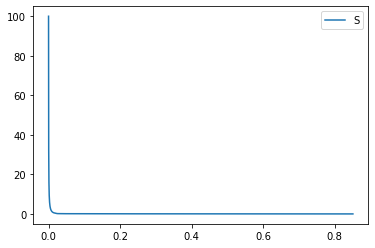

In [20]:
nodes_list = ['A','B','S','M','AB','BMS','ABS','AMS','ABMS','AM','AS']
#nodes_list = ['A','B','ABMS']
optim.plot_observable(0,nodes_list)


**After 750 optimization iterations**


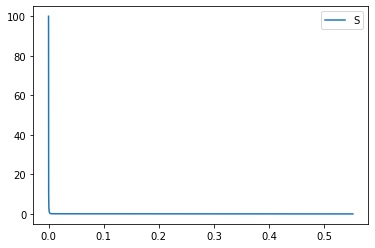

In [21]:
optim.plot_observable(-1,nodes_list)


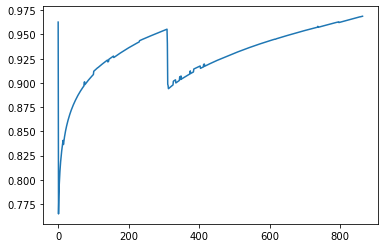

In [22]:
optim.plot_yield()

It seems like we've found a stable solution that produces greater yield than equilibrium. This should be thermodynamically
impossible. Let's try to find an explanation. We'll run simulations using the learned optimal parameters at a few different
timescales.

Using CPU


No handles with labels found to put in legend.


Next time:  tensor(2.3907, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
Using CPU


No handles with labels found to put in legend.


Next time:  tensor(8.0513, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
Using CPU
Next time:  tensor(67.2128, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
{'P': 0, 'Q': 1, 'R': 2, 'S': 3, 'T': 4, 'PQ': 5, 'PR': 6, 'PS': 7, 'PT': 8, 'QR': 9, 'QS': 10, 'QT': 11, 'PQR': 12, 'PQS': 13, 'PQT': 14, 'RS': 15, 'RT': 16, 'PRS': 17, 'PRT': 18, 'QRS': 19, 'QRT': 20, 'PQRS': 21, 'PQRT': 22, 'ST': 23, 'PST': 24, 'QST': 25, 'PQST': 26, 'RST': 27, 'PRST': 28, 'QRST': 29, 'PQRST': 30}


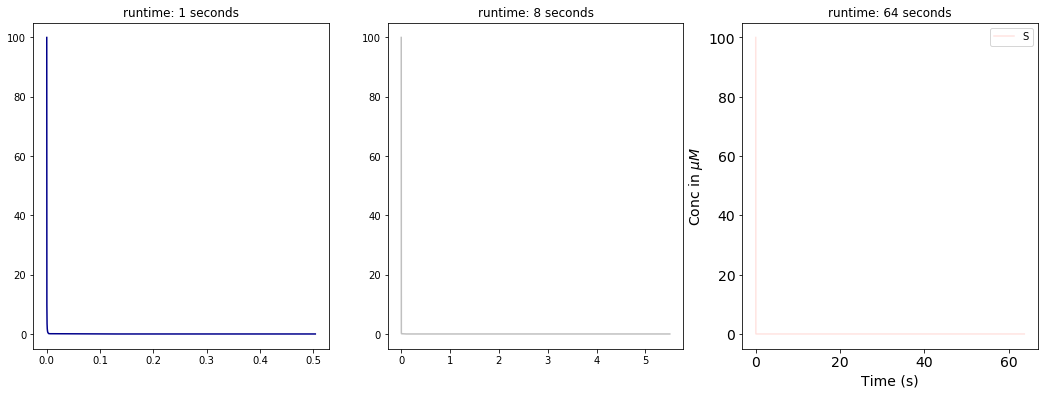

In [23]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, 3)
optim_rn = optim.rn
for i, runtime in enumerate([1, 8, 64]):
    optim_rn.reset()
    sim = VecSim(optim_rn, runtime, device='cpu')
    y = sim.simulate()
    sim.plot_observable(nodes_list,ax=ax[i],)
    ax[i].set_title("runtime: " + str(runtime) + " seconds")
fig.set_size_inches(18, 6)
node_map = {}
for node in rn.network.nodes():
    node_map[gtostr(rn.network.nodes[node]['struct'])] = node

print(node_map)
plt.show()

In [24]:
node_map = {}
for node in rn.network.nodes():
    node_map[gtostr(rn.network.nodes[node]['struct'])] = node

print(node_map)
def get_max_edge(n):
    """
    Calculates the max rate (k_on) for a given node
    To find out the maximum flow path to the final complex starting from the current node.
    
    Can also calculate the total rate of consumption of a node by summing up all rates. 
    Can tell which component is used quickly.
    """
    try:
        edges = rn.network.out_edges(n)
        #Loop over all edges
        #Get attributes
        kon_max = -1
        next_node = -1

        kon_sum = 0
        total_flux_outedges = 0
        total_flux_inedges = 0
        if len(edges)==0:
            return(False)
            
        for edge in edges:
            data = rn.network.get_edge_data(edge[0],edge[1])
            #print(data)
            #Get uid
            uid = data['uid']

            #Get updated kon
            temp_kon = vec_rn.kon[uid]
            kon_sum+=temp_kon
            
            if temp_kon > kon_max:
                kon_max = temp_kon
                next_node=edge[1]
             
        return(kon_max,next_node,kon_sum)
    except Exception as err:
        raise(err)

        
def get_node_flux(n):
    total_flux_outedges = 0
    total_flux_inedges = 0
    #Go over all the out edges
    edges_out = rn.network.out_edges(n)
    if len(edges_out)>0:

        for edge in edges_out:
            data = rn.network.get_edge_data(edge[0],edge[1])
            #print(data)
            #Get uid
            uid = data['uid']

            #Get updated kon
            temp_kon = vec_rn.kon[uid]

            #Calculate k_off also
            std_c = Tensor([1.])
            l_kon = torch.log(temp_kon)
            l_koff = (vec_rn.rxn_score_vec[uid] * 1. / (vec_rn._R * vec_rn._T)) + l_kon + torch.log(std_c)
            koff = torch.exp(l_koff)

            #Getting conc. of reactants and products
            #Get product
            prod = gtostr(rn.network.nodes[edge[1]]['struct']) 
            #Get other reactant
            react = "".join(sorted(list(set(prod) - set(gtostr(rn.network.nodes[edge[0]]['struct']) ))))

            #Net flux from this edge = Generation - consumption
            edge_flux = koff*vec_rn.copies_vec[edge[1]] - temp_kon*(vec_rn.copies_vec[edge[0]])*(vec_rn.copies_vec[node_map[react]])
            #edge_flux = koff*vec_rn.copies_vec[edge[1]] 

            print("Reaction: ", gtostr(rn.network.nodes[edge[0]]['struct']), "+",react," -> ",prod)
            print("Net flux: ",edge_flux)
            print("kon : ",temp_kon)
            print("koff: ",koff)
            print("Reaction data OUTWARD: ")
            print(data)

            total_flux_outedges+=edge_flux
    
    #Now go over all the in edges
    edges_in = rn.network.in_edges(n)
    react_list = []
    if len(edges_in) > 0:
        for edge in edges_in:
            if edge[0] in react_list:
                continue
            data = rn.network.get_edge_data(edge[0],edge[1])
            uid = data['uid']


            #Get generation rates; which would be kon
            temp_kon = vec_rn.kon[uid]

            #Get consumption rates; which is k_off
            std_c = Tensor([1.])
            l_kon = torch.log(temp_kon)
            l_koff = (vec_rn.rxn_score_vec[uid] * 1. / (vec_rn._R * vec_rn._T)) + l_kon + torch.log(std_c)
            koff = torch.exp(l_koff)

            #Get conc. of reactants and products
            prod = gtostr(rn.network.nodes[edge[1]]['struct'])
            #Get other reactant
            react = "".join(sorted(list(set(prod) - set(gtostr(rn.network.nodes[edge[0]]['struct']) ))))
            react_list.append(node_map[react])
            #Net flux from this edge = Generation - consumption
            edge_flux_in = temp_kon*(vec_rn.copies_vec[edge[0]])*(vec_rn.copies_vec[node_map[react]])- koff*vec_rn.copies_vec[edge[1]]
            #edge_flux_in = koff*vec_rn.copies_vec[edge[1]]
            


            print("Reaction: ", prod ," -> ",gtostr(rn.network.nodes[edge[0]]['struct']), "+",react)
            print("Net flux: ",edge_flux_in)
            print("kon : ",temp_kon)
            print("koff: ",koff)
            print("Raction data INWARD: ")
            print(data)

            total_flux_inedges+=edge_flux_in
    net_node_flux = total_flux_outedges + total_flux_inedges
    
    return(net_node_flux)
    
pathway = []
kon_sumarray = []
total_con_rate = {}
net_flux = {}
for n in rn.network.nodes():
    
    n_str = gtostr(rn.network.nodes[n]['struct']) 
    
    paths = [n_str]
    kon_sum = 0
    temp_node = n
    max_edge = True
    consumption_rate = 0
    if n < len(rn.network.nodes()):#num_monomers:
#         print("Current node: ")
#         print(n_str)
        while max_edge:
            max_edge = get_max_edge(temp_node)
            if max_edge:
                total_con_rate[gtostr(rn.network.nodes[temp_node]['struct'])] = max_edge[2]
                
                temp_node = max_edge[1]
                kon_sum += max_edge[0].item()
                
                
#                 print("Next node: ")
#                 print(temp_node)

                paths.append(gtostr(rn.network.nodes[temp_node]['struct']))
            else:
                break
        pathway.append(paths)
        kon_sumarray.append(kon_sum)
        paths=[]
    print("-------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------")
    print("|                                                                             |")
    node_flux = get_node_flux(n)
    net_flux[gtostr(rn.network.nodes[n]['struct'])] = node_flux
    print("|                                                                             |")
    print("-------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------")

print(pathway)
print(kon_sumarray)

#print(total_con_rate)

{'P': 0, 'Q': 1, 'R': 2, 'S': 3, 'T': 4, 'PQ': 5, 'PR': 6, 'PS': 7, 'PT': 8, 'QR': 9, 'QS': 10, 'QT': 11, 'PQR': 12, 'PQS': 13, 'PQT': 14, 'RS': 15, 'RT': 16, 'PRS': 17, 'PRT': 18, 'QRS': 19, 'QRT': 20, 'PQRS': 21, 'PQRT': 22, 'ST': 23, 'PST': 24, 'QST': 25, 'PQST': 26, 'RST': 27, 'PRST': 28, 'QRST': 29, 'PQRST': 30}
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
|                                                                             |
Reaction:  P + Q  ->  PQ
Net flux:  tensor([0.], dtype=torch.float64, grad_fn=<SubBackward0>)
kon :  tensor(260.8047, dtype=torch.float64, grad_fn=<SelectBackward>)
koff:  tensor([259.4303], dtype=torch.float64, grad_fn=<ExpBackward>)
Reaction data OUTWARD: 
{'k_on': 42.024699999999996, 'k_off': 258.20868088491164, 'lcf': 1, 'rxn_score': tensor([-12.], dtype=torch.float64), 'uid': 0}
Reaction:  P + R  ->  PR
Net flux:  tensor([0.0001], d

Reaction:  R + QT  ->  QRT
Net flux:  tensor([92.2744], dtype=torch.float64, grad_fn=<SubBackward0>)
kon :  tensor(485.9798, dtype=torch.float64, grad_fn=<SelectBackward>)
koff:  tensor([480.8709], dtype=torch.float64, grad_fn=<ExpBackward>)
Reaction data OUTWARD: 
{'k_on': 70.43189999999997, 'k_off': 0.0026588989870921097, 'lcf': 1, 'rxn_score': tensor([-24.], dtype=torch.float64), 'uid': 16}
Reaction:  R + PQS  ->  PQRS
Net flux:  tensor([60.9240], dtype=torch.float64, grad_fn=<SubBackward0>)
kon :  tensor(82.1880, dtype=torch.float64, grad_fn=<SelectBackward>)
koff:  tensor([80.8954], dtype=torch.float64, grad_fn=<ExpBackward>)
Reaction data OUTWARD: 
{'k_on': 12.774, 'k_off': 2.9629584633531247e-09, 'lcf': 1, 'rxn_score': tensor([-36.], dtype=torch.float64), 'uid': 17}
Reaction:  R + PQT  ->  PQRT
Net flux:  tensor([59.8283], dtype=torch.float64, grad_fn=<SubBackward0>)
kon :  tensor(82.1880, dtype=torch.float64, grad_fn=<SelectBackward>)
koff:  tensor([80.8954], dtype=torch.float6

kon :  tensor(485.9798, dtype=torch.float64, grad_fn=<SelectBackward>)
koff:  tensor([480.8709], dtype=torch.float64, grad_fn=<ExpBackward>)
Reaction data OUTWARD: 
{'k_on': 70.43189999999997, 'k_off': 0.0026588989870921097, 'lcf': 1, 'rxn_score': tensor([-24.], dtype=torch.float64), 'uid': 12}
Reaction:  PQ + S  ->  PQS
Net flux:  tensor([0.0014], dtype=torch.float64, grad_fn=<SubBackward0>)
kon :  tensor(485.9798, dtype=torch.float64, grad_fn=<SelectBackward>)
koff:  tensor([480.8709], dtype=torch.float64, grad_fn=<ExpBackward>)
Reaction data OUTWARD: 
{'k_on': 70.43189999999997, 'k_off': 0.0026588989870921097, 'lcf': 1, 'rxn_score': tensor([-24.], dtype=torch.float64), 'uid': 20}
Reaction:  PQ + T  ->  PQT
Net flux:  tensor([0.0016], dtype=torch.float64, grad_fn=<SubBackward0>)
kon :  tensor(485.9798, dtype=torch.float64, grad_fn=<SelectBackward>)
koff:  tensor([480.8709], dtype=torch.float64, grad_fn=<ExpBackward>)
Reaction data OUTWARD: 
{'k_on': 70.43189999999997, 'k_off': 0.0026

Reaction:  QR + PST  ->  PQRST
Net flux:  tensor([488.8412], dtype=torch.float64, grad_fn=<SubBackward0>)
kon :  tensor(5.2025, dtype=torch.float64, grad_fn=<SelectBackward>)
koff:  tensor([5.0401], dtype=torch.float64, grad_fn=<ExpBackward>)
Reaction data OUTWARD: 
{'k_on': 1.0, 'k_off': 5.380186160021136e-26, 'lcf': 1, 'rxn_score': tensor([-72.], dtype=torch.float64), 'uid': 60}
Reaction:  QR  ->  Q + R
Net flux:  tensor([-1.4829e-05], dtype=torch.float64, grad_fn=<SubBackward0>)
kon :  tensor(6.5127, dtype=torch.float64, grad_fn=<SelectBackward>)
koff:  tensor([6.4784], dtype=torch.float64, grad_fn=<ExpBackward>)
Raction data INWARD: 
{'k_on': 0.9985, 'k_off': 6.134996034798211, 'lcf': 1, 'rxn_score': tensor([-12.], dtype=torch.float64), 'uid': 4}
|                                                                             |
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------

-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
|                                                                             |
Reaction:  RS + T  ->  RST
Net flux:  tensor([79.7134], dtype=torch.float64, grad_fn=<SubBackward0>)
kon :  tensor(485.9798, dtype=torch.float64, grad_fn=<SelectBackward>)
koff:  tensor([480.8709], dtype=torch.float64, grad_fn=<ExpBackward>)
Reaction data OUTWARD: 
{'k_on': 70.43189999999997, 'k_off': 0.0026588989870921097, 'lcf': 1, 'rxn_score': tensor([-24.], dtype=torch.float64), 'uid': 38}
Reaction:  RS + PQ  ->  PQRS
Net flux:  tensor([3.8362], dtype=torch.float64, grad_fn=<SubBackward0>)
kon :  tensor(5.2026, dtype=torch.float64, grad_fn=<SelectBackward>)
koff:  tensor([5.0938], dtype=torch.float64, grad_fn=<ExpBackward>)
Reaction data OUTWARD: 
{'k_on': 1.0001, 'k_off': 1.4253065991492085e-15, 'lcf': 1, 'rxn_score': tensor([-48.], dtype=torch.

Reaction:  QRT  ->  R + QT
Net flux:  tensor([-92.2744], dtype=torch.float64, grad_fn=<SubBackward0>)
kon :  tensor(485.9798, dtype=torch.float64, grad_fn=<SelectBackward>)
koff:  tensor([480.8709], dtype=torch.float64, grad_fn=<ExpBackward>)
Raction data INWARD: 
{'k_on': 70.43189999999997, 'k_off': 0.0026588989870921097, 'lcf': 1, 'rxn_score': tensor([-24.], dtype=torch.float64), 'uid': 16}
Reaction:  QRT  ->  T + QR
Net flux:  tensor([-92.2744], dtype=torch.float64, grad_fn=<SubBackward0>)
kon :  tensor(485.9798, dtype=torch.float64, grad_fn=<SelectBackward>)
koff:  tensor([480.8709], dtype=torch.float64, grad_fn=<ExpBackward>)
Raction data INWARD: 
{'k_on': 70.43189999999997, 'k_off': 0.0026588989870921097, 'lcf': 1, 'rxn_score': tensor([-24.], dtype=torch.float64), 'uid': 34}
Reaction:  QRT  ->  RT + Q
Net flux:  tensor([-92.2744], dtype=torch.float64, grad_fn=<SubBackward0>)
kon :  tensor(485.9798, dtype=torch.float64, grad_fn=<SelectBackward>)
koff:  tensor([480.8709], dtype=tor

Reaction:  PQST + R  ->  PQRST
Net flux:  tensor([494.0443], dtype=torch.float64, grad_fn=<SubBackward0>)
kon :  tensor(5.2026, dtype=torch.float64, grad_fn=<SelectBackward>)
koff:  tensor([5.0938], dtype=torch.float64, grad_fn=<ExpBackward>)
Reaction data OUTWARD: 
{'k_on': 1.0001, 'k_off': 1.4253065991492085e-15, 'lcf': 1, 'rxn_score': tensor([-48.], dtype=torch.float64), 'uid': 85}
Reaction:  PQST  ->  S + PQT
Net flux:  tensor([-60.7274], dtype=torch.float64, grad_fn=<SubBackward0>)
kon :  tensor(82.1880, dtype=torch.float64, grad_fn=<SelectBackward>)
koff:  tensor([80.8954], dtype=torch.float64, grad_fn=<ExpBackward>)
Raction data INWARD: 
{'k_on': 12.774, 'k_off': 2.9629584633531247e-09, 'lcf': 1, 'rxn_score': tensor([-36.], dtype=torch.float64), 'uid': 26}
Reaction:  PQST  ->  T + PQS
Net flux:  tensor([-60.7274], dtype=torch.float64, grad_fn=<SubBackward0>)
kon :  tensor(82.1880, dtype=torch.float64, grad_fn=<SelectBackward>)
koff:  tensor([80.8954], dtype=torch.float64, grad_f

koff:  tensor([5.0401], dtype=torch.float64, grad_fn=<ExpBackward>)
Raction data INWARD: 
{'k_on': 1.0, 'k_off': 5.380186160021136e-26, 'lcf': 1, 'rxn_score': tensor([-72.], dtype=torch.float64), 'uid': 63}
Reaction:  PQRST  ->  QT + PRS
Net flux:  tensor([-488.8412], dtype=torch.float64, grad_fn=<SubBackward0>)
kon :  tensor(5.2025, dtype=torch.float64, grad_fn=<SelectBackward>)
koff:  tensor([5.0401], dtype=torch.float64, grad_fn=<ExpBackward>)
Raction data INWARD: 
{'k_on': 1.0, 'k_off': 5.380186160021136e-26, 'lcf': 1, 'rxn_score': tensor([-72.], dtype=torch.float64), 'uid': 66}
Reaction:  PQRST  ->  PQR + ST
Net flux:  tensor([-488.8412], dtype=torch.float64, grad_fn=<SubBackward0>)
kon :  tensor(5.2025, dtype=torch.float64, grad_fn=<SelectBackward>)
koff:  tensor([5.0401], dtype=torch.float64, grad_fn=<ExpBackward>)
Raction data INWARD: 
{'k_on': 1.0, 'k_off': 5.380186160021136e-26, 'lcf': 1, 'rxn_score': tensor([-72.], dtype=torch.float64), 'uid': 67}
Reaction:  PQRST  ->  PQS +

In [25]:
for k,v in sorted(net_flux.items(),key=lambda x : x[1]):
    print(k," : ", v)

print(vec_rn.copies_vec)
print(vec_rn.kon)

PQRST  :  tensor([-7358.6329], dtype=torch.float64, grad_fn=<AddBackward0>)
PRST  :  tensor([234.2485], dtype=torch.float64, grad_fn=<AddBackward0>)
PQRS  :  tensor([238.8399], dtype=torch.float64, grad_fn=<AddBackward0>)
PQST  :  tensor([239.6632], dtype=torch.float64, grad_fn=<AddBackward0>)
PQRT  :  tensor([243.4288], dtype=torch.float64, grad_fn=<AddBackward0>)
QRT  :  tensor([289.2652], dtype=torch.float64, grad_fn=<AddBackward0>)
QST  :  tensor([305.8430], dtype=torch.float64, grad_fn=<AddBackward0>)
QRS  :  tensor([310.0275], dtype=torch.float64, grad_fn=<AddBackward0>)
RST  :  tensor([329.1432], dtype=torch.float64, grad_fn=<AddBackward0>)
QRST  :  tensor([421.0672], dtype=torch.float64, grad_fn=<AddBackward0>)
PQ  :  tensor([500.2730], dtype=torch.float64, grad_fn=<AddBackward0>)
PT  :  tensor([500.3415], dtype=torch.float64, grad_fn=<AddBackward0>)
PR  :  tensor([500.3539], dtype=torch.float64, grad_fn=<AddBackward0>)
PS  :  tensor([500.4104], dtype=torch.float64, grad_fn=<Ad

In [26]:
# print(solution)
poly_system = EquilibriumSolver(rn)
solution = poly_system.solve(init_val=vec_rn.copies_vec.detach().numpy().tolist())
#solution = poly_system.solve(verifyBool = False)
if solution == None:
    print("No Equilibrium solution")
else:
    print(solution)
    print("Equilibrium expected yield: ", 100 * solution[-1] / min(vec_rn.initial_copies[:vec_rn.num_monomers]), '%')
print(vec_rn.kon)

Matrix([[5.996602e-6], [-2.285653e-13], [1.519770e-6], [0.0002085480], [1.966476e-6], [-1.441913e-19], [1.653000e-12], [2.035376e-10], [2.100608e-12], [4.162724e-16], [-2.237439e-16], [4.993409e-16], [2.159226e-10], [-5.553456e-11], [2.260561e-10], [5.158409e-11], [4.859933e-13], [-2.660593e-11], [2.408731e-10], [3.681289e-10], [1.482967e-9], [-0.0002063612], [2.188641e-7], [6.674628e-11], [-1.032411e-11], [4.440829e-10], [-0.0002068080], [-4.343310e-10], [-0.0002083270], [-0.0002023323], [100.0006]])
Equilibrium expected yield:  100.000615234375 %
Parameter containing:
tensor([260.8047, 309.1559, 333.5697, 307.4003,   6.5127,   6.3279,   6.5291,
        485.9798, 485.9798, 485.9798,   6.5769,   6.5213, 485.9798, 485.9798,
        485.9798, 485.9798, 485.9798,  82.1880,  82.1880,   6.6461, 485.9798,
        485.9798, 485.9798, 485.9798, 485.9798,  82.1880,  82.1880, 485.9798,
         82.1880,  82.1880,   5.2026, 485.9798, 485.9798, 485.9798, 485.9798,
        485.9798,  82.1880,  82.1

Clearly, the equilibrium reached by the system still matches the equilibrium solution. We have however found a set of parameters that can increase available complete AP2 at some point before equilibrium to levels significantly higher than at equilibrium. We don't observe any trapping, but have uncovered an interesting effect. 

Now we'll move on to looking at ARP23. This is 7 subunits, which drastically increases the number of possible reactions. Expect longer runtimes. 